# - The Project :: Mobils Price Regressoion
********************************************

<img src="images/mobile.jpeg" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<p id="Intro">Introduction</p>

* Describtion of project ::
    *************************
    * Business ::
         * Any Business Want To Maximize The Numbers of CLients.
         * That Not Based on Attract New ones Only But Bases also on Retaining the Existing ones.
         * The Current or old Clients Will Cost the Company Less Than The New_Clients
         * The New_Clients Weekly interested in Business Servicies and They consider difficult to work with it But The Retain Clients have the necessary knowldge and info Towardes the Business services.
    * Domain_Knowledge ::
         * That Project Use ML Models for Predicting Mobiles Pricess Based on Some Features related To details of ability of mobile such as (memory , wifi , color , version , n-coures , Four or three g and so on).
<img src="images/project.jpeg" />         
    * Data :: 
         * We Have data belongings to Mobile Prices Which Present The Behaviour of the Mobile Prices every years. 
         * We Have dataset from a Mobil company. The data contains information about almost two thousand record of Mobile price Based on the years .
         * We Must Known That  Task of pridect the price of the Mobile its more difficult becouse Mobile price nmore changable .
         * Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

         * He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

          * Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

          * In this problem you do not have to predict actual price but a price range indicating how high the price is
    * Tasks ::
        * *Apply EDA Technice To* :: Describe The Behavior of the data For Extractng Meaningfull Knowledge , insights and Vision From That data To Make The Steckholders of our Business Make More Efficient Decision Which improve and develop The Business
        * Research Of dependences and Formulation of Hypothess.
        * Built ML Model For Predciting New_Values Of Oil-Price.
        * Get High Accuracy From the Model Performance To improve Our Business .
        


* Import Requried liberaries ::

In [1]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import datasist  as ds
import warnings  as w
import missingno as mno
import pandas_profiling  as pp
import matplotlib.pyplot as plt


* Set Some Instructions ::

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [10 , 20]} , font_scale = 1.7)

In [3]:
# loading data ::
df = pd.read_csv("train.csv")
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

* From The result above we can see that ::
******************************************
  * We have 2000  record of data.
  * We have 21 Features.
  * Our-Target :: Price of Mobiles.
  ********************************
* Features of Data ::
*******************************
 * blue: Has bluetooth or not
 * clock_speed: speed at which microprocessor executes instructions
 * dual_sim: Has dual sim support or not
 * fc: Front Camera mega pixels
 * four_g: Has 4G or not
 * int_memory: Internal Memory in Gigabytes
 * m_dep: Mobile Depth in cm
 * mobile_wt: Weight of mobile phone
 * n_cores: Number of cores of processor
 * pc: Primary Camera mega pixels
 * px_height: Pixel Resolution Height
 * px_width: Pixel Resolution Width
 * ram: Random Access Memory in Mega Byte
 * sc_h: Screen Height of mobile in cm
 * sc_w: Screen Width of mobile in cm
 * talk_time: longest time that a single battery charge will last when you are
 * three_g: Has 3G or not
 * touch_screen: Has touch screen or not
 * wifi: Has wifi or not
 * price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
***************************
*  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# present statistical describtion of numerical data
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [8]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [9]:
Con_Matrix = df.corr()
Con_Matrix

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

In [10]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (battery_power)

The Col _ (battery_power) _Unique_values :: [ 842 1021  563 ... 1139 1467  858]

The Col _ (battery_power)_Value_counts :: 

1872    6
1589    6
618     6
1413    5
1715    5
       ..
1199    1
1202    1
1203    1
1204    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

-----------
-----------

The Col :: (blue)

The Col _ (blue) _Unique_values :: [0 1]

The Col _ (blue)_Value_counts :: 

0    1010
1     990
Name: blue, dtype: int64

-----------
-----------

The Col :: (clock_speed)

The Col _ (clock_speed) _Unique_values :: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

The Col _ (clock_speed)_Value_counts :: 

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
2.4     58
0.8     58
0.9     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0

In [11]:
df[df["price_range"] == df["price_range"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
6              1821     0          1.7         0   4       1          10   
10              769     1          2.9         1   0       0           9   
11             1520     1          2.2         0   5       1          33   
16              838     0          0.5         0   1       1          13   
17              595     0          0.9         1   7       1          23   
...             ...   ...          ...       ...  ..     ...         ...   
1991           1882     0          2.0         0  11       1          44   
1993           1467     1          0.5         0   0       0          18   
1994            858     0          2.2         0   1       0          50   
1997           1911     0          0.9         1   1       1          36   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
6       0.8        139        8  ...        381      1018  3220    13     8   
10      0.1        182        5  ...        248       874  3946     5     2   
11      0.5        177        8  ...        151      1005  3826    14     9   
16      0.1        196        8  ...        984      1850  3554    10     9   
17      0.1        121        3  ...        441       810  3752    10     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1991    0.8        113        8  ...          4       743  3579    19     8   
1993    0.6        122        5  ...        888      1099  3962    15    11   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
6            18        1             0     1            3  
10            7        0             0     0            3  
11           13        1             1     1            3  
16           19        1             0     1            3  
17           18        1             1     0            3  
...         ...      ...           ...   ...          ...  
1991         20        1             1     0            3  
1993          5        1             1     1            3  
1994          3        1             1     0            3  
1997          5        1             1     0            3  
1999          2        1             1     1            3  

[500 rows x 21 columns]

In [12]:
df[df["price_range"] == df["price_range"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
7              1954     0          0.5         1   0       0          24   
8              1445     1          0.5         0   0       0          53   
9               509     1          0.6         1   2       1           9   
14             1866     0          0.5         0  13       1          52   
15              775     0          1.0         0   3       0          46   
...             ...   ...          ...       ...  ..     ...         ...   
1987            618     1          1.0         0   9       1          13   
1990           1617     1          2.4         0   8       1          36   
1992            674     1          2.9         1   1       0          21   
1995            794     1          0.5         1   0       1           2   
1998           1512     0          0.9         0   4       1          46   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
7       0.8        187        4  ...        512      1149   700    16     3   
8       0.7        174        7  ...        386       836  1099    17     1   
9       0.1         93        5  ...       1137      1224   513    19    10   
14      0.7        185        1  ...        356       563   373    14     9   
15      0.7        159        2  ...        862      1864   568    17    15   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1987    0.1         80        4  ...        591       724  1424    15    12   
1990    0.8         85        1  ...        743      1426   296     5     3   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1998    0.1        145        5  ...        336       670   869    18    10   

      talk_time  three_g  touch_screen  wifi  price_range  
7             5        1             1     1            0  
8            20        1             0     0            0  
9            12        1             0     0            0  
14            3        1             0     1            0  
15           11        1             1     1            0  
...         ...      ...           ...   ...          ...  
1987          7        1             1     0            0  
1990          7        1             0     0            0  
1992          4        1             1     1            0  
1995         19        1             1     0            0  
1998         19        1             1     1            0  

[500 rows x 21 columns]

In [13]:
df[df["int_memory"] == df["int_memory"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
49              596     0          2.1         1   9       0          64   
81              999     0          2.9         1  11       1          64   
87             1083     1          2.9         1   1       1          64   
144            1678     0          2.1         0   3       1          64   
192            1490     1          0.5         1   4       1          64   
316            1648     0          0.7         0   6       1          64   
319            1097     0          2.1         1   6       0          64   
322            1504     0          2.3         1   1       0          64   
355            1610     1          2.9         0   7       1          64   
431            1772     1          0.5         1   3       0          64   
446            1991     1          2.7         0   5       1          64   
454             932     0          1.3         0   1       0          64   
592            1263     0          0.5         0  12       0          64   
650            1315     1          2.6         0   7       0          64   
676            1027     0          0.5         0   2       1          64   
770            1911     1          2.0         0   7       1          64   
816             805     1          0.7         0   0       0          64   
873             603     1          0.7         1   0       1          64   
1019           1986     0          2.7         1   3       1          64   
1056            812     0          0.5         1   1       0          64   
1114            781     1          1.3         1   1       0          64   
1228           1820     1          1.7         1   0       1          64   
1441            599     1          2.9         0   0       1          64   
1498            881     0          1.0         0   1       0          64   
1772           1577     0          1.0         1   0       1          64   
1781           1876     0          1.3         1   9       1          64   
1793           1299     1          2.8         1   0       0          64   
1796            793     1          2.8         1   1       1          64   
1878            608     1          0.5         1   0       0          64   
1949            757     1          0.9         1   4       0          64   
1953            727     1          2.5         1   0       1          64   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
49      0.8        111        8  ...        885      1854  3238    16    13   
81      0.2        199        4  ...       1397      1616  2593    14    11   
87      0.8        178        3  ...       1025      1118  3210    13     3   
144     0.9        134        3  ...        436       536   278    19     0   
192     0.3        150        8  ...       1417      1464  3600    17     9   
316     0.8        170        4  ...       1153      1876   610     8     1   
319     0.2        161        3  ...        419      1914  1725    14     5   
322     0.9        182        1  ...         19      1923  3059     6     5   
355     0.9        181        4  ...       1236      1280   941     8     4   
431     0.7        116        8  ...        270       545  1834     5     2   
446     0.9        145        2  ...       1058      1325  1733     5     3   
454     0.7        154        7  ...       1176      1224  3817     8     7   
592     0.3        175        5  ...        178      1883  1183    14     3   
650     0.8        128        7  ...         59       575  3278     6     3   
676     0.9        103        2  ...       1698      1747  3786    17    12   
770     0.6        163        8  ...       1795      1958  3872     9     8   
816     0.1         97        4  ...        641       704   418    11     6   
873     0.2        156        6  ...       1842      1968   604    10     4   
1019    0.2        162        4  ...        236      1520  1377     5   

In [14]:
df[df["int_memory"] == df["int_memory"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
131            1790     0          2.5         1   9       0           2   
278             538     0          0.8         0  12       1           2   
341             811     1          2.4         1   5       1           2   
351            1557     0          2.8         1  16       0           2   
365             763     0          1.7         1   8       1           2   
475            1122     0          1.2         0   9       0           2   
486            1089     1          0.9         1  12       1           2   
515            1832     0          0.7         0   2       0           2   
622            1225     0          0.7         1   0       1           2   
700             561     1          2.1         1   7       1           2   
713            1108     1          1.3         1  14       1           2   
730            1049     0          0.6         1   8       1           2   
788            1501     0          1.1         0  12       1           2   
826            1788     1          0.5         1  15       1           2   
868             981     1          1.9         1   0       0           2   
1094            688     1          1.5         0   0       0           2   
1145           1635     0          2.6         1   0       1           2   
1152           1009     1          1.0         1   2       0           2   
1181           1271     0          1.5         1   0       0           2   
1195           1009     1          2.8         1   7       1           2   
1211            713     1          1.6         0   7       1           2   
1298           1089     0          1.4         1  10       0           2   
1352            798     1          0.5         1   7       0           2   
1384           1163     1          1.9         0   6       0           2   
1416           1448     0          0.5         1  18       0           2   
1476           1638     0          1.0         0   6       0           2   
1491           1824     1          1.9         1   9       1           2   
1559            671     0          2.9         0   7       1           2   
1585           1992     1          0.6         1  11       0           2   
1639           1768     1          2.0         0   0       1           2   
1668            962     0          1.0         1  14       0           2   
1704           1934     1          2.7         0   8       1           2   
1716            869     0          1.9         0   0       0           2   
1805            534     0          0.5         1   4       0           2   
1827           1692     0          2.1         0   4       1           2   
1853           1702     1          0.5         1   8       0           2   
1877           1142     1          1.2         0   0       0           2   
1880           1720     0          1.6         0  18       1           2   
1886           1082     0          2.3         1  11       0           2   
1909            955     1          0.5         0   2       0           2   
1933            897     1          2.0         0   3       1           2   
1995            794     1          0.5         1   0       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
131     0.1        184        1  ...        622       792  1366     7     0   
278     0.8        177        7  ...        235       662   417     8     4   
341     0.3        106        6  ...        333      1429  2111    18     7   
351     0.1        123        5  ...       1107      1442  2690    18    16   
365     0.5         92        8  ...       1028      1186  1050     6     4   
475     0.6        120        4  ...        331       790  3291    11     2   
486     0.7        145        5  ...        636      1259  2765    13    12   
515     0.6         90        7  ...        186       654  2978    18     7   
622     0.6        138    

In [15]:
df[df["mobile_wt"] == df["mobile_wt"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
29              851     0          0.5         0   3       0          21   
123            1379     0          1.1         0   5       1          36   
225            1634     1          1.4         0   1       1          17   
282            1839     1          1.2         0   9       1          54   
438             853     1          2.0         0  10       1           3   
485            1277     0          3.0         0   0       1          41   
516            1039     0          1.3         0   0       1          12   
557            1519     0          2.1         0   0       0          32   
662            1695     0          0.5         1   6       1          46   
846            1489     0          2.4         1   8       0          32   
888            1578     0          2.9         0   8       0           3   
921            1624     1          2.6         1   0       0          58   
1138           1413     1          1.7         0   2       0          10   
1368            541     1          2.3         0   4       0          51   
1588           1880     1          2.0         0  11       0          35   
1690           1606     1          0.5         1   0       1          33   
1717           1337     1          2.7         1   0       0           5   
1830            958     1          1.6         0   9       1          60   
1860           1646     0          2.5         0   3       1          25   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
29      0.4        200        5  ...       1171      1263   478    12     7   
123     0.8        200        2  ...        538      1376  3426     5     4   
225     0.2        200        2  ...        964      1677  3031    11     6   
282     0.5        200        7  ...        475      1493   927    19    10   
438     0.6        200        2  ...        674       740  3701    15     8   
485     0.3        200        4  ...        902      1090   429     9     4   
516     0.8        200        8  ...       1428      1827  1619     7     1   
557     0.7        200        1  ...        168      1239  2912    11    10   
662     0.7        200        3  ...       1791      1898   446    16    13   
846     0.6        200        1  ...        172       812   776     7     6   
888     0.9        200        1  ...        342       670  3483    17     4   
921     1.0        200        3  ...       1530      1744  1251    13     4   
1138    0.2        200        6  ...        314      1606  2867     5     4   
1368    0.4        200        8  ...       1012      1226   403    11     2   
1588    0.1        200        4  ...        930      1983  1930    17     7   
1690    0.9        200        5  ...        157       770  3437    11     1   
1717    0.7        200        4  ...        161      1029  3242    10     1   
1830    0.4        200        1  ...        730       751  1417    10     4   
1860    0.6        200        2  ...        211      1608   686     8     6   

      talk_time  three_g  touch_screen  wifi  price_range  
29           10        1             0     1            0  
123          17        1             1     1            3  
225           6        1             1     1            3  
282          18        1             0     1            1  
438           8        1             1     0            3  
485          14        1             1     1            0  
516          10        1             1     1            1  
557          15        1             1     0            2  
662          15        1             1     1            1  
846           8        0             0     0            0  
888          16        1             0     0            3  
921          18        0             1     1            1  
1138         15        0             1     0            2  
1368         12        0             0     0            0  
1588

In [16]:
df[df["mobile_wt"] == df["mobile_wt"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
69             1166     0          1.5         1   0       1          43   
121             772     1          2.4         1   1       1          10   
298             928     1          0.5         1  11       0          56   
311            1707     0          1.4         0   0       0          41   
574            1974     0          1.0         0   4       0          24   
586             704     1          2.7         0   8       1          29   
766            1872     1          0.9         1   0       0          16   
853            1195     1          1.1         1   2       1           8   
940            1456     0          1.6         1   9       1          39   
1117           1970     0          1.6         1  11       1          58   
1160           1159     0          2.7         0  13       1          28   
1305           1023     1          2.3         1   5       1          30   
1426           1454     0          1.4         1   8       0          37   
1431           1283     1          0.7         1   0       1          27   
1599           1166     1          0.5         0   7       0          59   
1675           1630     1          2.8         1   0       1          32   
1706            930     0          2.1         1   0       0          54   
1750           1339     1          0.5         1  10       1          21   
1788           1424     0          0.5         1  16       1          23   
1924           1982     1          1.6         0   2       1          12   
1987            618     1          1.0         0   9       1          13   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
69      0.8         80        4  ...        205       603  3993     7     1   
121     0.5         80        4  ...       1242      1712  3242    18    11   
298     0.7         80        8  ...        221      1243   666    19    10   
311     0.8         80        7  ...       1331      1388  1774    12     0   
574     0.3         80        7  ...        250       545   861     7     4   
586     0.2         80        1  ...       1108      1509  1122     9     3   
766     0.5         80        2  ...        286      1484  2295    15    11   
853     0.9         80        6  ...        327      1001   643    14     2   
940     0.1         80        8  ...        815      1666  3998     6     3   
1117    0.3         80        8  ...        654       882  2372    14    12   
1160    0.2         80        8  ...        378       751  2495    10     0   
1305    0.2         80        8  ...          5      1744  2086    10     0   
1426    0.8         80        8  ...        903       910  1713    16     0   
1431    0.2         80        4  ...       1135      1923  3957    17    15   
1599    0.5         80        1  ...        437       638  3887     8     6   
1675    0.9         80        6  ...        712      1726  1751    12    10   
1706    0.9         80        1  ...       1569      1763  1743     7     1   
1750    0.5         80        4  ...        833      1441   867     8     3   
1788    0.6         80        4  ...       1399      1663  1053    14    11   
1924    0.2         80        5  ...        287       593  1824    13     3   
1987    0.1         80        4  ...        591       724  1424    15    12   

      talk_time  three_g  touch_screen  wifi  price_range  
69            7        1             1     0            3  
121           4        1             1     0            3  
298           5        0             1     0            0  
311          10        0             0     0            2  
574           6        1             0     1            0  
586          10        1             1     1            0  
766          16        0             0     1            2  
853          19        1             0     0            0  
940          13        1             1     0          

In [17]:
df[df["px_height"] == df["px_height"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1771           1230     1          1.6         0   0       1          48   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1771    0.7        111        7  ...       1960      1963  1622    18    17   

      talk_time  three_g  touch_screen  wifi  price_range  
1771         16        1             1     1            2  

[1 rows x 21 columns]

In [18]:
df[df["px_height"] == df["px_height"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...          0      1987  3692    13     0   
1933    0.6        154        8  ...          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]

In [19]:
df[df["px_width"] == df["px_width"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
719           1068     0          2.0         1   1       1          37   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
719    0.9        184        7  ...        186      1998  1803     5     4   

     talk_time  three_g  touch_screen  wifi  price_range  
719          7        1             0     0            1  

[1 rows x 21 columns]

In [20]:
df[df["px_width"] == df["px_width"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
185            1380     1          2.1         1   1       1           4   
1144           1285     0          2.4         0   1       1          51   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
185     0.8         92        3  ...        420       500   797    13     2   
1144    1.0        140        7  ...        475       500  2094     8     0   

      talk_time  three_g  touch_screen  wifi  price_range  
185          15        1             1     0            0  
1144         10        1             0     0            1  

[2 rows x 21 columns]

In [21]:
df[df["ram"] == df["ram"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
940           1456     0          1.6         1   9       1          39   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
940    0.1         80        8  ...        815      1666  3998     6     3   

     talk_time  three_g  touch_screen  wifi  price_range  
940         13        1             1     0            3  

[1 rows x 21 columns]

In [22]:
df[df["ram"] == df["ram"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1745            926     1          0.8         0   6       1          59   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width  ram  sc_h  sc_w  \
1745    0.8        161        7  ...         84       793  256    18     7   

      talk_time  three_g  touch_screen  wifi  price_range  
1745          2        1             0     1            0  

[1 rows x 21 columns]

In [23]:
df[df["sc_h"] == df["sc_h"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
9               509     1          0.6         1   2       1           9   
18             1131     1          0.5         1  11       0          49   
51             1760     0          1.4         1   5       0          63   
80             1589     1          0.6         1   0       1          58   
90             1724     0          2.0         1   2       1          57   
...             ...   ...          ...       ...  ..     ...         ...   
1956            555     1          0.5         1   2       0          17   
1962            635     1          0.5         0   9       0          16   
1972           1191     0          0.8         0   6       1          46   
1991           1882     0          2.0         0  11       1          44   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
9       0.1         93        5  ...       1137      1224   513    19    10   
18      0.6        101        5  ...        658       878  1835    19    13   
51      0.8        127        8  ...       1382      1383  2053    19    12   
80      0.9         85        7  ...        319      1206  3464    19    10   
90      0.5        177        3  ...       1605      1924  2822    19     3   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1956    0.2        163        5  ...        956      1010   343    19    14   
1962    1.0        110        7  ...        599      1299  2452    19    17   
1972    0.8         89        6  ...         42       807   824    19    18   
1991    0.8        113        8  ...          4       743  3579    19     8   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
9            12        1             0     0            0  
18           16        1             1     0            1  
51           16        0             1     0            2  
80            6        1             1     1            3  
90           16        1             1     0            3  
...         ...      ...           ...   ...          ...  
1956          3        0             1     1            0  
1962          8        1             0     0            2  
1972          7        1             0     0            0  
1991         20        1             1     0            3  
1999          2        1             1     1            3  

[124 rows x 21 columns]

In [24]:
df[df["sc_h"] == df["sc_h"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
10              769     1          2.9         1   0       0           9   
31             1568     1          0.5         0  16       0          33   
50             1547     1          3.0         1   2       1          14   
75              819     0          0.6         1   8       1          42   
105             832     0          0.7         1   2       1          39   
...             ...   ...          ...       ...  ..     ...         ...   
1912            695     0          1.2         0   1       1          41   
1920            591     1          0.5         1   1       1          16   
1938           1749     1          0.5         1   7       1          49   
1939           1588     1          2.5         0  12       1           4   
1990           1617     1          2.4         0   8       1          36   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
10      0.1        182        5  ...        248       874  3946     5     2   
31      1.0        150        8  ...        413       654   508     5     1   
50      0.7        198        3  ...       1042      1832  2059     5     0   
75      0.9        188        6  ...        339      1242  1814     5     4   
105     0.7        103        4  ...        125      1504  1799     5     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1912    0.4        169        8  ...        789      1211  2282     5     2   
1920    0.9         90        6  ...        892      1603  3746     5     0   
1938    0.8        178        1  ...        470       775  2195     5     4   
1939    0.3        148        5  ...        146       822  2506     5     3   
1990    0.8         85        1  ...        743      1426   296     5     3   

      talk_time  three_g  touch_screen  wifi  price_range  
10            7        0             0     0            3  
31            6        1             1     1            0  
50           15        1             0     1            2  
75           13        1             0     1            1  
105          11        1             0     1            1  
...         ...      ...           ...   ...          ...  
1912         17        1             1     0            1  
1920          5        1             1     0            3  
1938          4        1             0     1            2  
1939         11        1             0     0            2  
1990          7        1             0     0            0  

[97 rows x 21 columns]

In [25]:
df[df["talk_time"] == df["talk_time"].max()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
8              1445     1          0.5         0   0       0          53   
22             1949     0          2.6         1   4       0          47   
23             1602     1          2.8         1   4       1          38   
45             1514     0          2.9         0   0       0          27   
57              987     0          1.3         1   0       1          61   
...             ...   ...          ...       ...  ..     ...         ...   
1926           1122     0          0.5         0   0       1          40   
1947           1788     0          0.5         0   0       1           6   
1955           1515     1          2.1         1   4       1          24   
1961            672     1          0.6         1  13       0          61   
1991           1882     0          2.0         0  11       1          44   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
8       0.7        174        7  ...        386       836  1099    17     1   
22      0.3        199        4  ...        407       822  1433    11     5   
23      0.7        114        3  ...        466       788  1037     8     7   
45      0.2        118        3  ...        186      1810  1152     8     3   
57      0.4        107        3  ...        581       820  3963     9     4   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1926    0.3        156        7  ...        675      1163  1456     9     3   
1947    0.2        141        6  ...        149      1022  2321     7     5   
1955    0.9        176        5  ...        747      1247  3104     6     5   
1961    0.1        194        5  ...        724      1127  1457    14    10   
1991    0.8        113        8  ...          4       743  3579    19     8   

      talk_time  three_g  touch_screen  wifi  price_range  
8            20        1             0     0            0  
22           20        0             0     1            1  
23           20        1             0     0            0  
45           20        0             1     1            1  
57           20        1             0     1            3  
...         ...      ...           ...   ...          ...  
1926         20        1             1     0            1  
1947         20        1             1     0            2  
1955         20        1             0     0            3  
1961         20        1             0     1            0  
1991         20        1             1     0            3  

[102 rows x 21 columns]

In [26]:
df[df["talk_time"] == df["talk_time"].min()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
36              589     1          2.3         1   1       0          61   
38              790     0          2.0         1  16       1          11   
70             1448     1          0.5         1   6       1          45   
93              879     1          2.5         0  11       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1928           1283     1          2.4         1   8       1          33   
1943            719     0          2.9         0   7       0           6   
1975           1157     1          0.8         0   7       0          27   
1981           1454     0          2.6         0   8       0           6   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
12      0.6        159        4  ...        607       748  1482    18     0   
36      0.6        160        4  ...        429       815  2113    13     7   
38      0.3         87        6  ...        347       730  3169     6     1   
70      0.8        138        7  ...        570      1724  3378    13    11   
93      0.7         83        6  ...        403      1105   349    16    10   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1928    1.0         93        3  ...        510       980   773    17     7   
1943    0.7        102        6  ...        405      1141   841     9     1   
1975    0.1         88        8  ...       1694      1798  2885     8     4   
1981    0.4        199        3  ...        698      1018  1300    10     0   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
12            2        1             0     0            1  
36            2        1             0     1            1  
38            2        1             0     1            2  
70            2        1             1     1            3  
93            2        1             0     1            0  
...         ...      ...           ...   ...          ...  
1928          2        1             1     0            0  
1943          2        1             0     0            0  
1975          2        1             0     1            3  
1981          2        0             0     1            1  
1999          2        1             1     1            3  

[99 rows x 21 columns]

In [27]:
df.groupby("n_cores").describe()["price_range"]

count      mean       std  min   25%  50%   75%  max
n_cores                                                      
1        242.0  1.549587  1.092990  0.0  1.00  1.0  3.00  3.0
2        247.0  1.453441  1.146246  0.0  0.00  1.0  2.50  3.0
3        246.0  1.455285  1.112101  0.0  0.25  1.0  2.00  3.0
4        274.0  1.445255  1.078730  0.0  1.00  1.0  2.00  3.0
5        246.0  1.597561  1.137772  0.0  1.00  2.0  3.00  3.0
6        230.0  1.486957  1.135879  0.0  0.00  1.5  2.75  3.0
7        259.0  1.544402  1.138201  0.0  0.00  2.0  3.00  3.0
8        256.0  1.472656  1.112863  0.0  0.00  2.0  2.00  3.0

In [28]:
df.groupby("talk_time").describe()["price_range"]

count      mean       std  min   25%  50%   75%  max
talk_time                                                      
2           99.0  1.484848  1.043577  0.0  1.00  1.0  2.00  3.0
3           94.0  1.446809  1.178819  0.0  0.00  1.0  3.00  3.0
4          123.0  1.373984  1.155162  0.0  0.00  1.0  2.00  3.0
5           93.0  1.569892  1.126729  0.0  1.00  2.0  3.00  3.0
6          111.0  1.387387  1.161278  0.0  0.00  1.0  2.00  3.0
7          124.0  1.588710  1.104404  0.0  1.00  2.0  3.00  3.0
8          104.0  1.519231  1.182237  0.0  0.00  2.0  3.00  3.0
9          100.0  1.460000  1.095630  0.0  1.00  1.0  2.00  3.0
10         105.0  1.485714  1.144504  0.0  0.00  2.0  2.00  3.0
11         103.0  1.524272  1.195126  0.0  0.00  2.0  3.00  3.0
12          99.0  1.535354  1.100215  0.0  1.00  1.0  3.00  3.0
13         100.0  1.550000  1.131505  0.0  0.75  2.0  3.00  3.0
14         101.0  1.415842  1.115951  0.0  0.00  1.0  2.00  3.0
15         115.0  1.460870  1.045349  0.0  1.00  1.0  2.00  3.0
16         116.0  1.560345  1.089785  0.0  1.00  2.0  2.25  3.0
17          98.0  1.540816  1.104521  0.0  1.00  2.0  2.75  3.0
18         100.0  1.570000  1.112418  0.0  1.00  2.0  3.00  3.0
19         113.0  1.469027  1.086202  0.0  1.00  1.0  2.00  3.0
20         102.0  1.578431  1.129587  0.0  1.00  1.0  3.00  3.0

In [29]:
df.groupby("touch_screen").describe()["price_range"]

count      mean       std  min  25%  50%  75%  max
touch_screen                                                     
0              994.0  1.534205  1.111750  0.0  1.0  2.0  3.0  3.0
1             1006.0  1.466203  1.124291  0.0  0.0  1.0  2.0  3.0

In [30]:
df.groupby("blue").describe()["price_range"]

count      mean       std  min  25%  50%  75%  max
blue                                                     
0     1010.0  1.477228  1.112135  0.0  0.0  1.0  2.0  3.0
1      990.0  1.523232  1.124669  0.0  1.0  2.0  3.0  3.0

In [31]:
df.groupby("wifi").describe()["price_range"]

count      mean       std  min  25%  50%  75%  max
wifi                                                     
0      986.0  1.478702  1.115672  0.0  0.0  1.0  2.0  3.0
1     1014.0  1.520710  1.121039  0.0  1.0  2.0  3.0  3.0

In [32]:
df.groupby("four_g").describe()["price_range"]

count      mean       std  min  25%  50%  75%  max
four_g                                                     
0        957.0  1.482759  1.106734  0.0  0.0  1.0  2.0  3.0
1       1043.0  1.515820  1.129133  0.0  1.0  2.0  3.0  3.0

In [33]:
PT = pd.pivot_table(df , index="n_cores" , columns="four_g" , values="price_range")
PT

four_g          0         1
n_cores                    
1        1.495868  1.603306
2        1.535354  1.398649
3        1.477876  1.436090
4        1.406250  1.479452
5        1.669231  1.517241
6        1.459459  1.512605
7        1.454545  1.637795
8        1.365854  1.571429

In [34]:
PT = pd.pivot_table(df , index="n_cores" , columns="wifi" , values="price_range")
PT

wifi            0         1
n_cores                    
1        1.440678  1.653226
2        1.479675  1.427419
3        1.414634  1.495935
4        1.480620  1.413793
5        1.504202  1.685039
6        1.500000  1.474576
7        1.598485  1.488189
8        1.407692  1.539683

In [35]:
PT = pd.pivot_table(df , index="n_cores" , columns="blue" , values="price_range")
PT

blue            0         1
n_cores                    
1        1.373016  1.741379
2        1.398438  1.512605
3        1.500000  1.398148
4        1.416667  1.471831
5        1.666667  1.531746
6        1.487603  1.486239
7        1.456693  1.628788
8        1.533898  1.420290

In [36]:
PT = pd.pivot_table(df , index="n_cores" , columns="touch_screen" , values="price_range")
PT

touch_screen         0         1
n_cores                         
1             1.487603  1.611570
2             1.496183  1.405172
3             1.520325  1.390244
4             1.562963  1.330935
5             1.619048  1.575000
6             1.467290  1.504065
7             1.518797  1.571429
8             1.593220  1.369565

In [37]:
PT = pd.pivot_table(df , index="n_cores" , columns="three_g" , values="price_range")
PT

three_g         0         1
n_cores                    
1        1.343750  1.623596
2        1.518519  1.435233
3        1.380000  1.474490
4        1.355932  1.469767
5        1.652174  1.576271
6        1.444444  1.500000
7        1.500000  1.557214
8        1.405797  1.497326

In [38]:
PT = pd.pivot_table(df , index="n_cores" , columns="sc_w" , values="price_range")
PT

sc_w           0         1         2         3         4         5         6   \
n_cores                                                                         
1        1.500000  1.750000  1.800000  1.370370  1.750000  1.350000  1.470588   
2        0.869565  1.470588  1.320000  1.545455  1.450000  1.368421  1.166667   
3        1.320000  1.900000  1.677419  1.480000  1.434783  1.944444  0.857143   
4        1.433333  1.388889  1.363636  1.379310  1.320000  1.785714  1.888889   
5        1.388889  2.000000  1.400000  1.500000  1.523810  1.428571  1.823529   
6        1.294118  1.880000  1.750000  1.166667  1.095238  1.421053  1.600000   
7        1.541667  1.518519  1.666667  1.730769  1.083333  1.320000  1.263158   
8        1.904762  1.448276  1.653846  1.357143  1.450000  1.444444  1.000000   

sc_w           7        8         9         10        11        12        13  \
n_cores                                                                        
1        1.000000  2.00000  1.416667  1.476190  1.857143  1.000000  2.000000   
2        1.461538  1.62500  1.571429  1.733333  1.562500  2.400000  1.333333   
3        1.294118  1.00000  1.000000  0.909091  2.250000  1.416667  2.333333   
4        1.142857  1.52381  1.250000  1.071429  2.000000  0.888889  1.375000   
5        1.600000  1.60000  1.875000  1.153846  2.000000  1.555556  1.375000   
6        1.100000  1.56250  1.700000  1.833333  1.000000  1.500000  1.500000   
7        1.631579  1.47619  1.300000  1.727273  2.333333  1.600000  1.166667   
8        1.400000  1.62500  1.611111  0.900000  1.555556  1.777778  2.250000   

sc_w           14        15        16    17        18  
n_cores                                                
1        1.666667  1.200000  2.000000  3.00  0.000000  
2        1.000000  1.666667  2.333333  3.00  0.000000  
3        2.000000  1.400000  2.000000  1.00       NaN  
4        1.600000  2.000000  2.000000  3.00  2.000000  
5        1.333333  2.000000  2.750000  1.00       NaN  
6        2.125000  2.000000  1.333333  2.75  0.333333  
7        2.250000  3.000000  2.166667  1.50  3.000000  
8        0.666667  0.400000  2.000000  2.00       NaN

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process :
***********************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

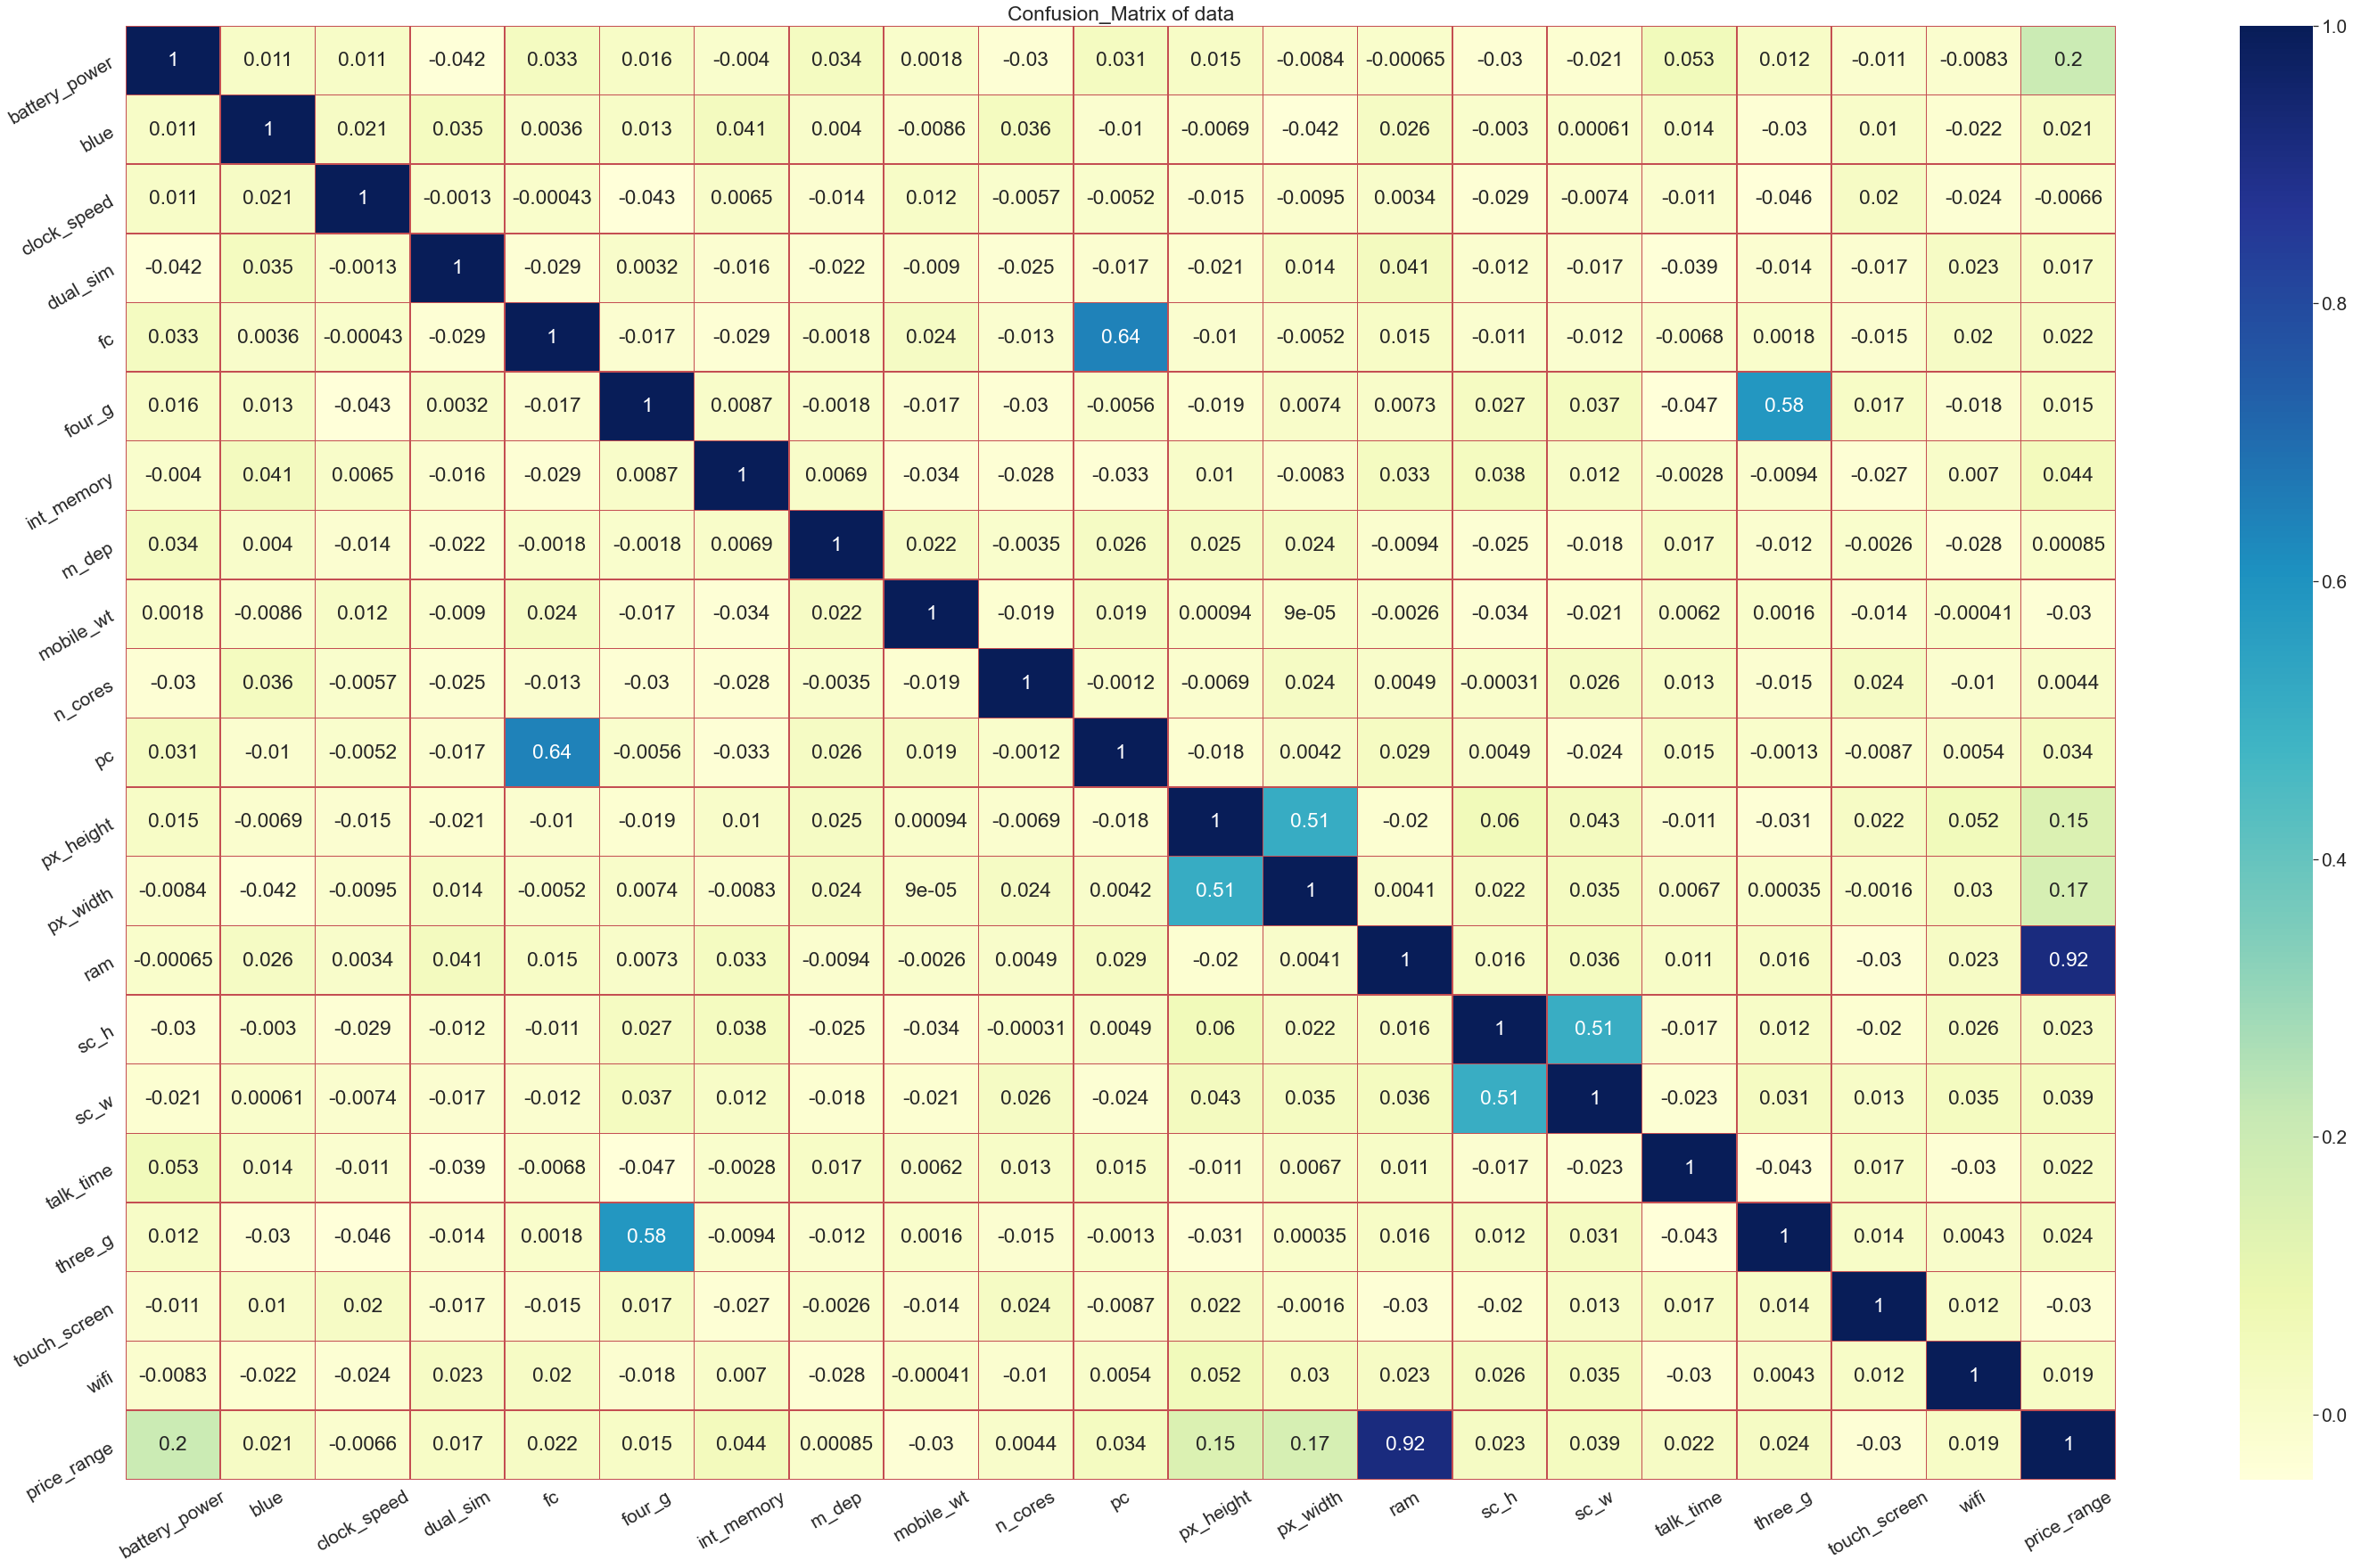

In [39]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=1.9)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [40]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

<AxesSubplot:xlabel='clock_speed'>

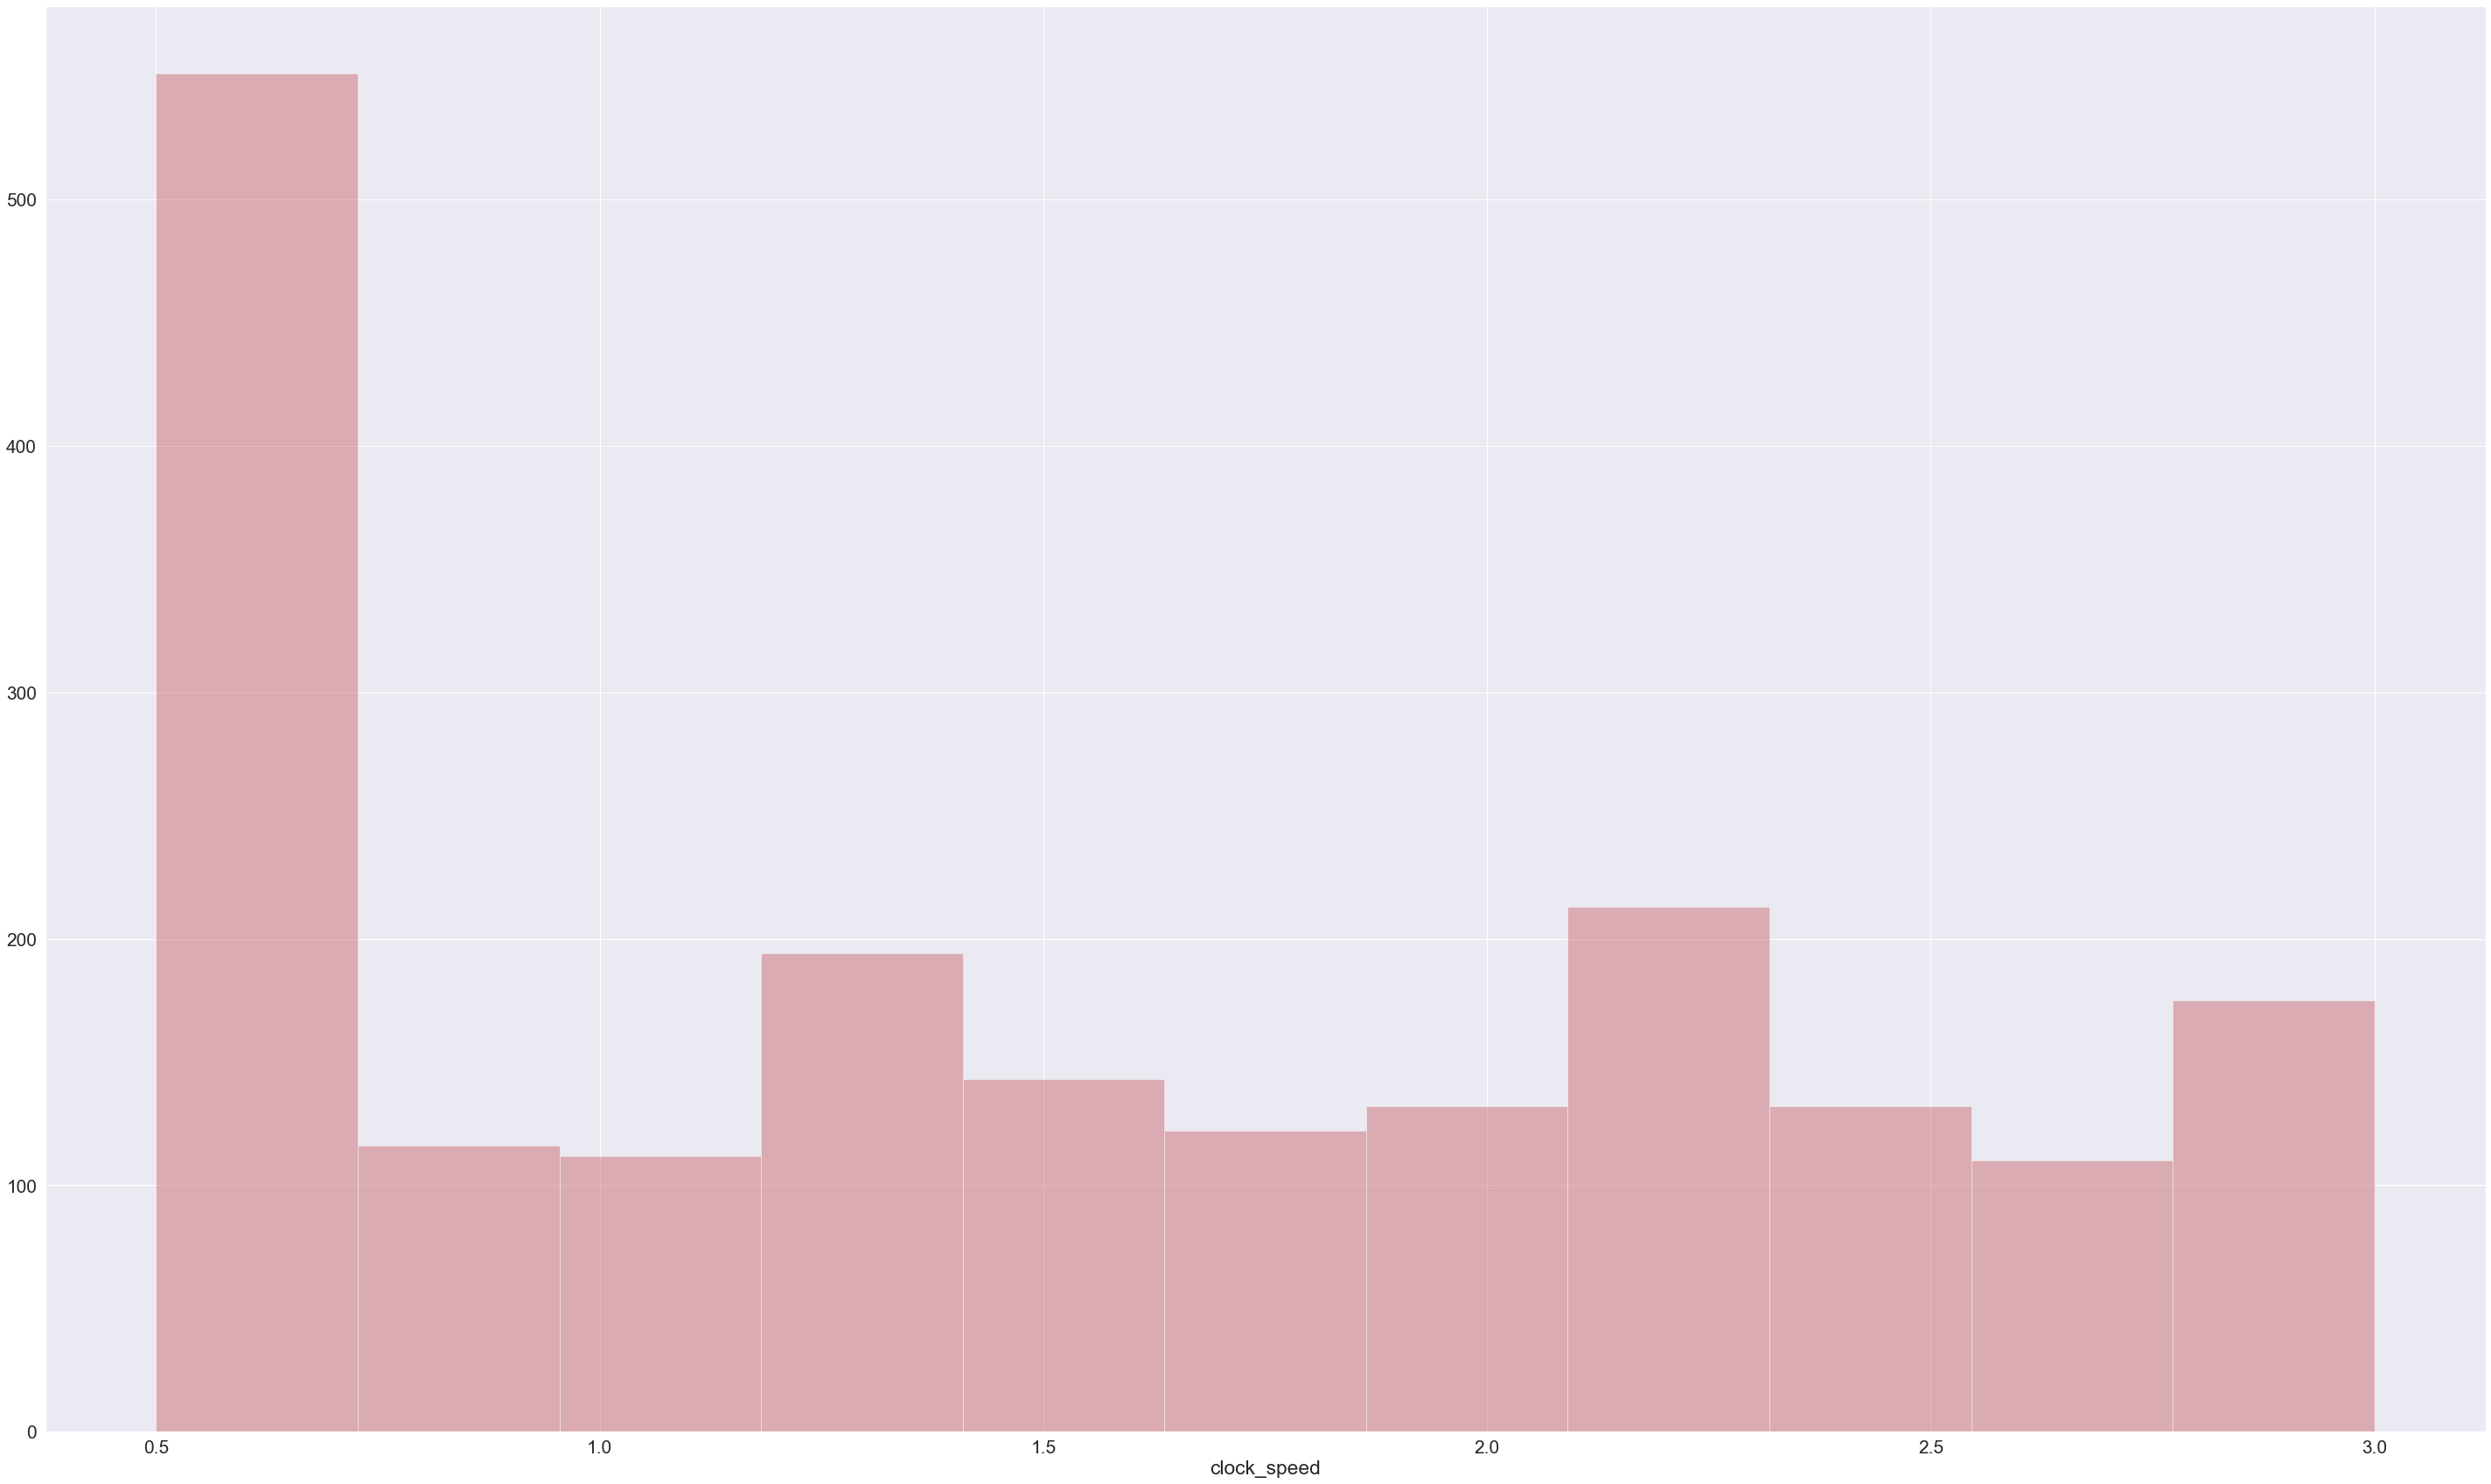

In [41]:
# identify The clock_speede distribution 
sns.distplot(df["clock_speed"] , kde=False , color="r")

<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

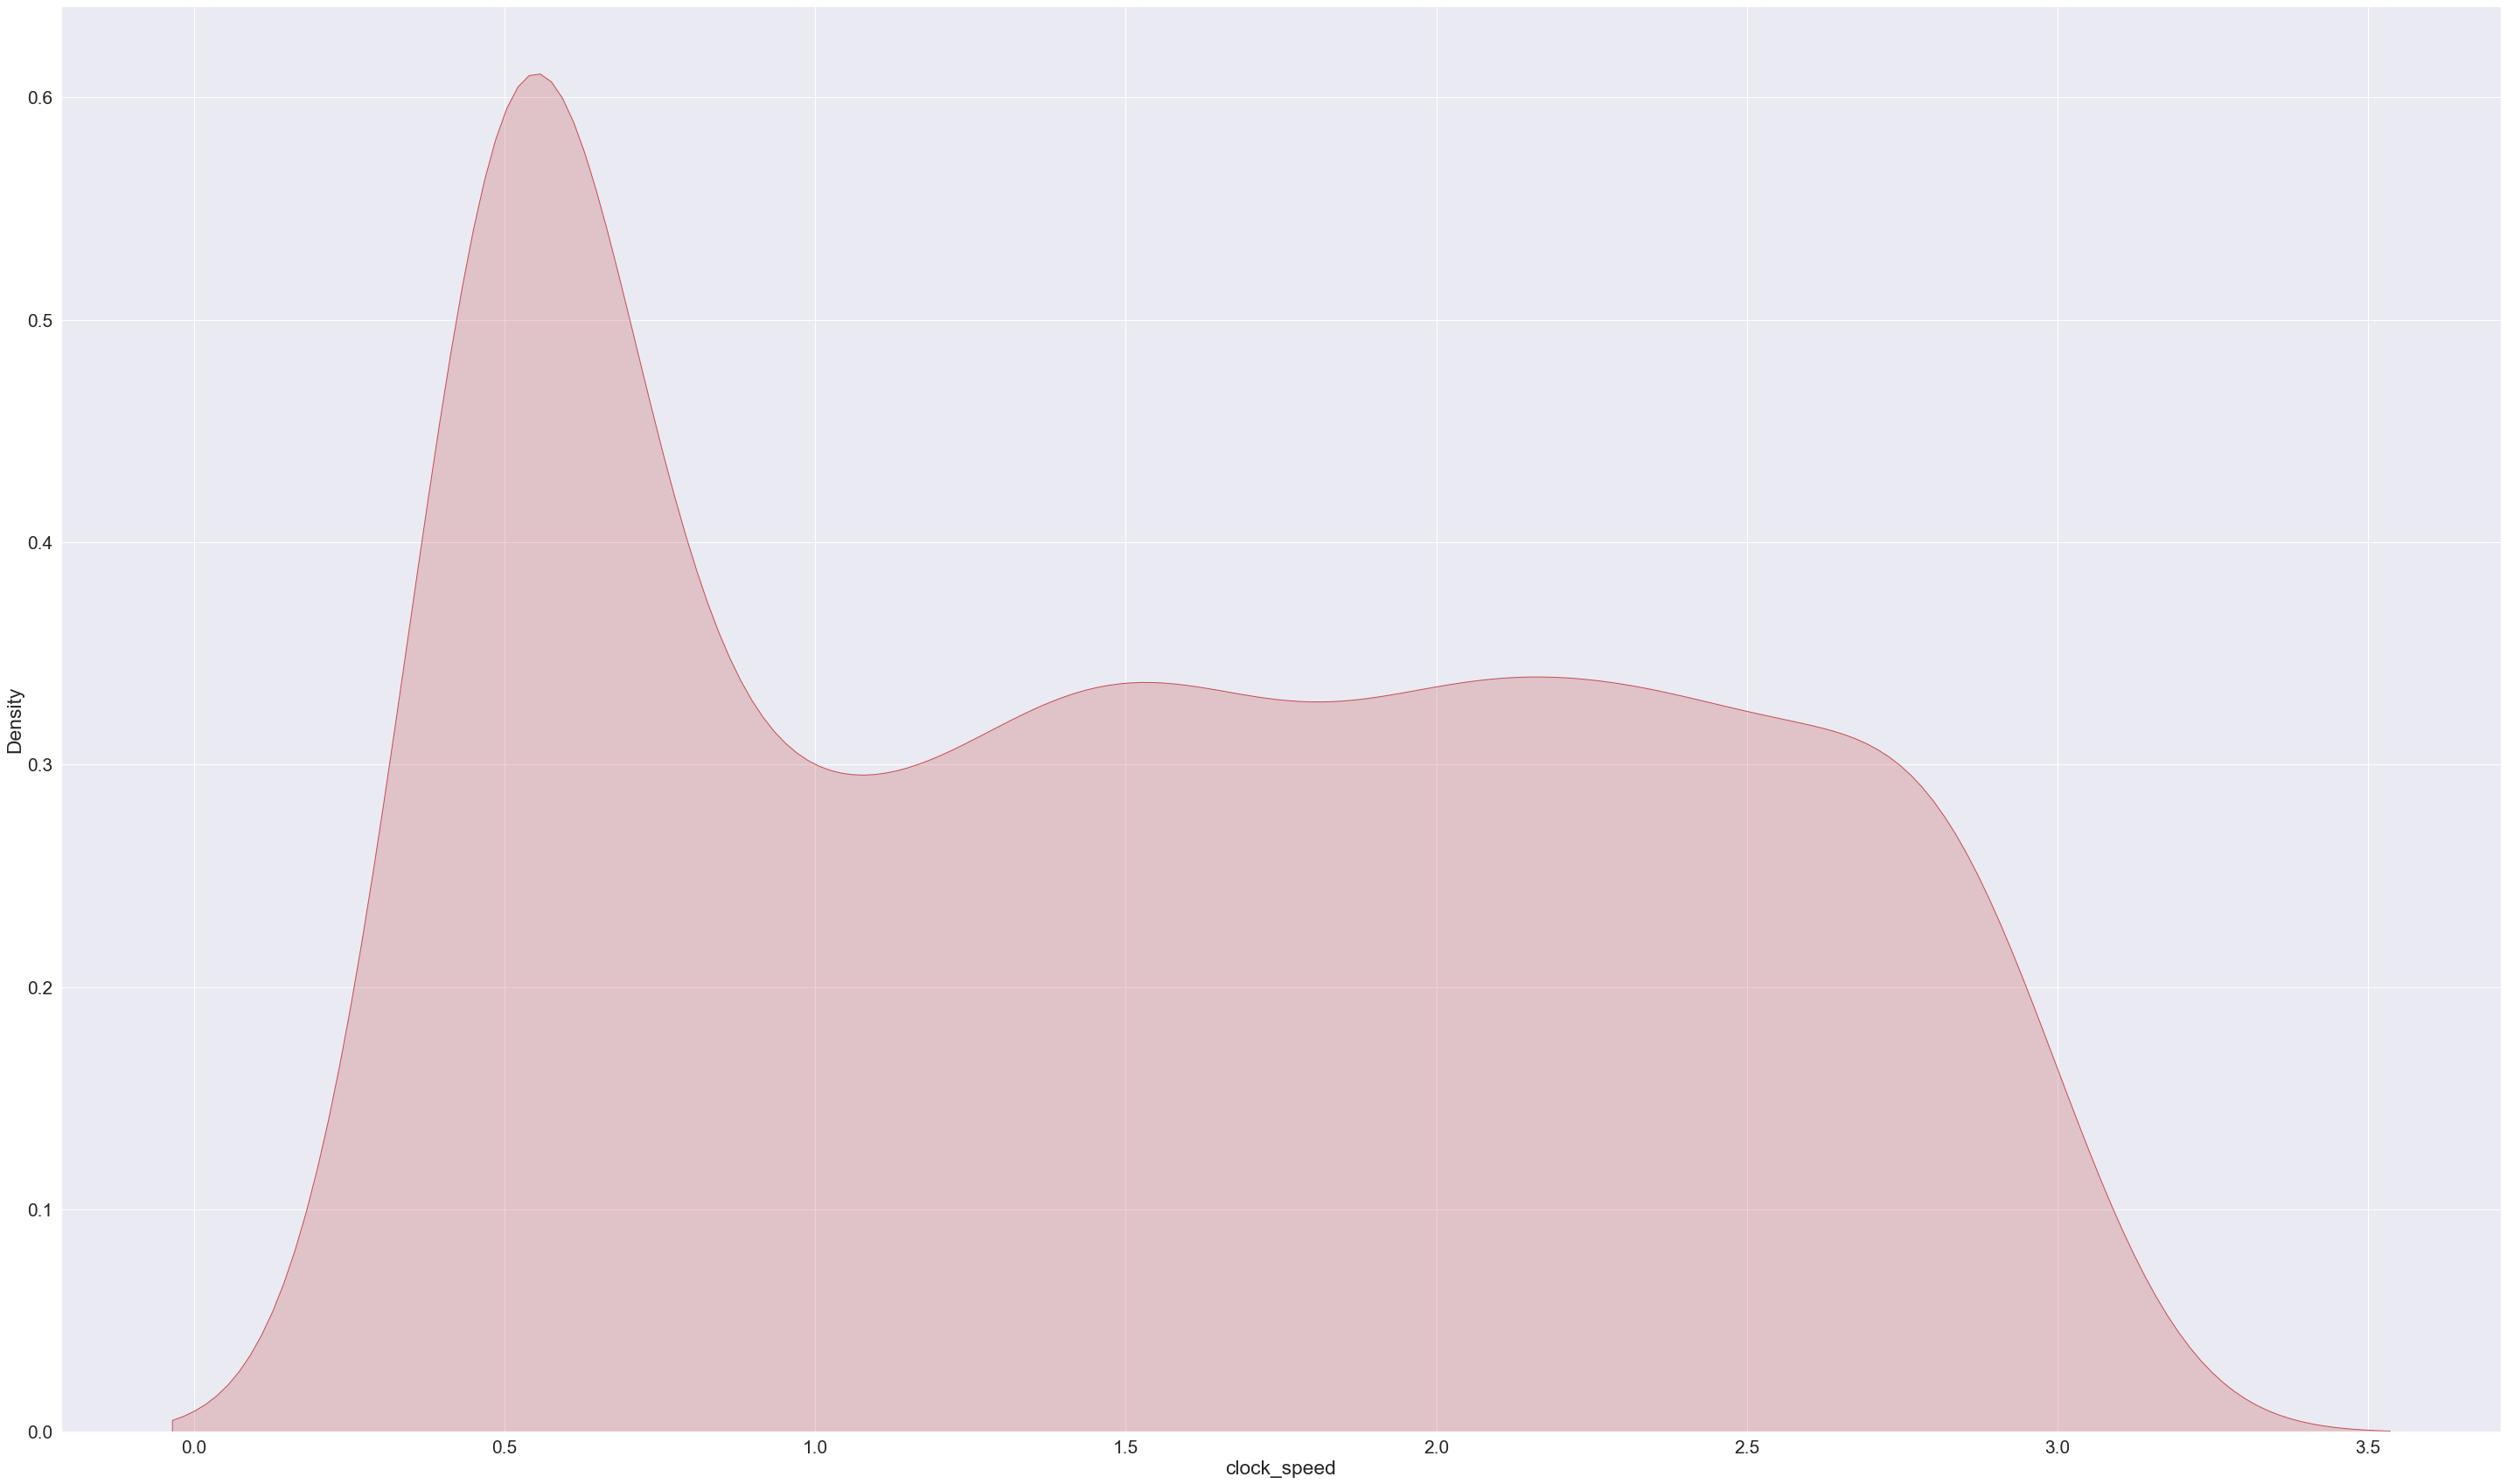

In [42]:
sns.kdeplot(df["clock_speed"] , shade=True , color="r")

<AxesSubplot:xlabel='int_memory'>

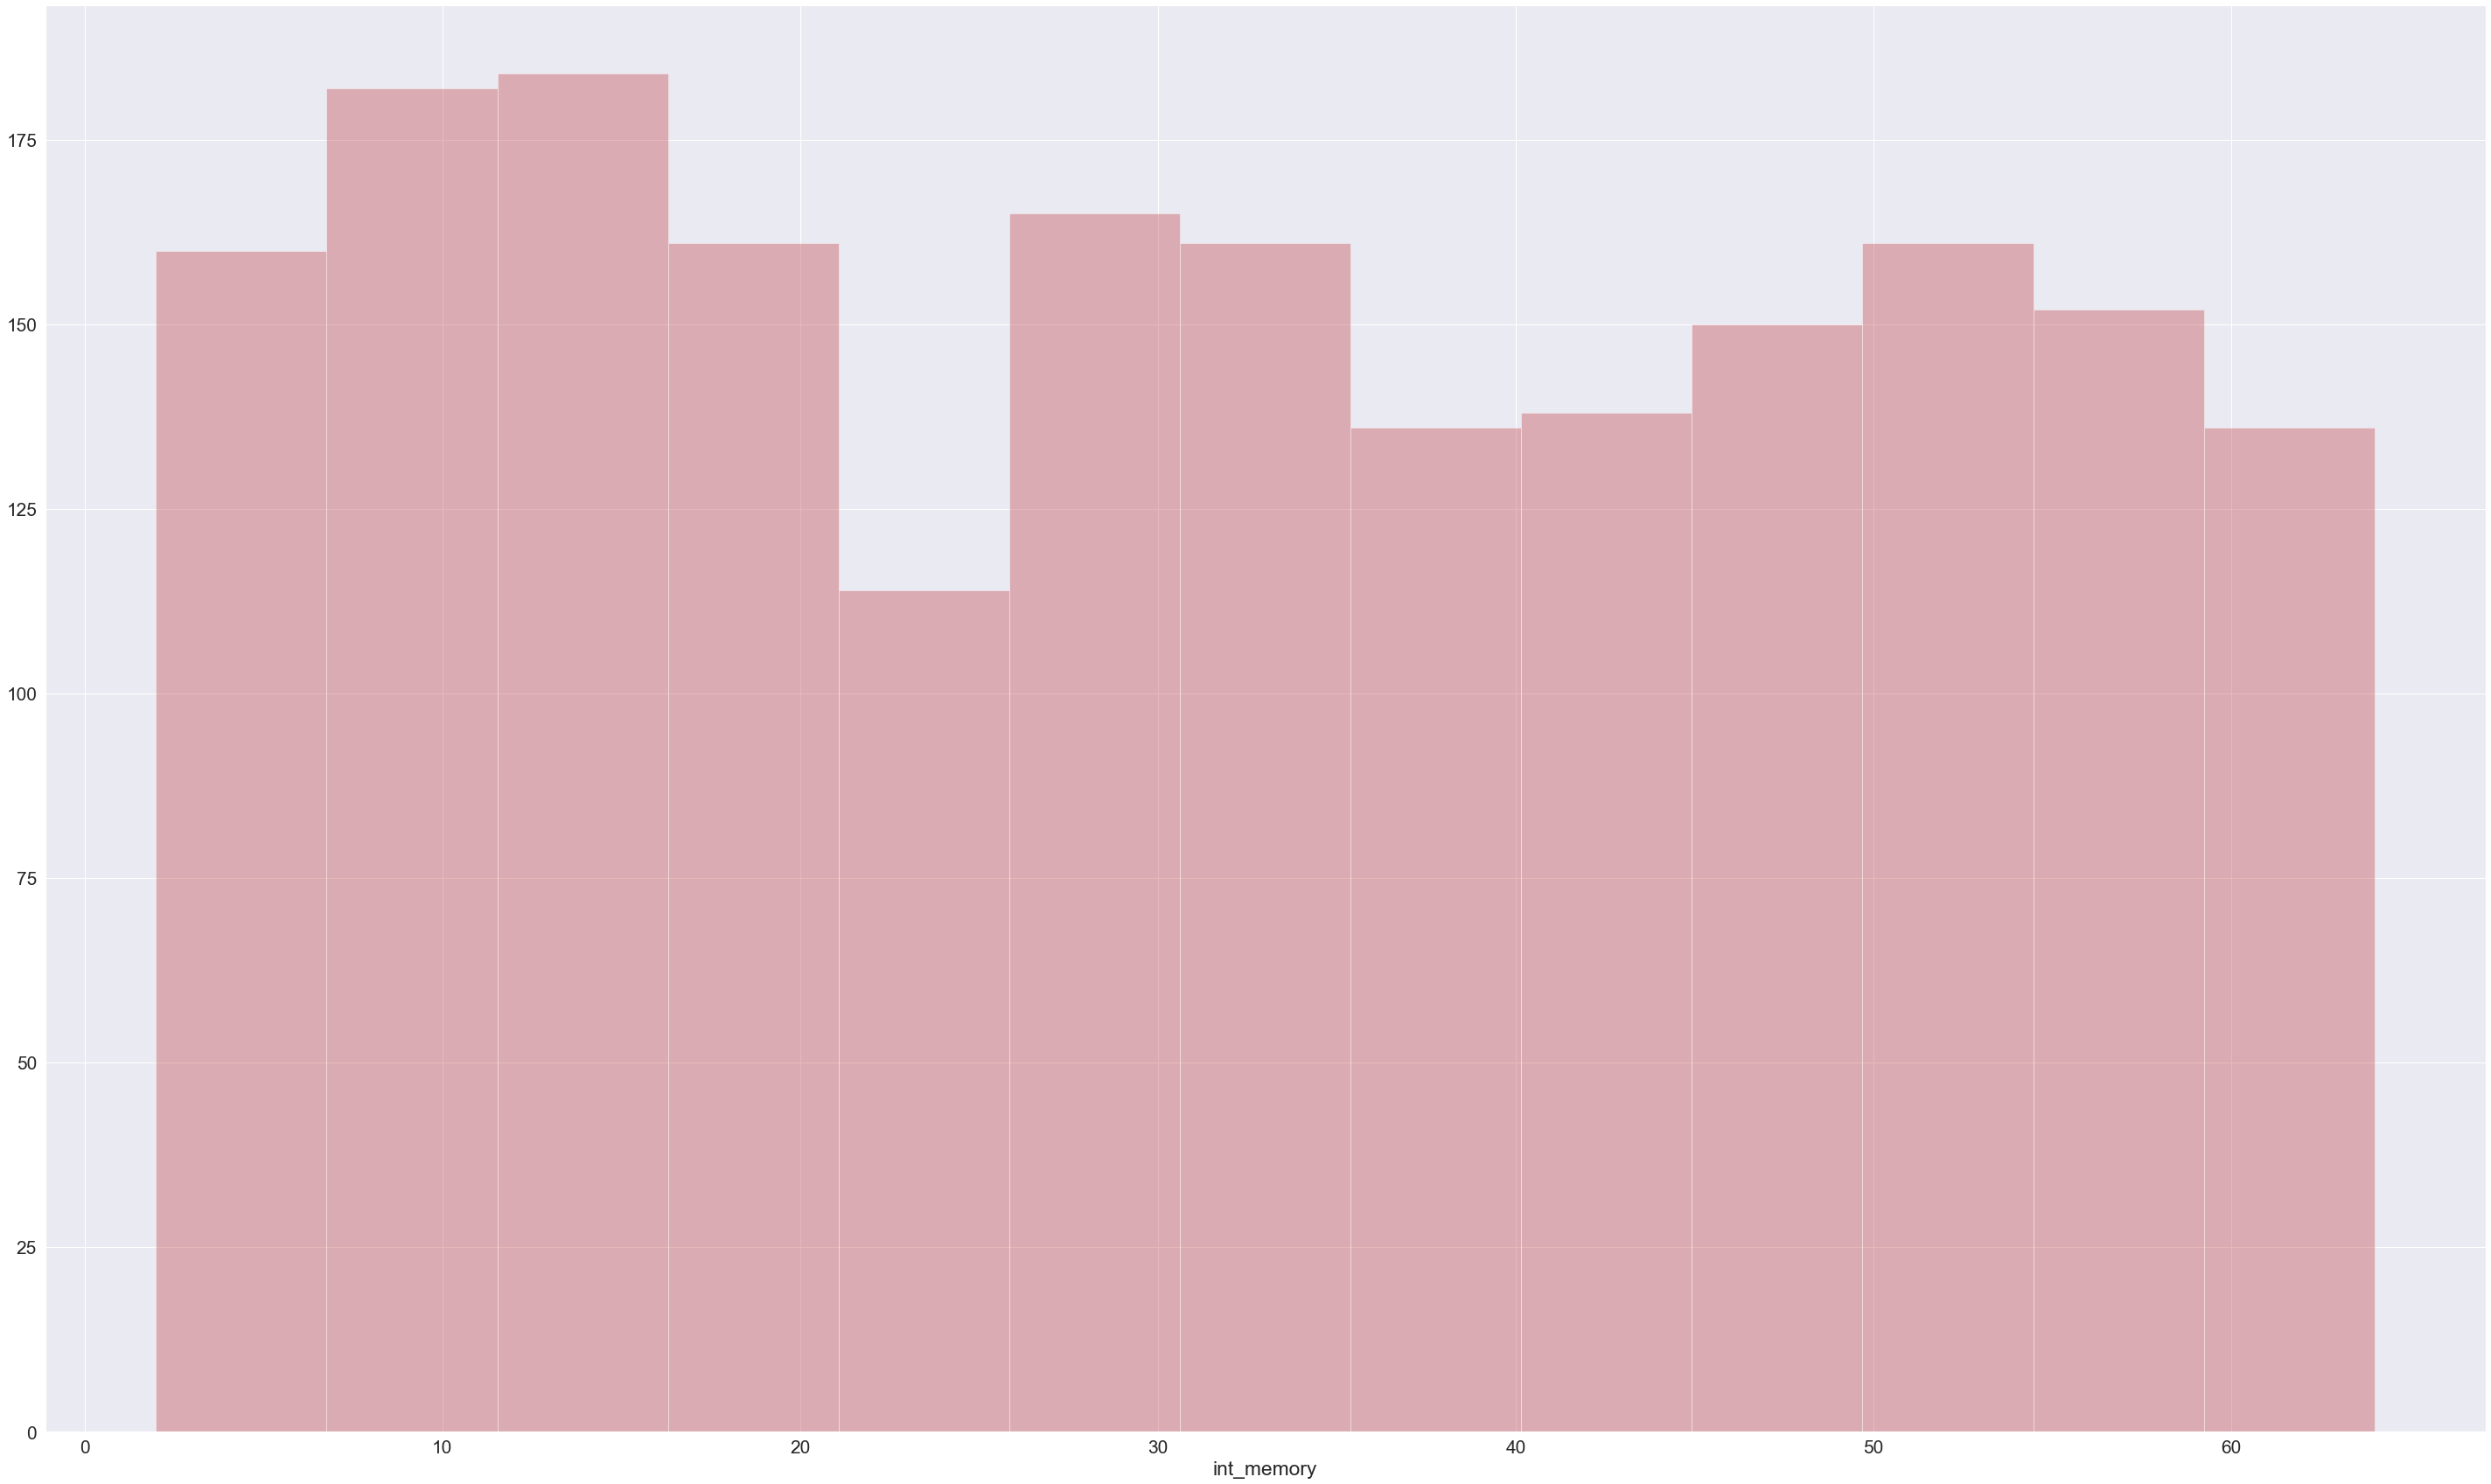

In [43]:
# identify The int_memory distribution 
sns.distplot(df["int_memory"] , kde=False , color="r")

<AxesSubplot:xlabel='int_memory', ylabel='Density'>

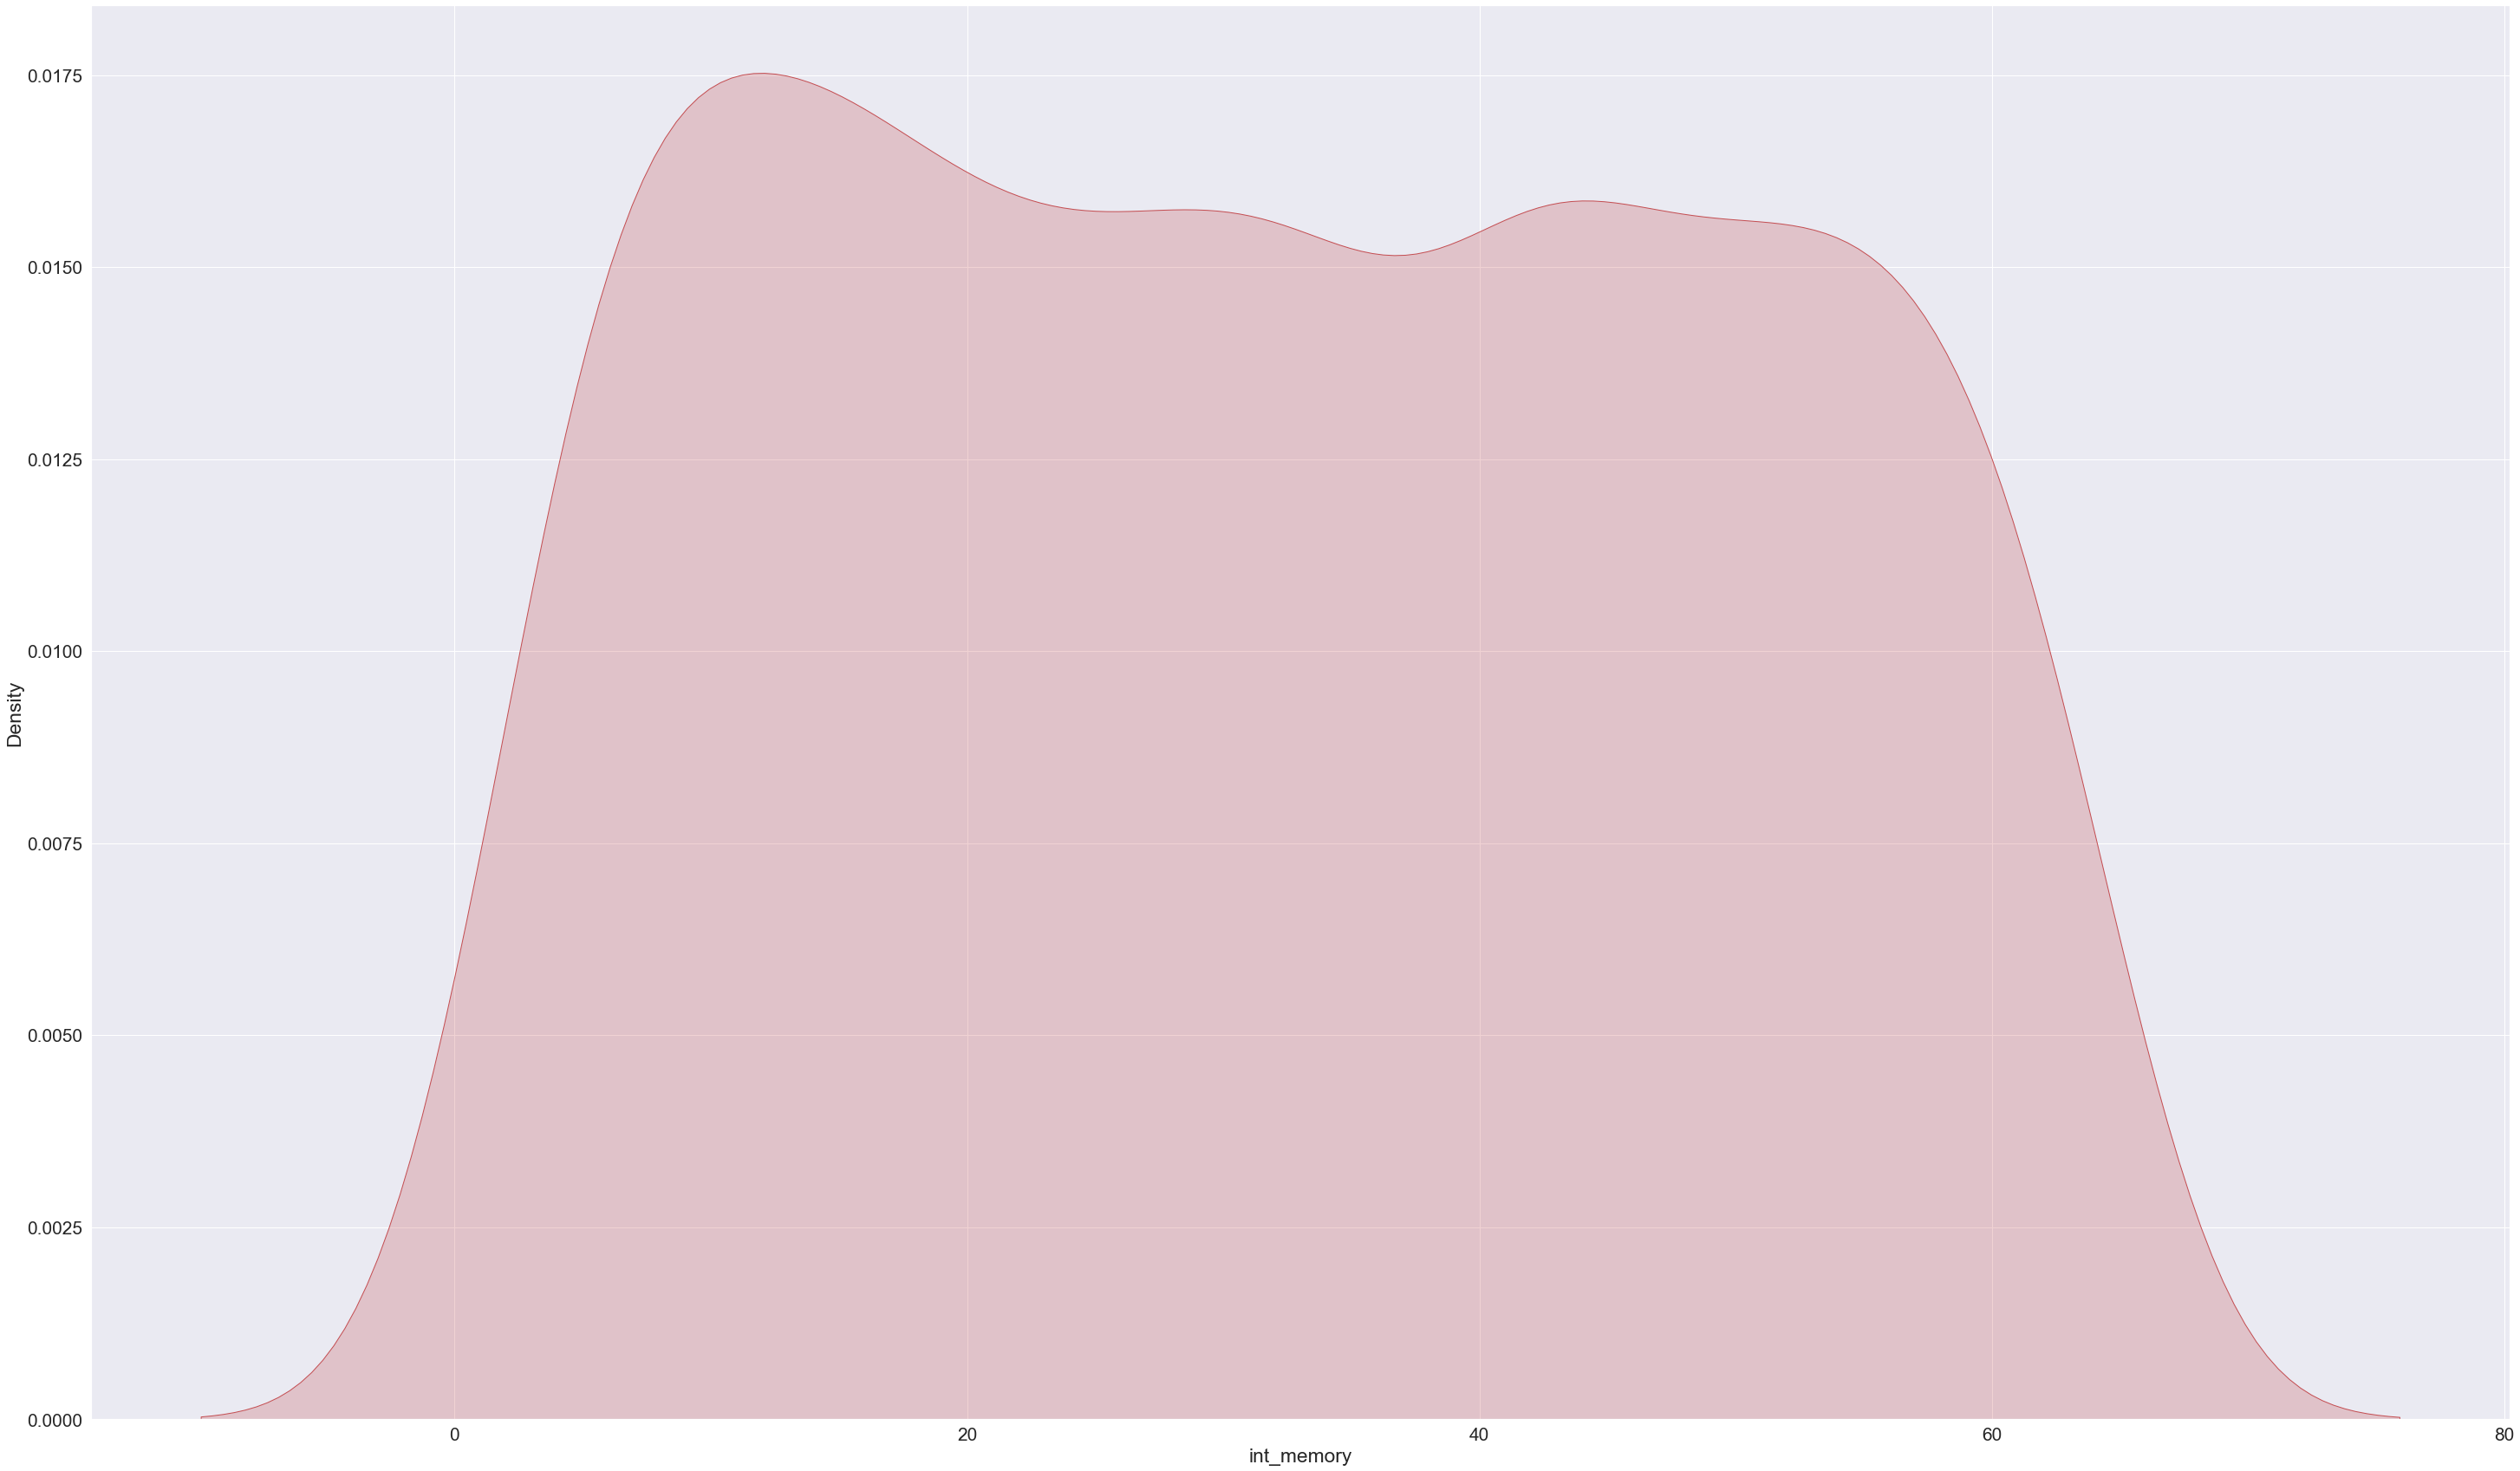

In [44]:
sns.kdeplot(df["int_memory"] , shade=True , color="r")

<AxesSubplot:xlabel='m_dep'>

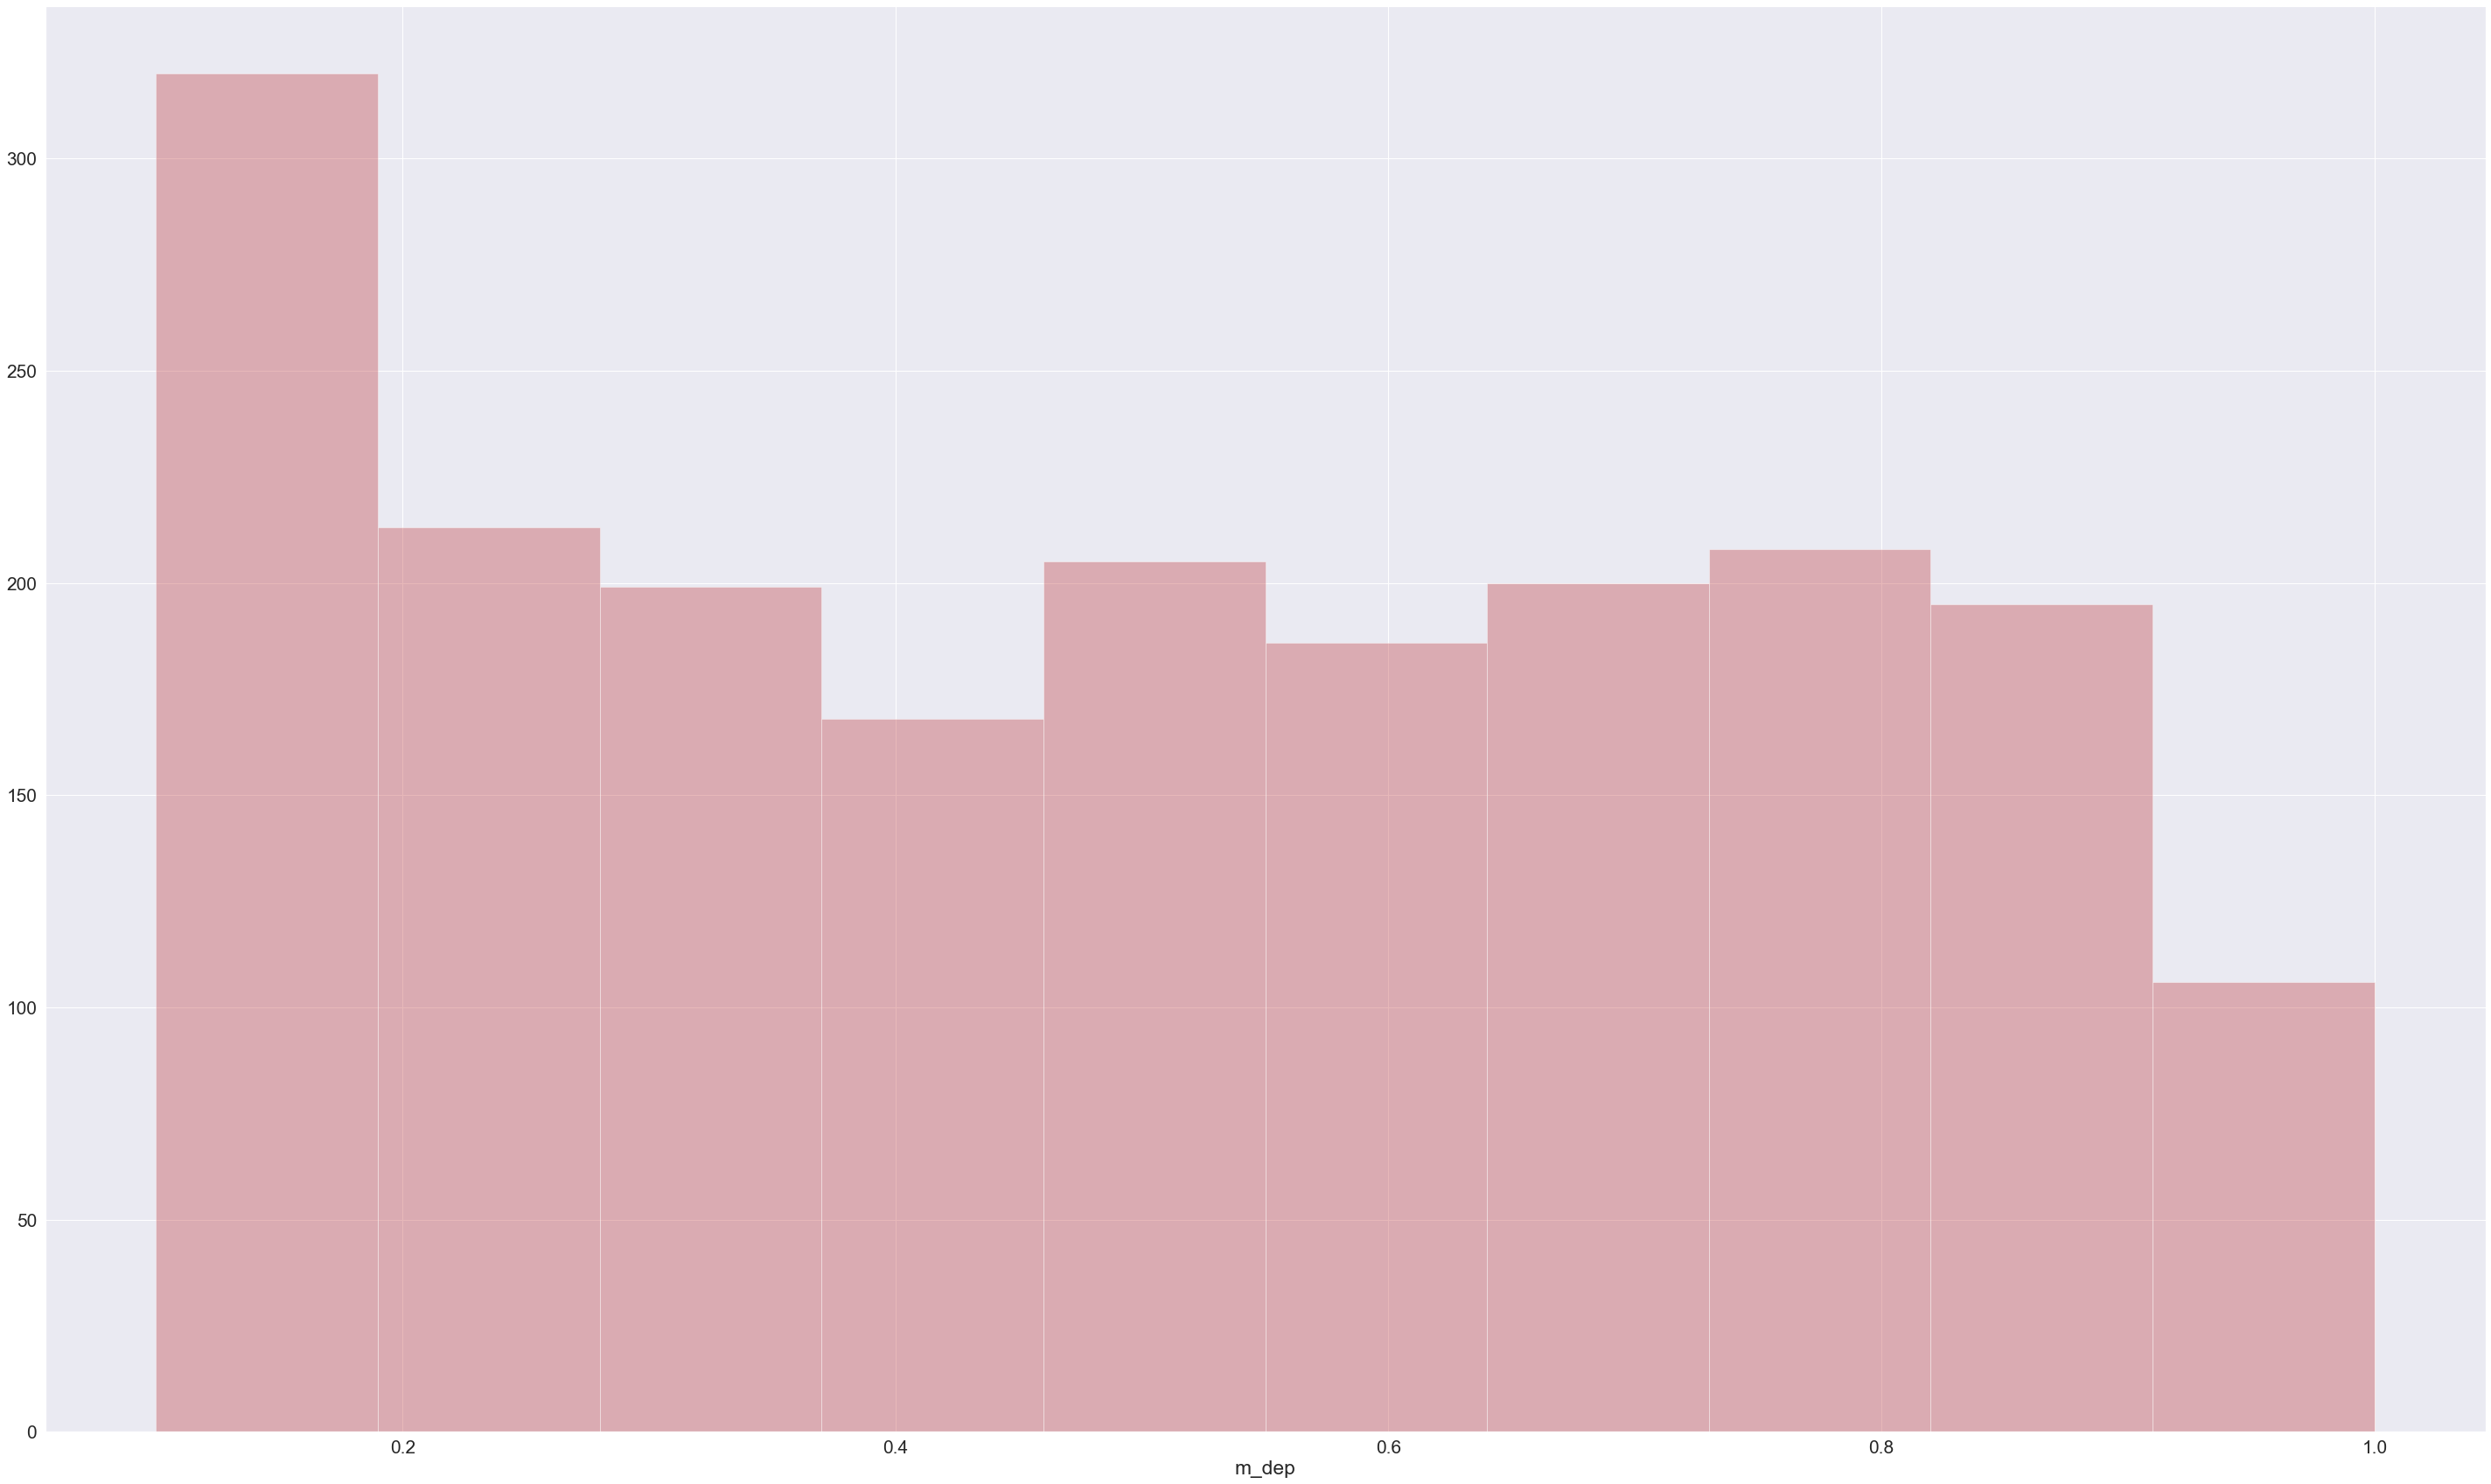

In [45]:
# identify The m_dep distribution 
sns.distplot(df["m_dep"] , kde=False , color="r")

<AxesSubplot:xlabel='m_dep', ylabel='Density'>

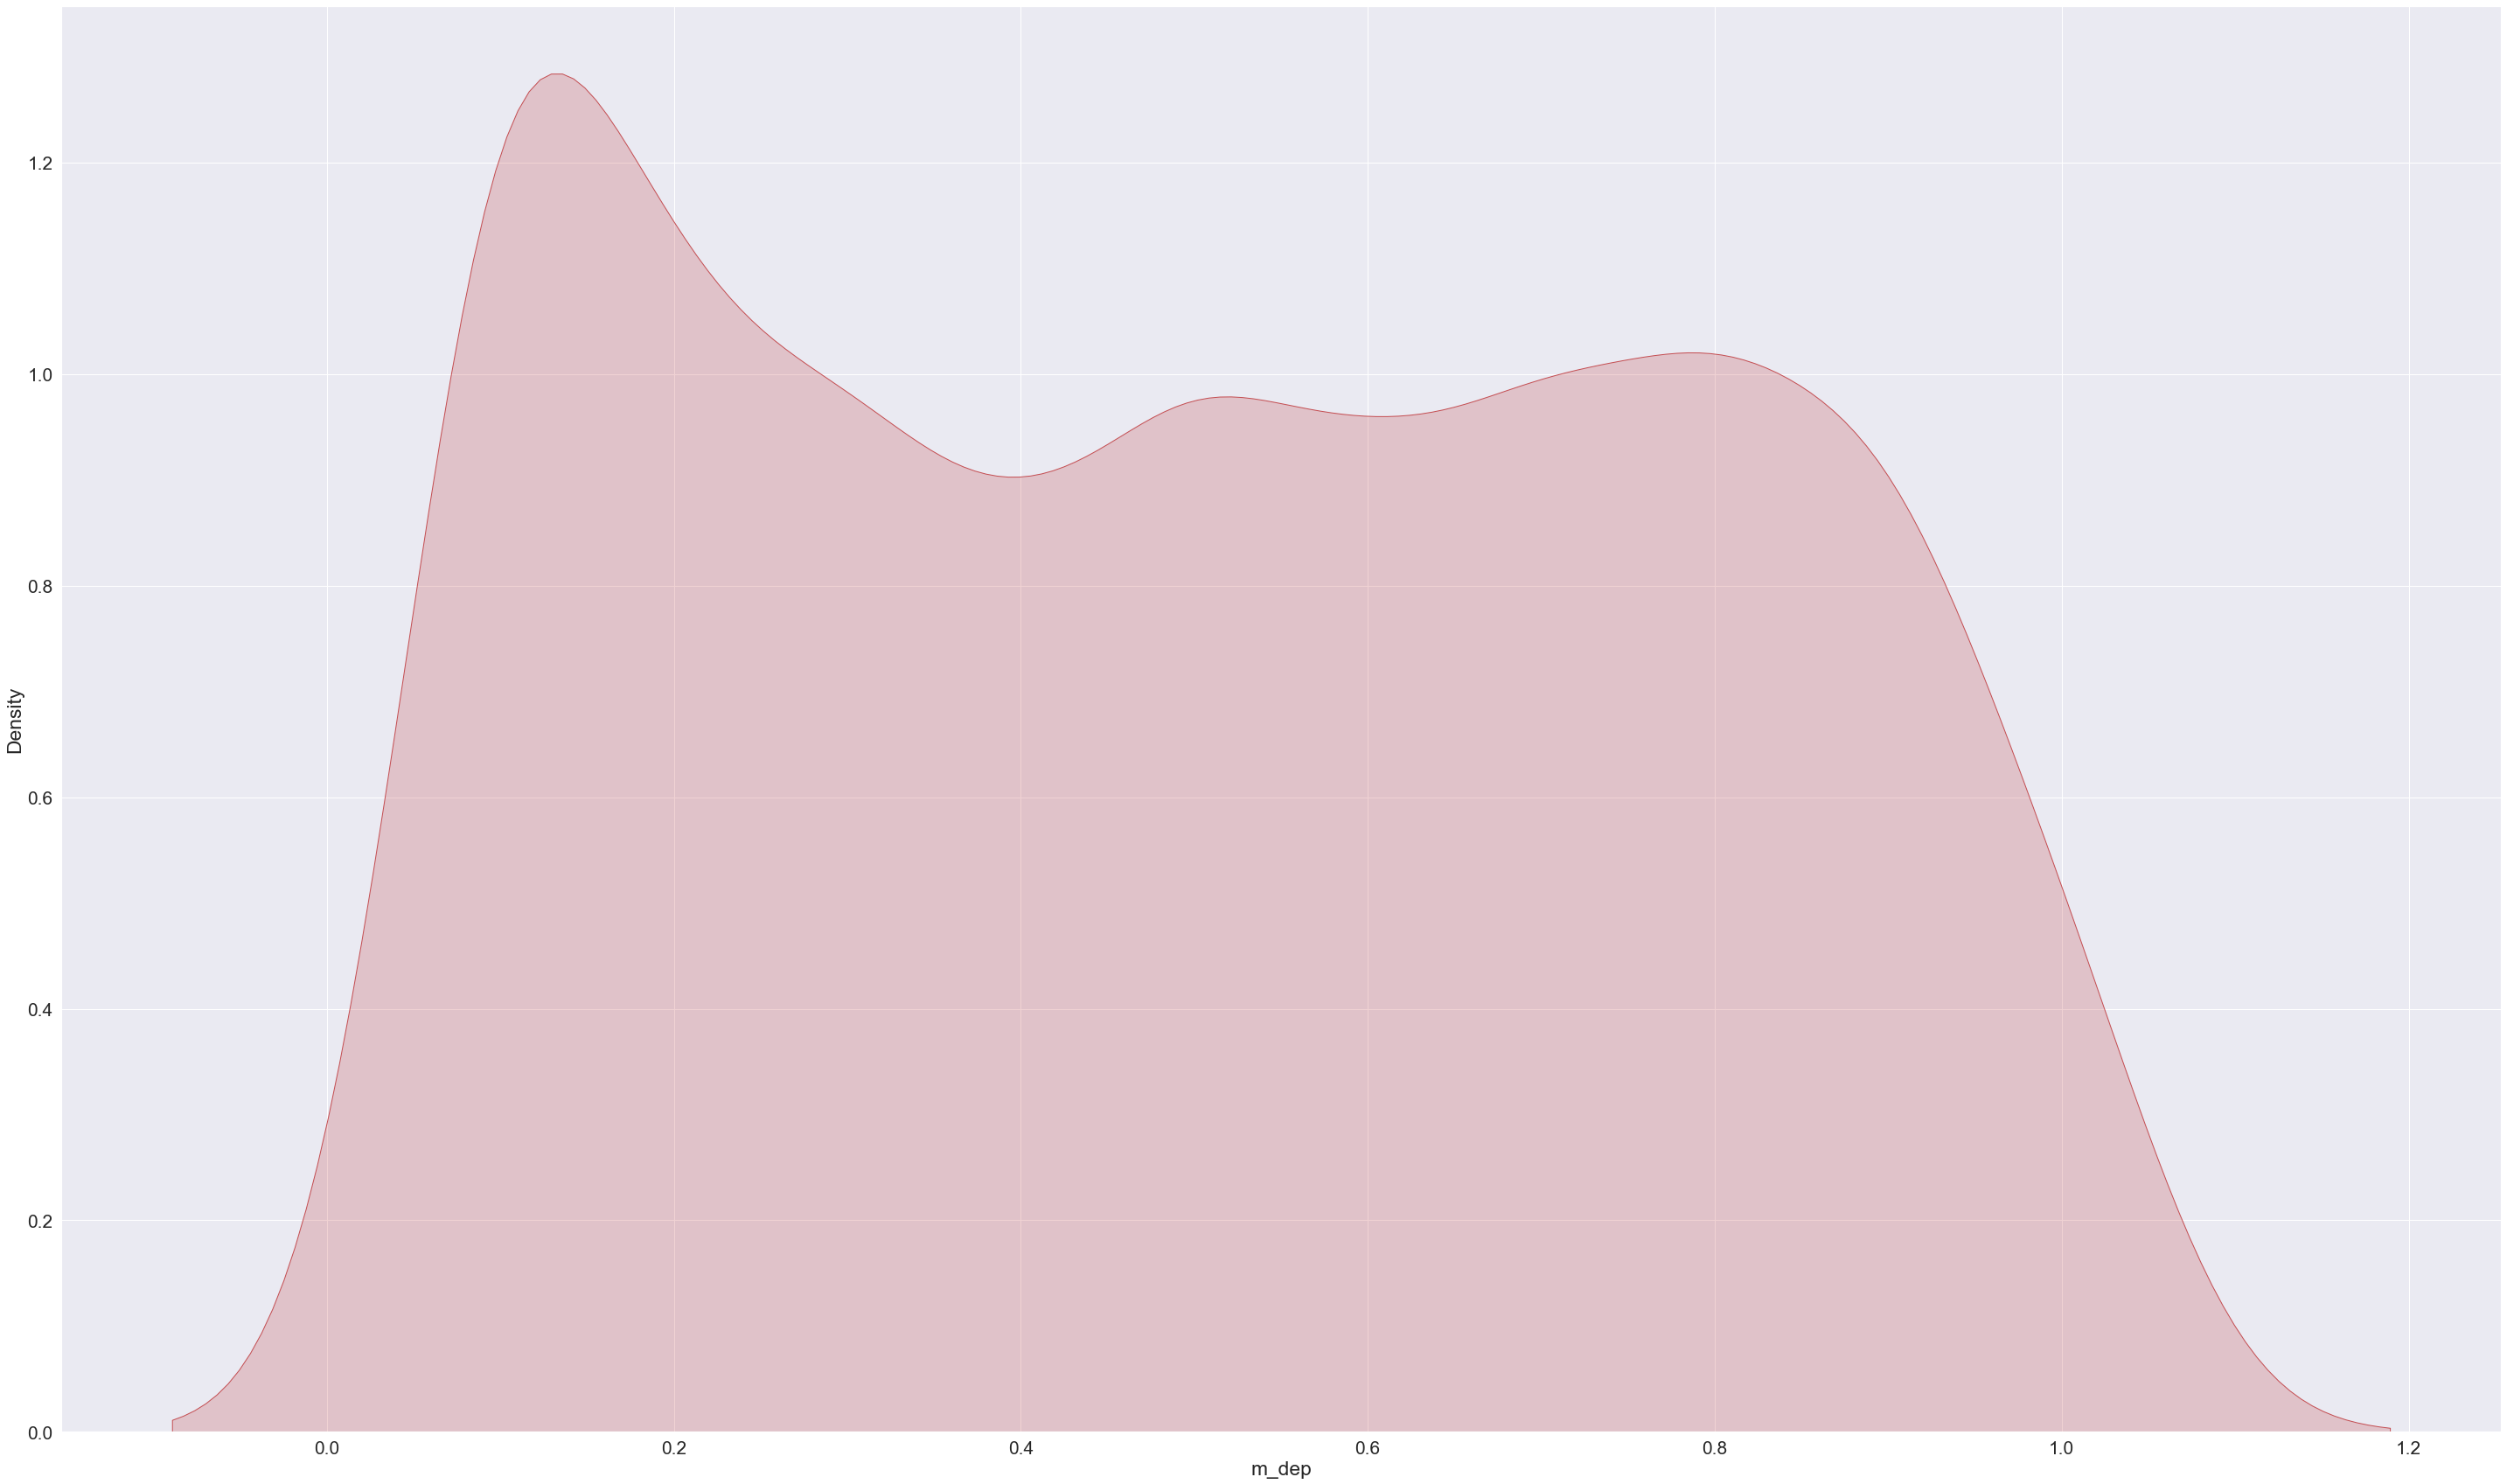

In [46]:
sns.kdeplot(df["m_dep"] , shade=True , color="r")

<AxesSubplot:xlabel='mobile_wt'>

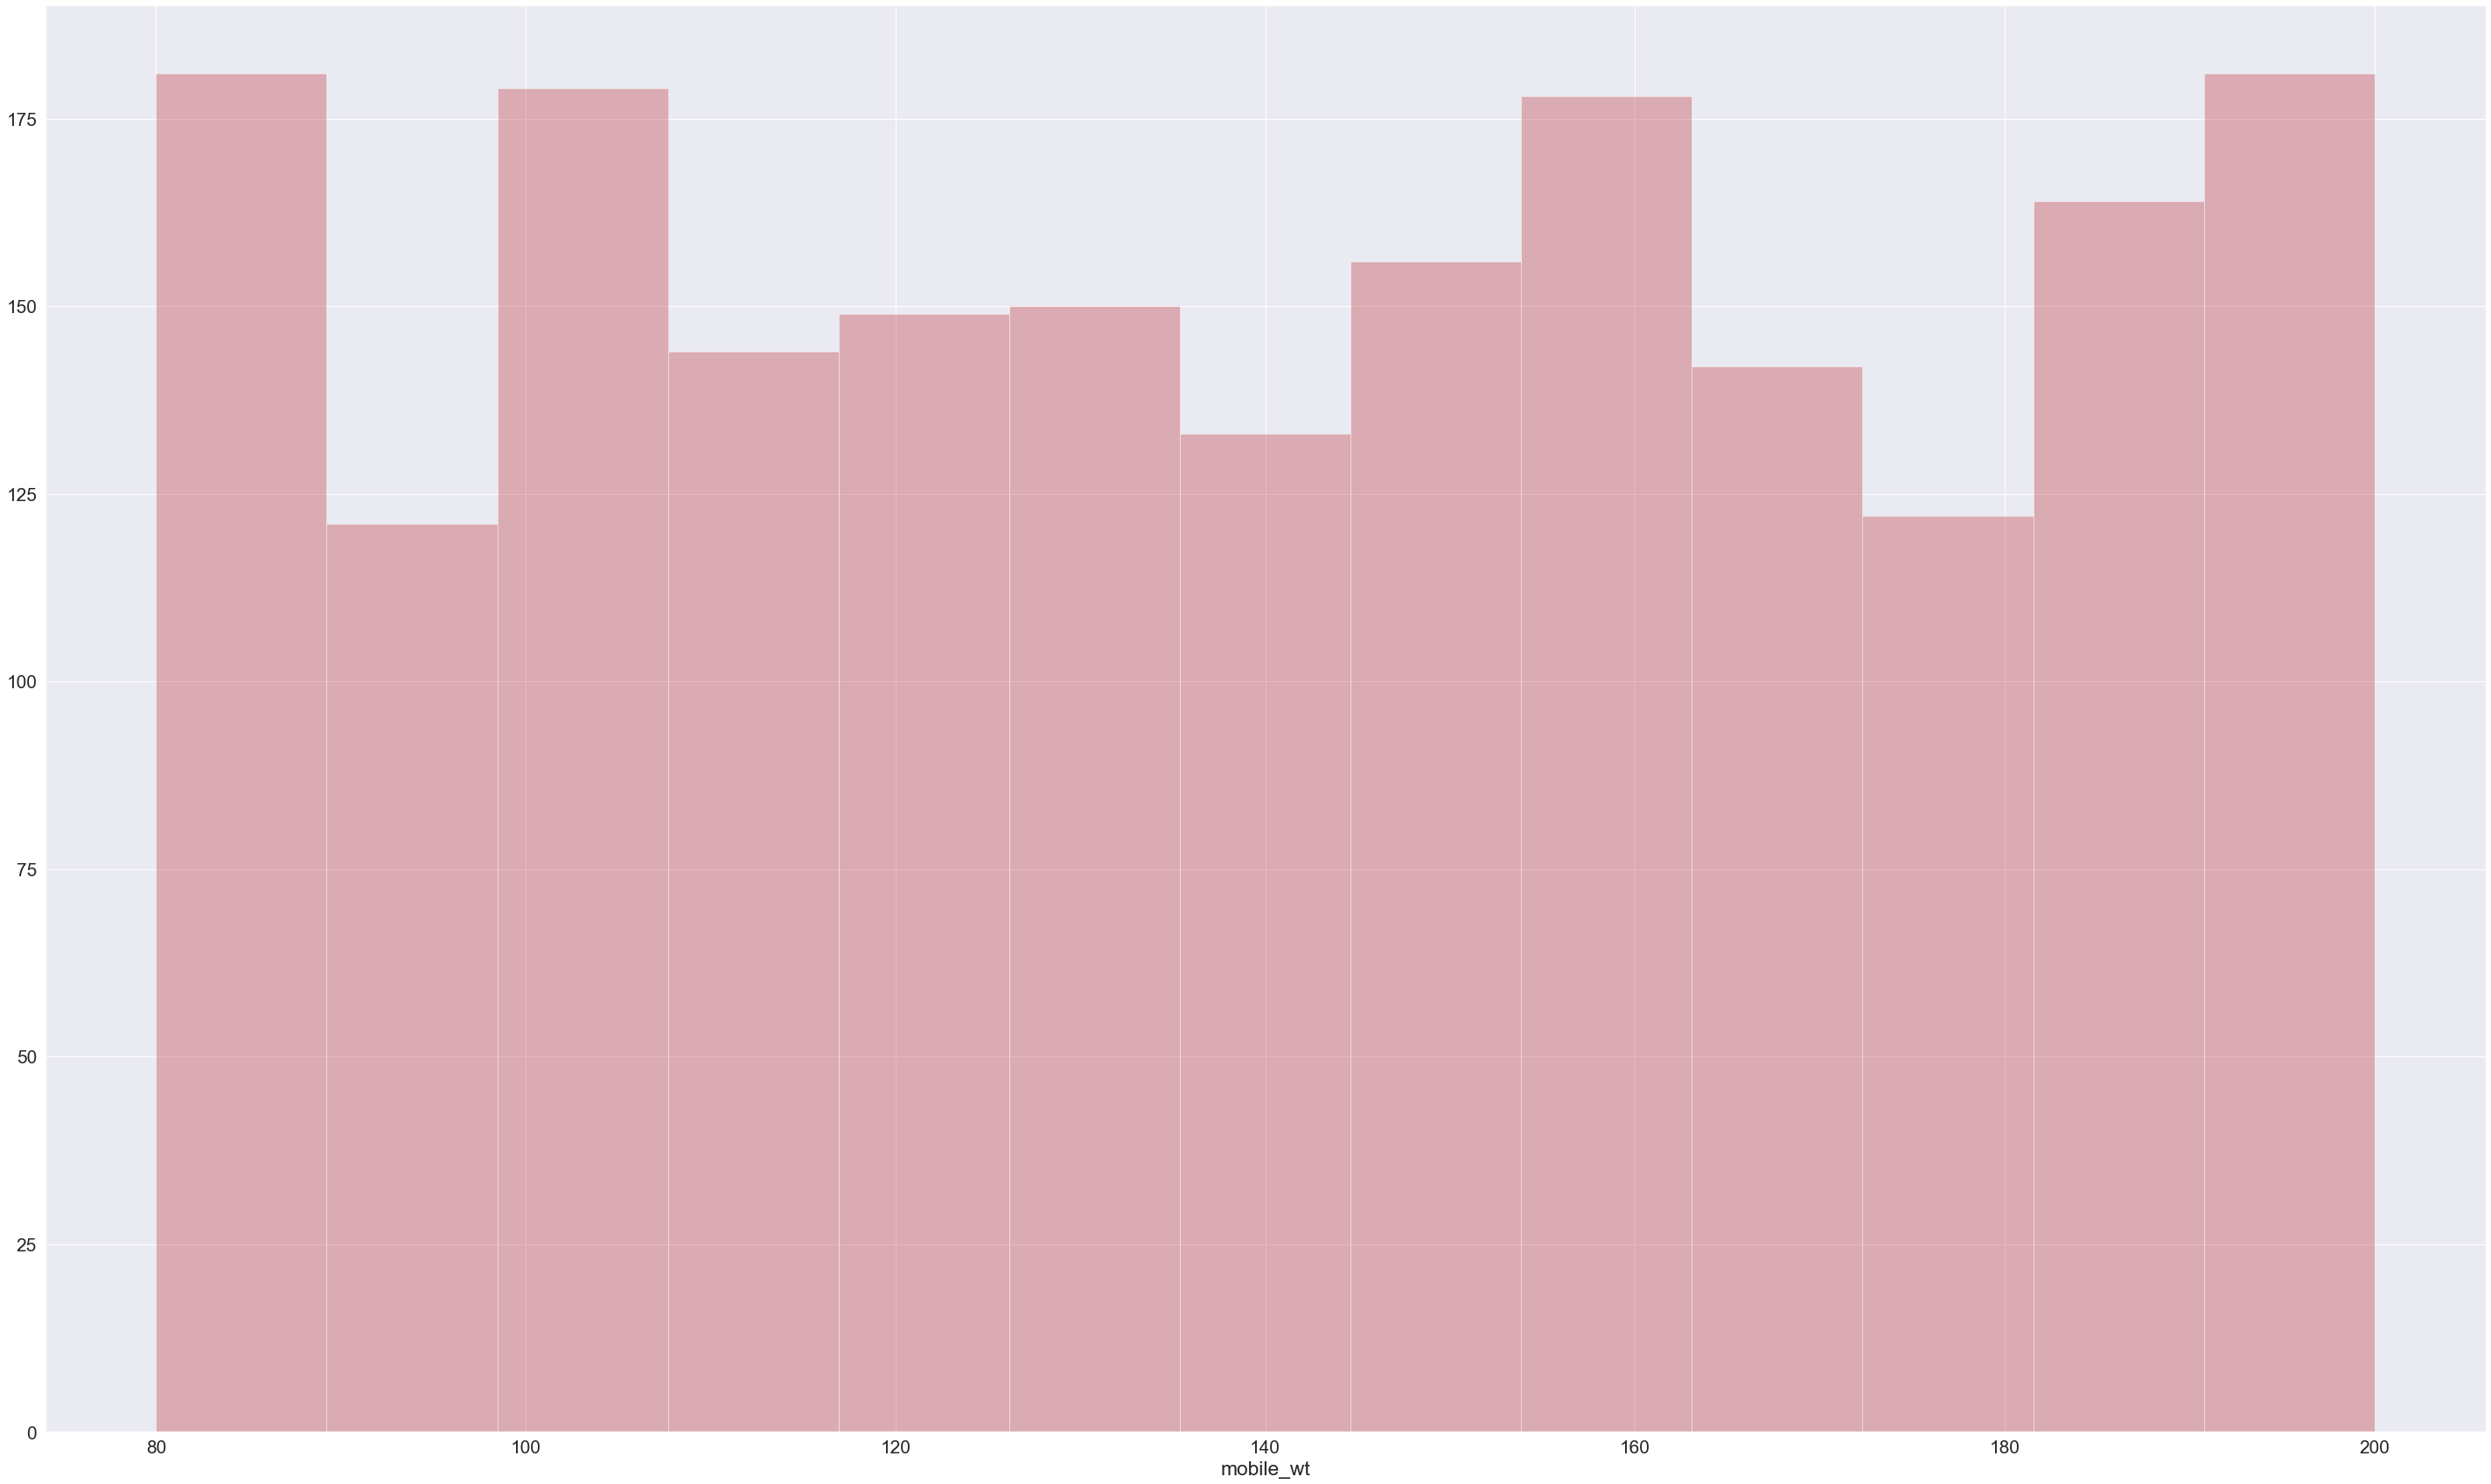

In [47]:
# identify The mobile_wt distribution 
sns.distplot(df["mobile_wt"] , kde=False , color="r")

<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

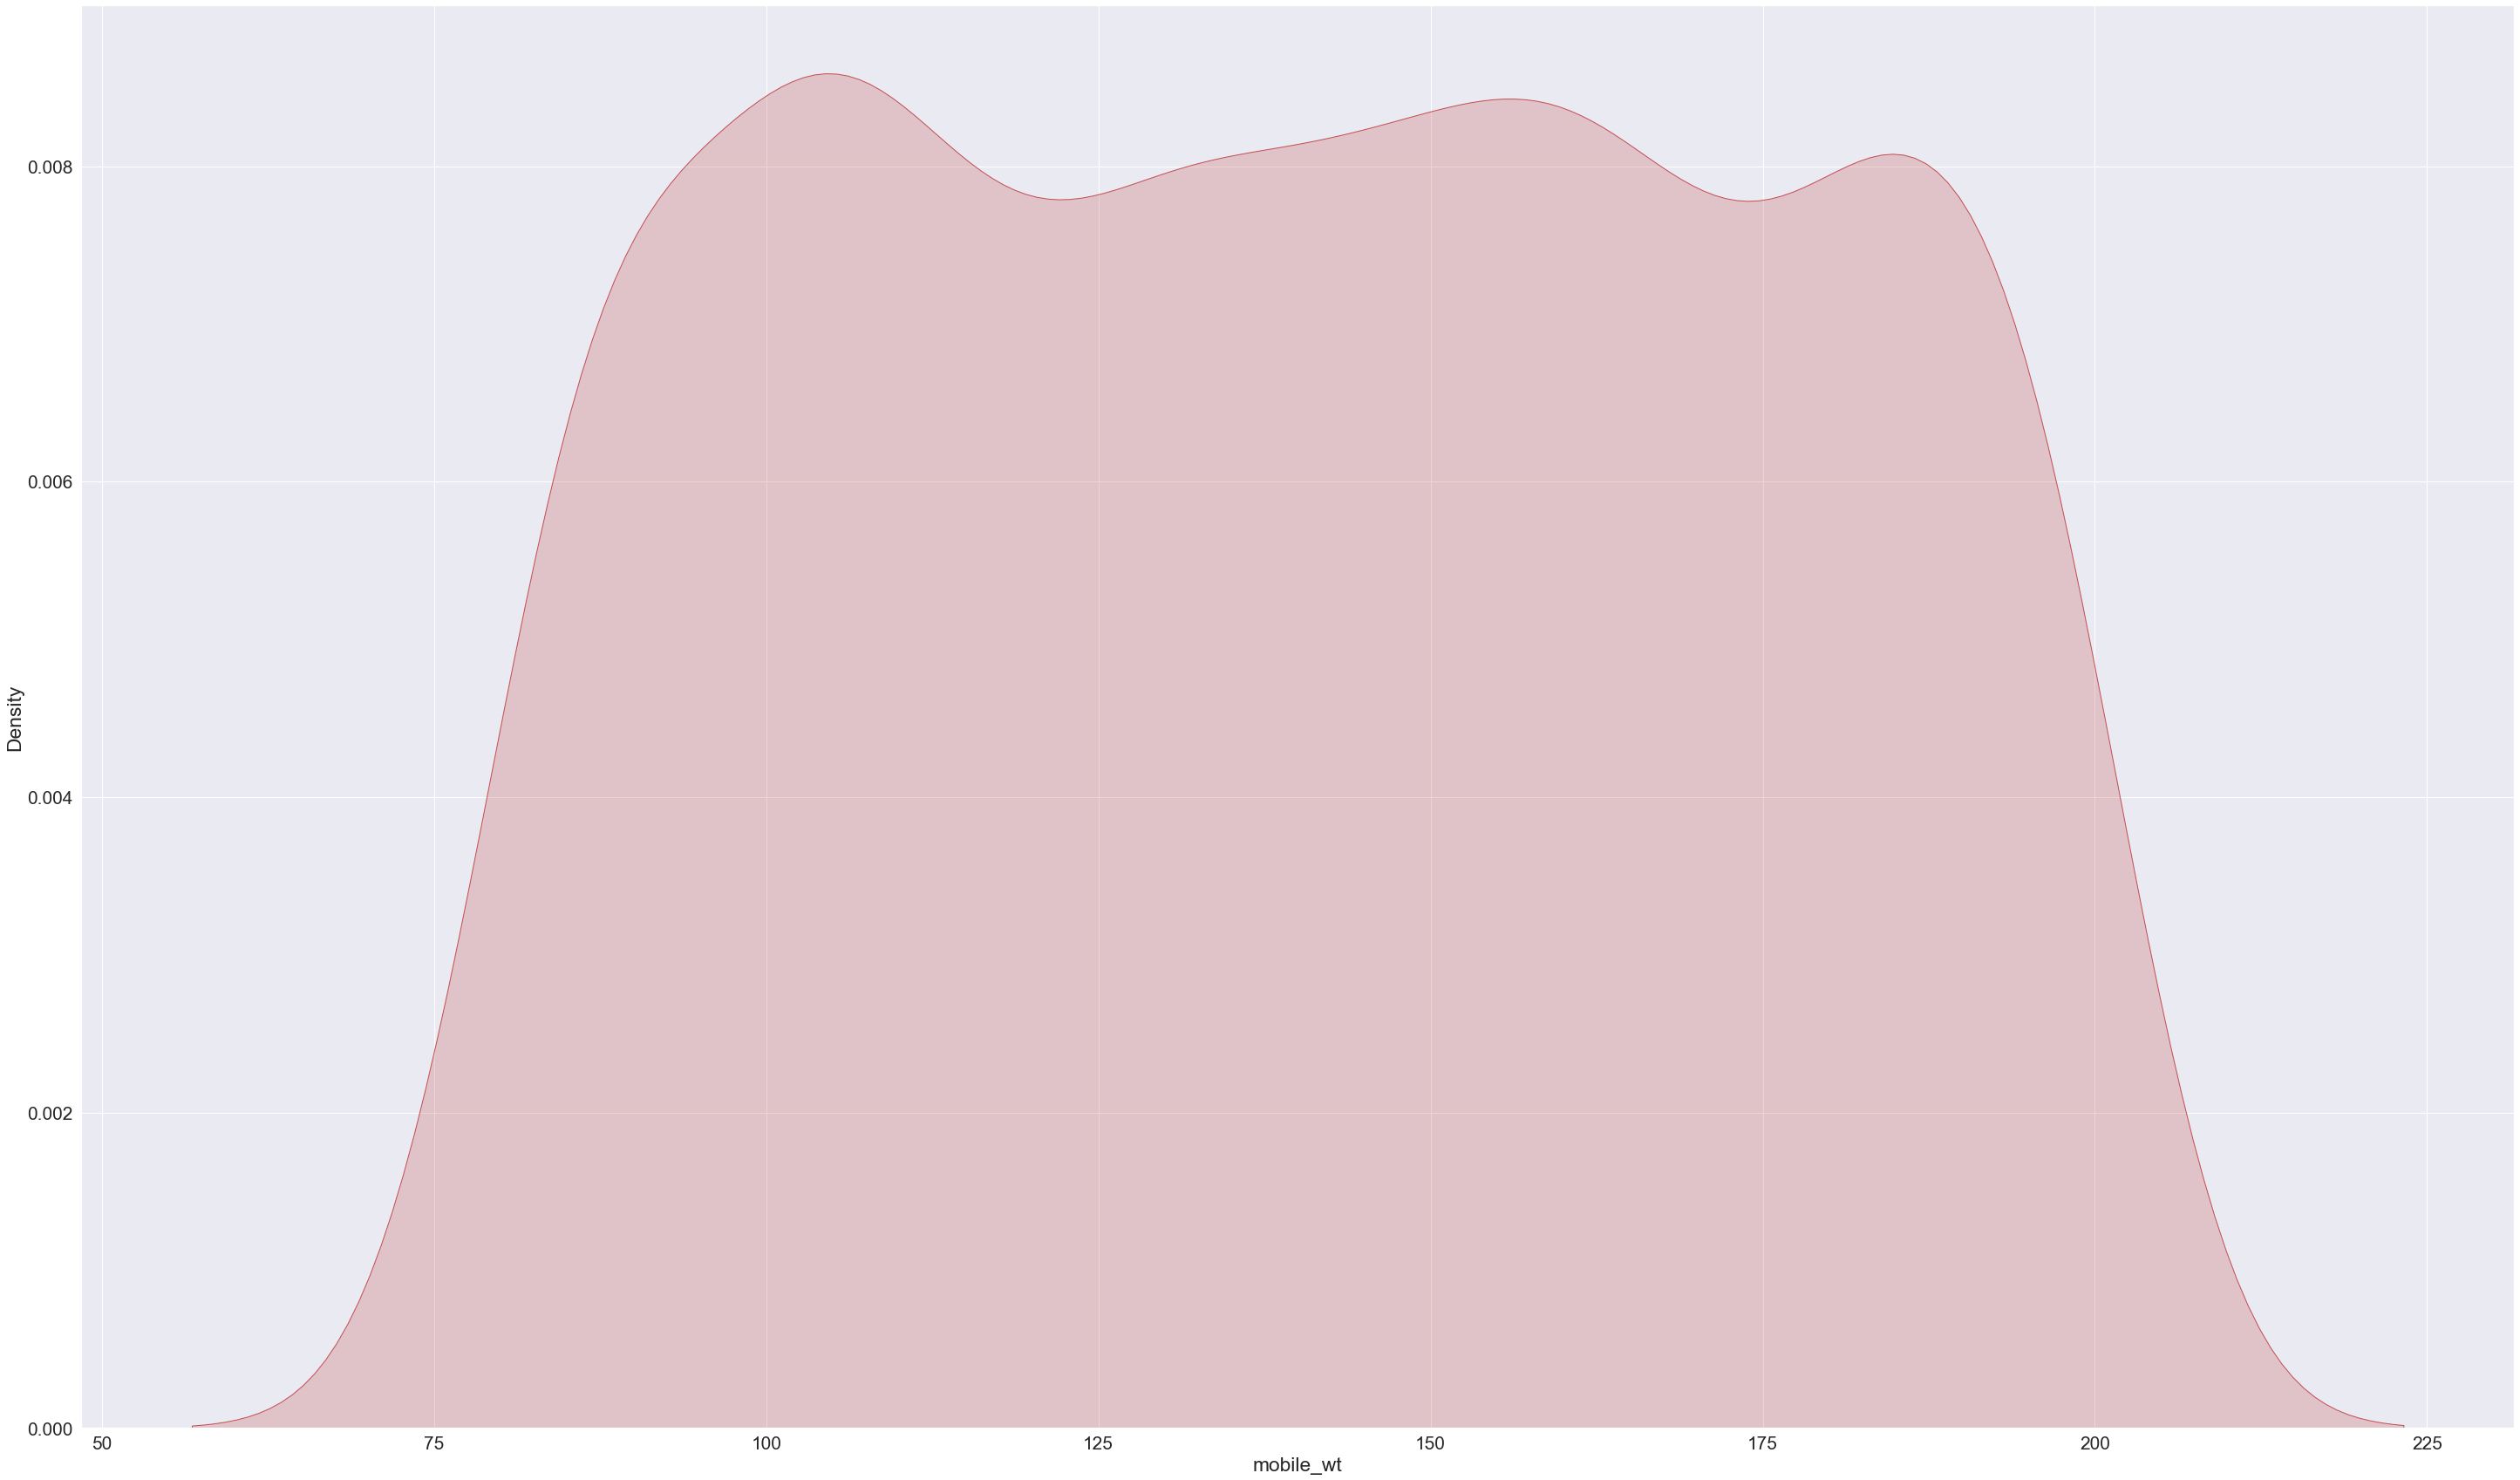

In [48]:
sns.kdeplot(df["mobile_wt"] , shade=True , color="r")

<AxesSubplot:xlabel='ram'>

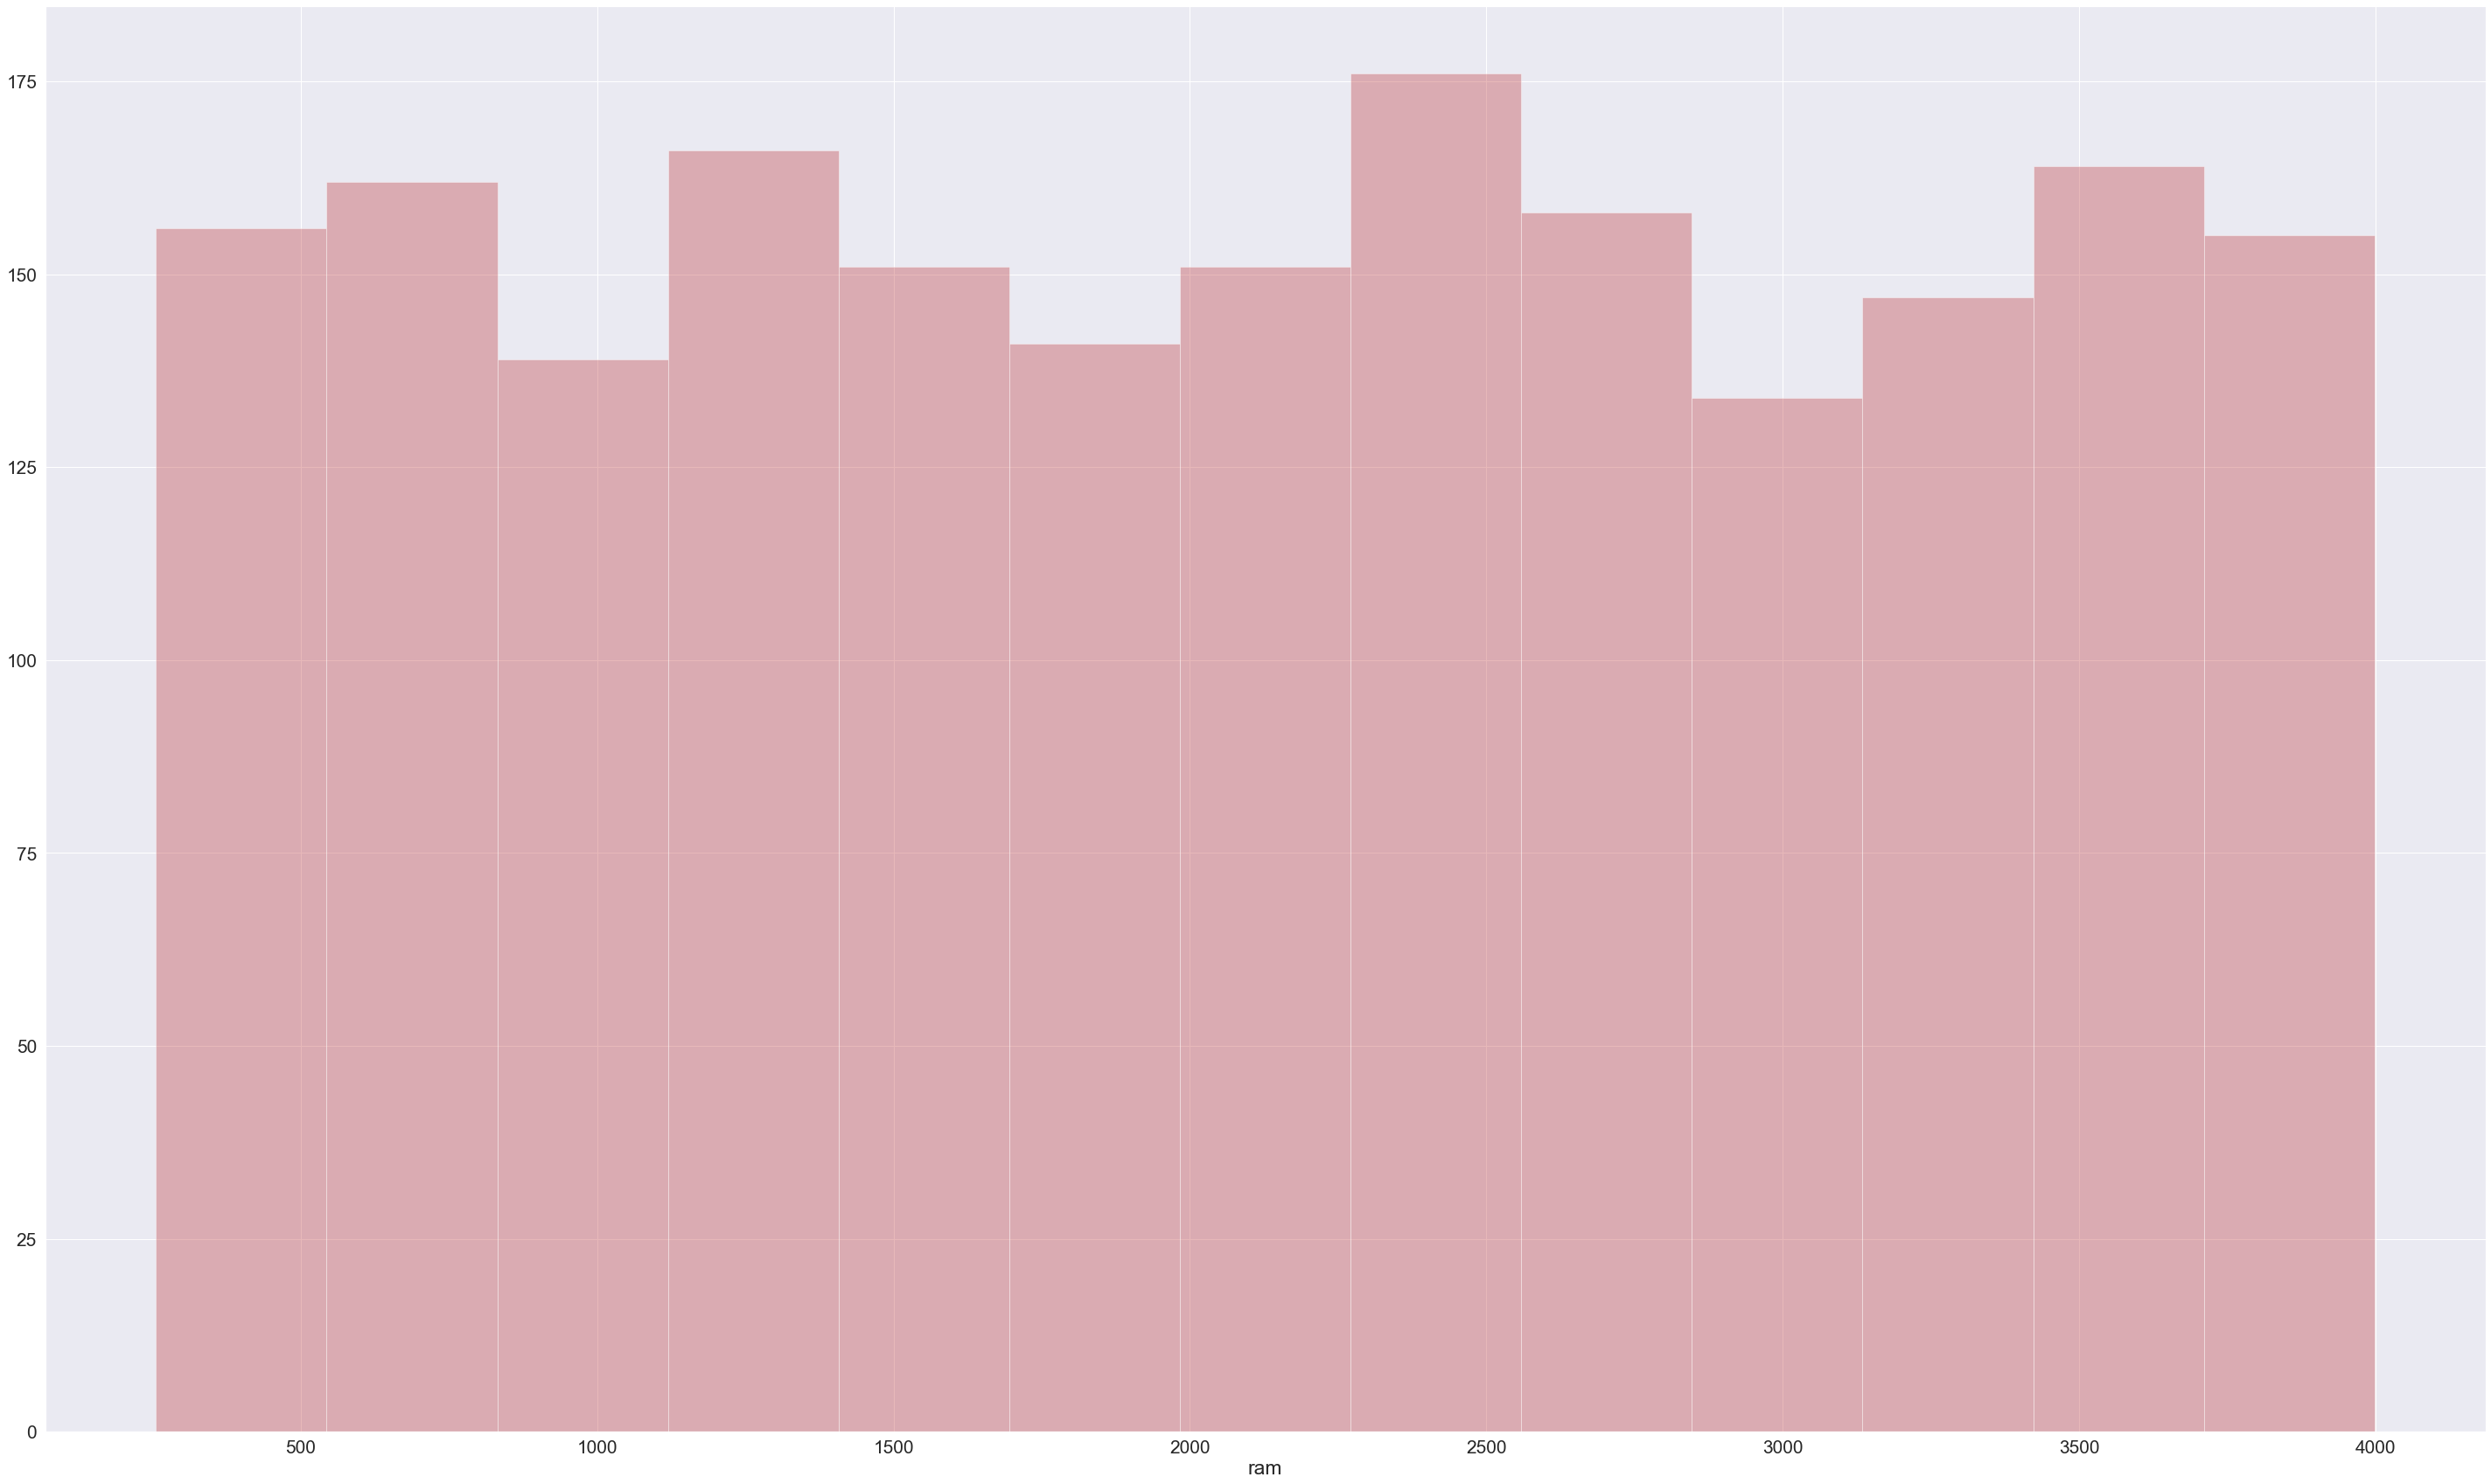

In [49]:
# identify The ram distribution 
sns.distplot(df["ram"] , kde=False , color="r")

<AxesSubplot:xlabel='ram', ylabel='Density'>

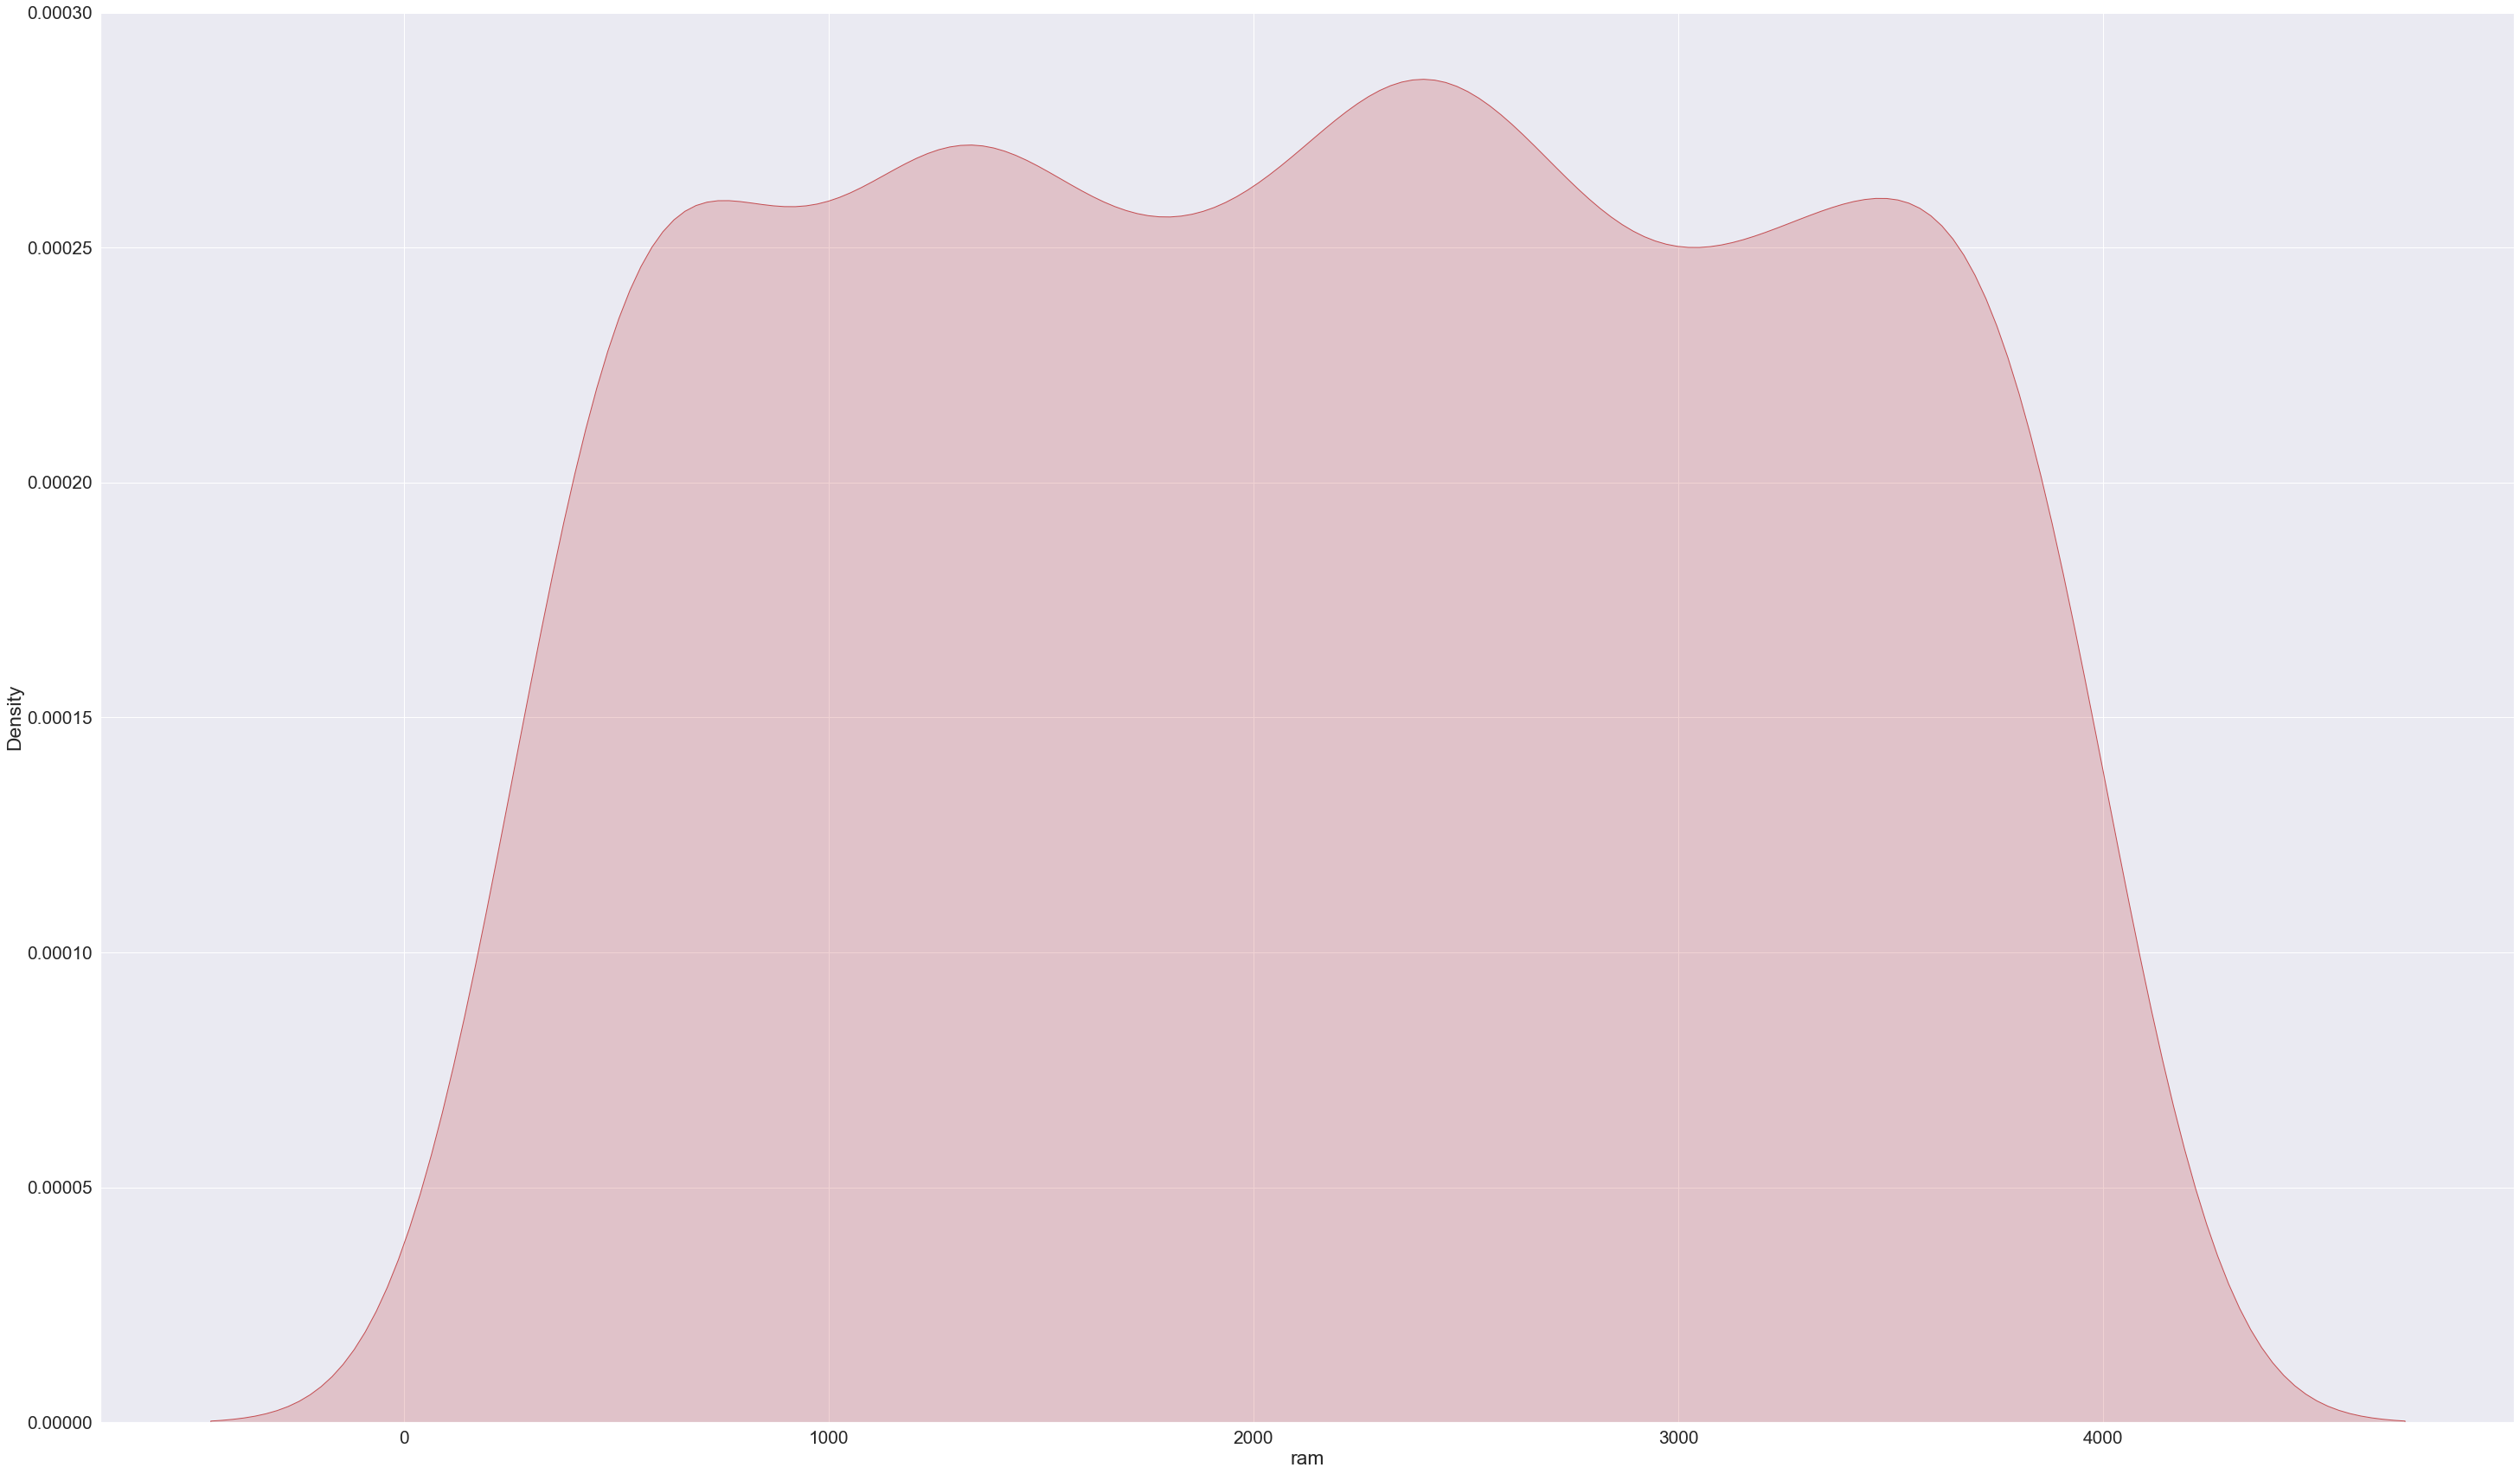

In [50]:
sns.kdeplot(df["ram"] , shade=True , color="r")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:xlabel='int_memory', ylabel='battery_power'>

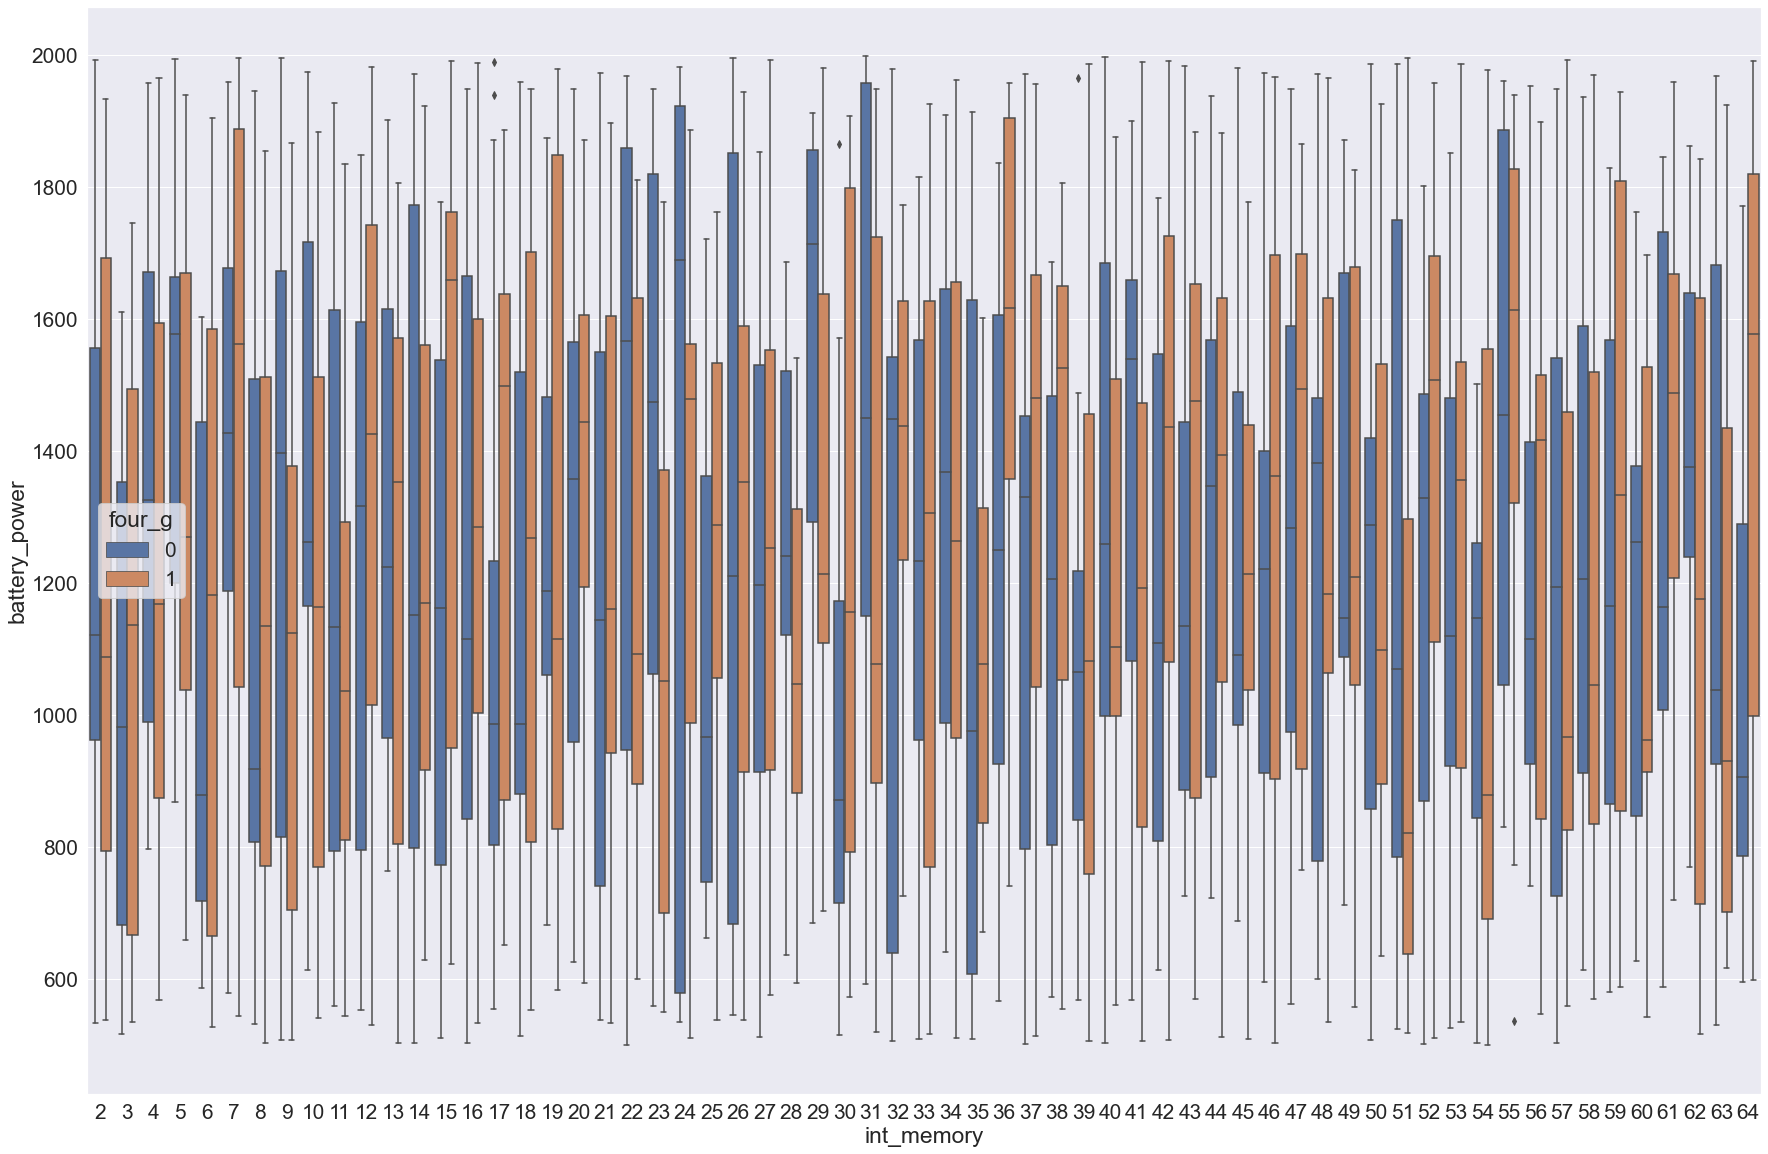

In [52]:
sns.set( rc = {"figure.figsize" : [30 , 20]} , font_scale=1.9)
sns.boxplot(y = "battery_power" , x = "int_memory" ,  hue = "four_g" , data = df)

<AxesSubplot:xlabel='m_dep', ylabel='int_memory'>

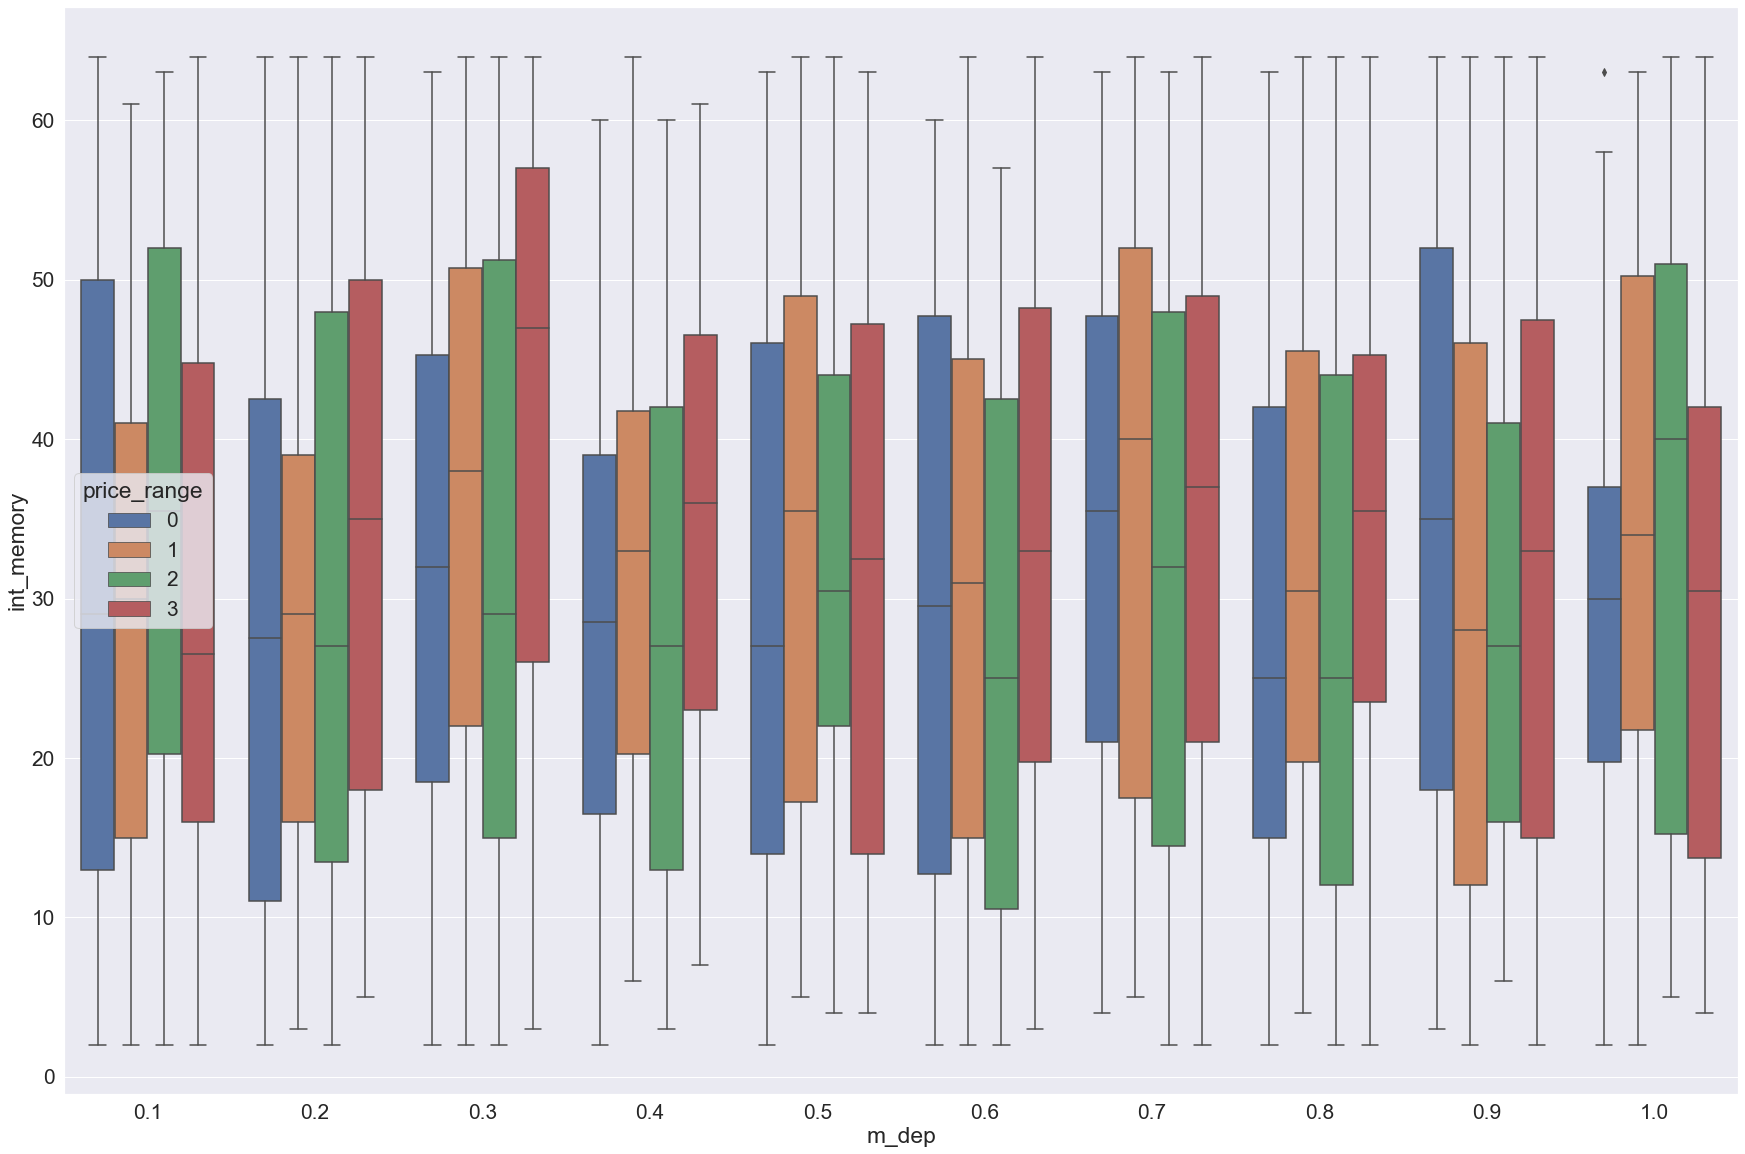

In [53]:
sns.boxplot(y = "int_memory" , x = "m_dep" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='n_cores', ylabel='int_memory'>

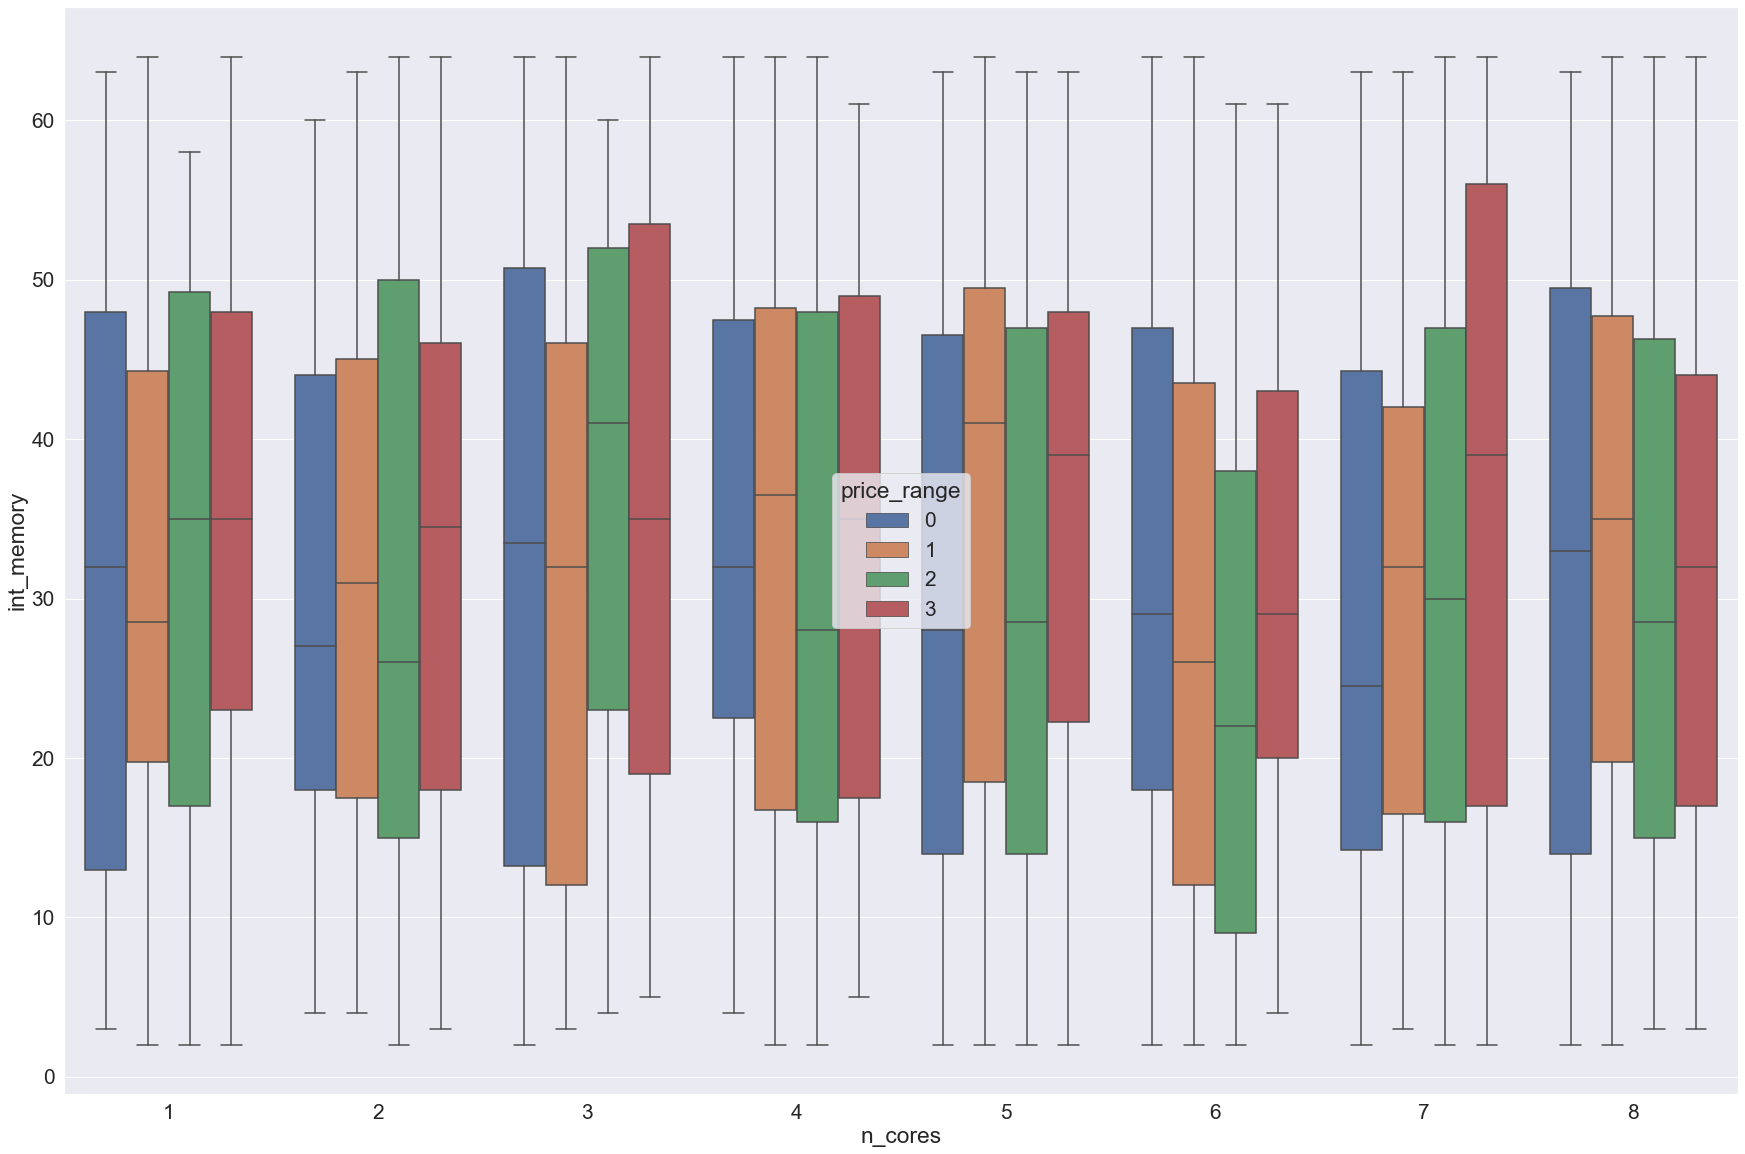

In [54]:
sns.boxplot(y = "int_memory" , x = "n_cores" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='talk_time', ylabel='int_memory'>

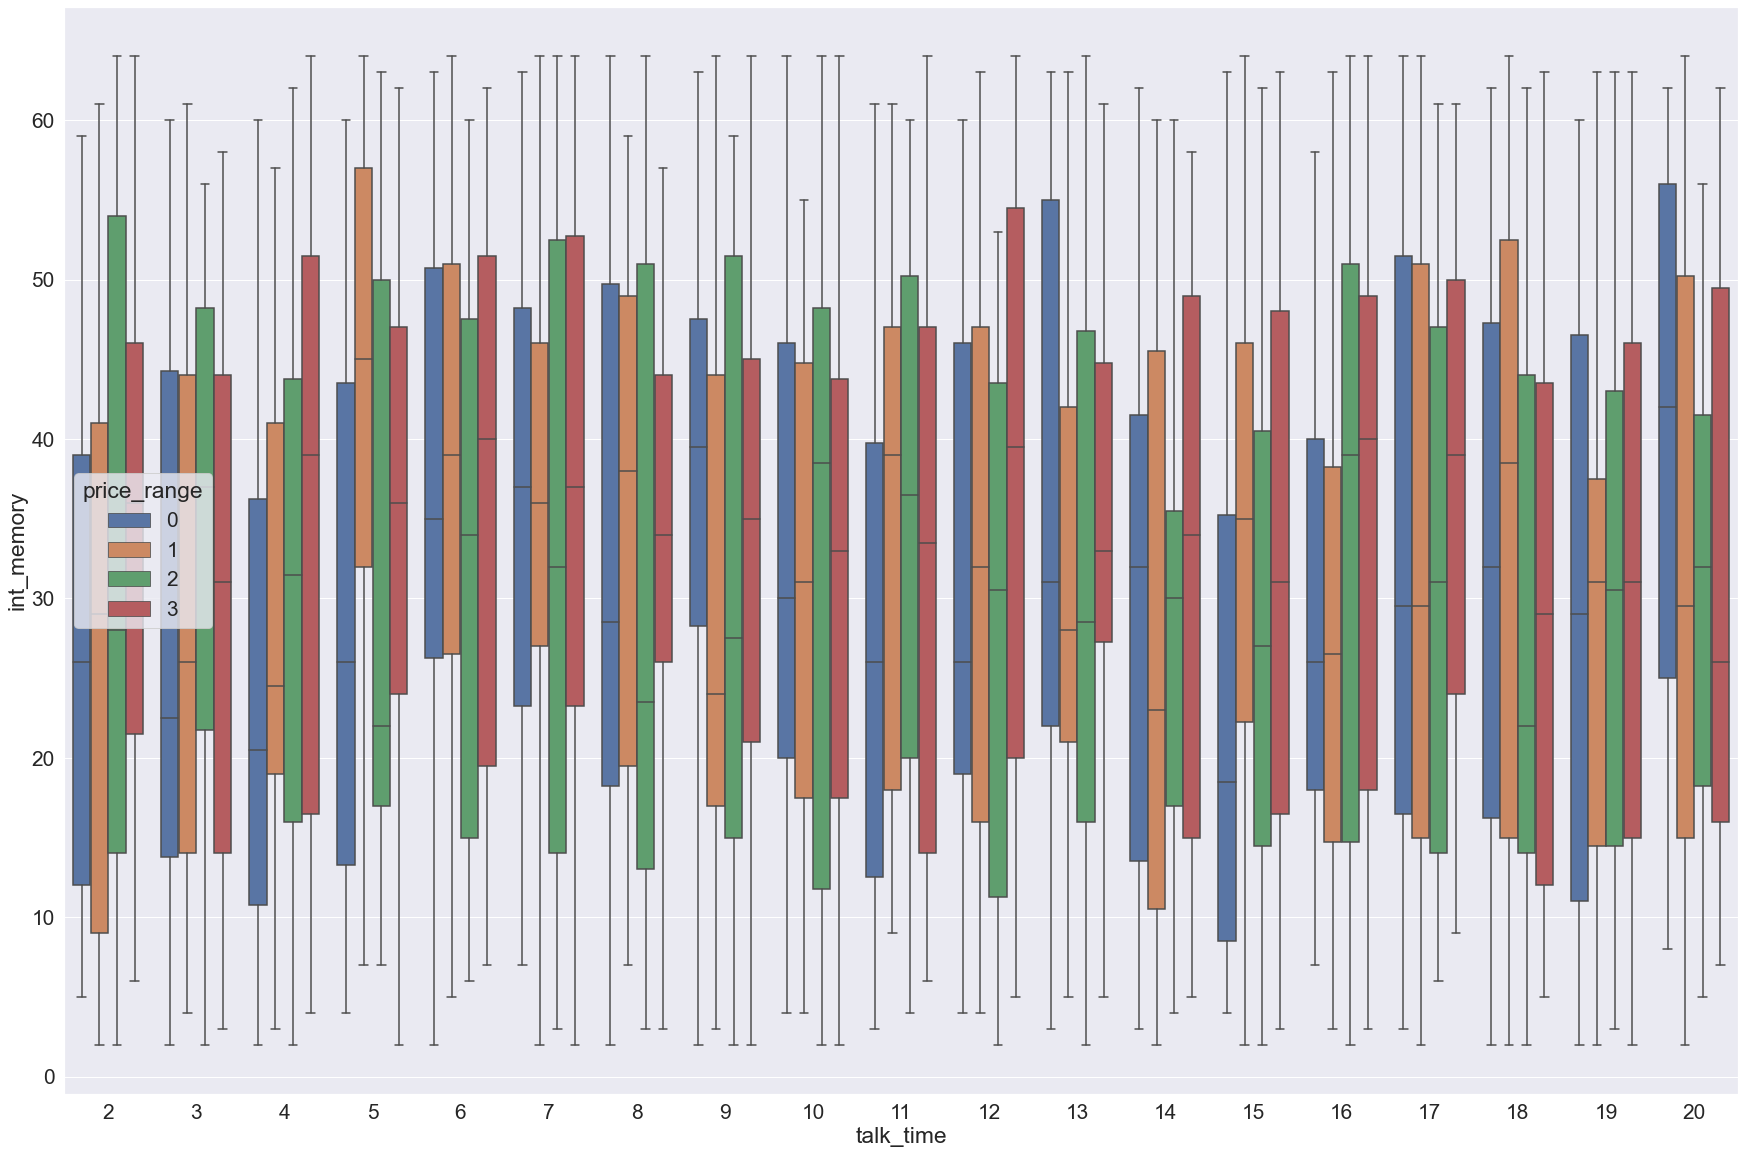

In [55]:
sns.boxplot(y = "int_memory" , x = "talk_time" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='clock_speed', ylabel='int_memory'>

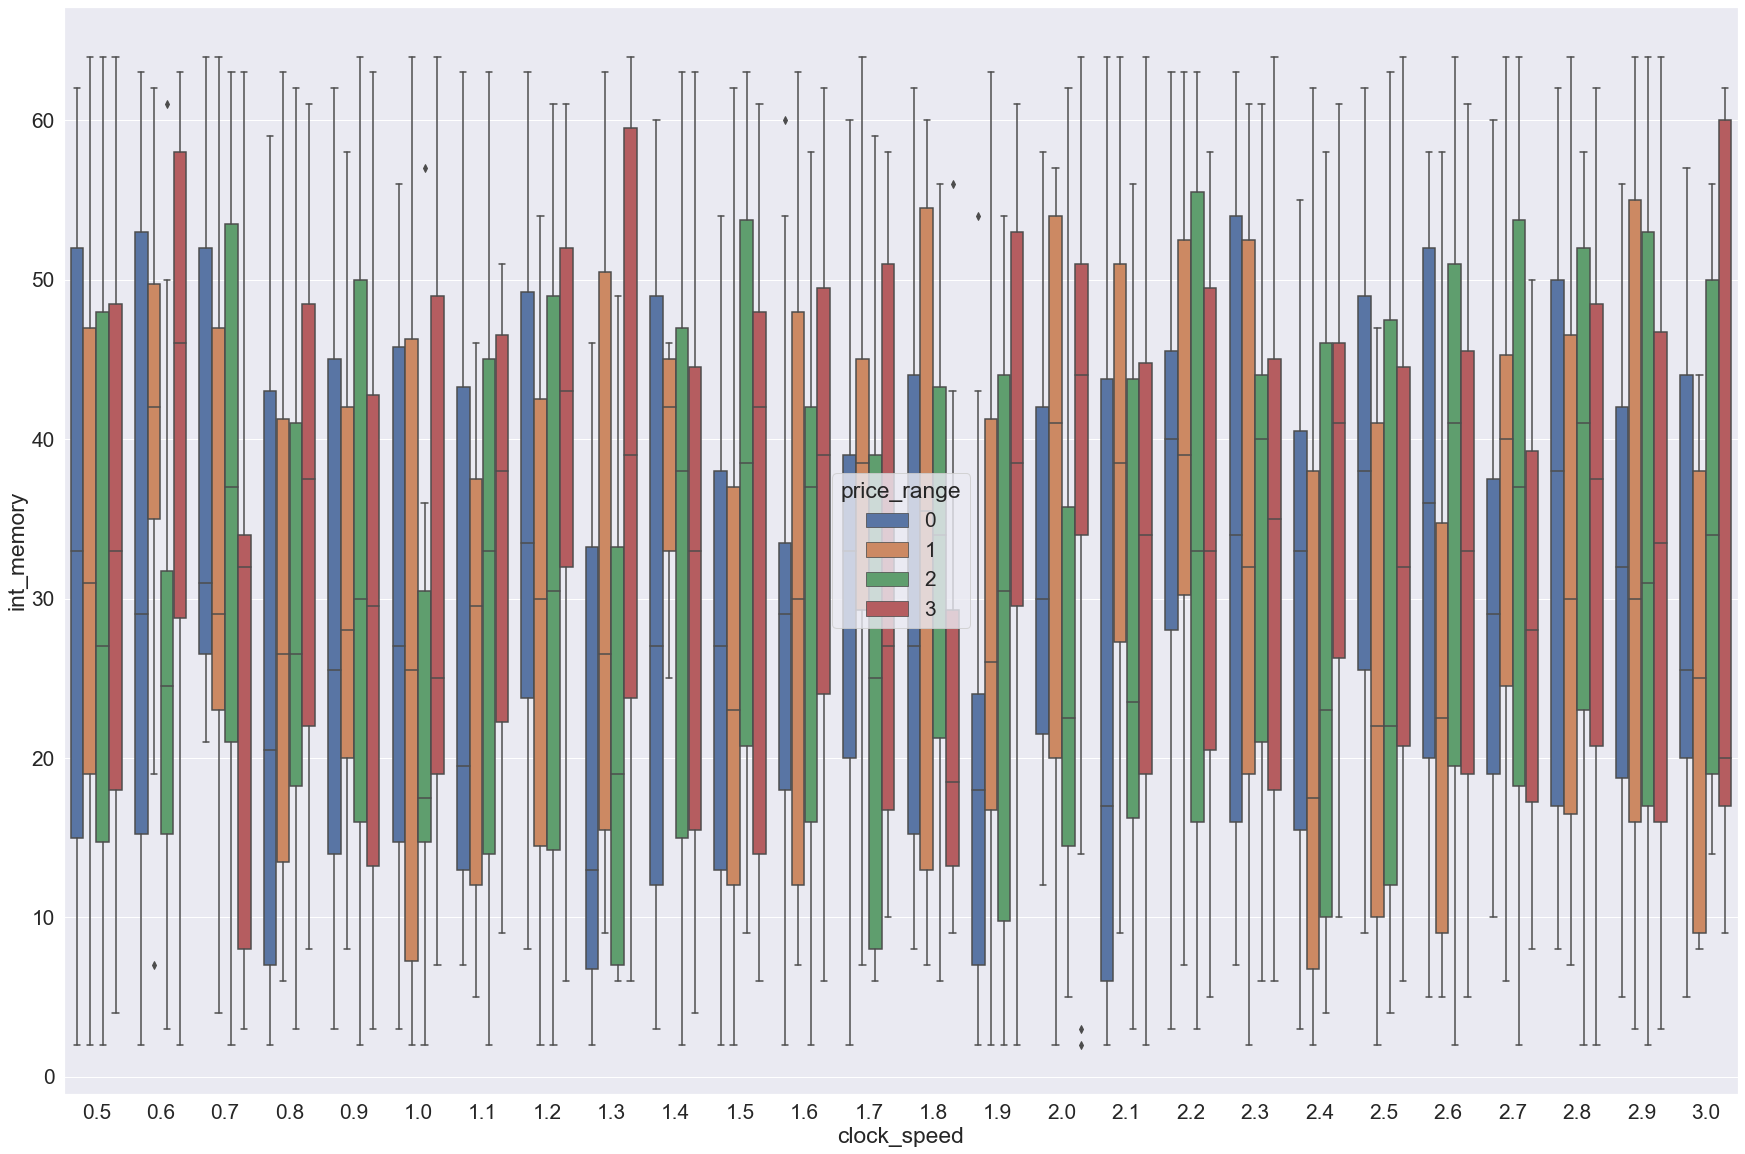

In [56]:
sns.boxplot(y = "int_memory" , x = "clock_speed" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='four_g', ylabel='int_memory'>

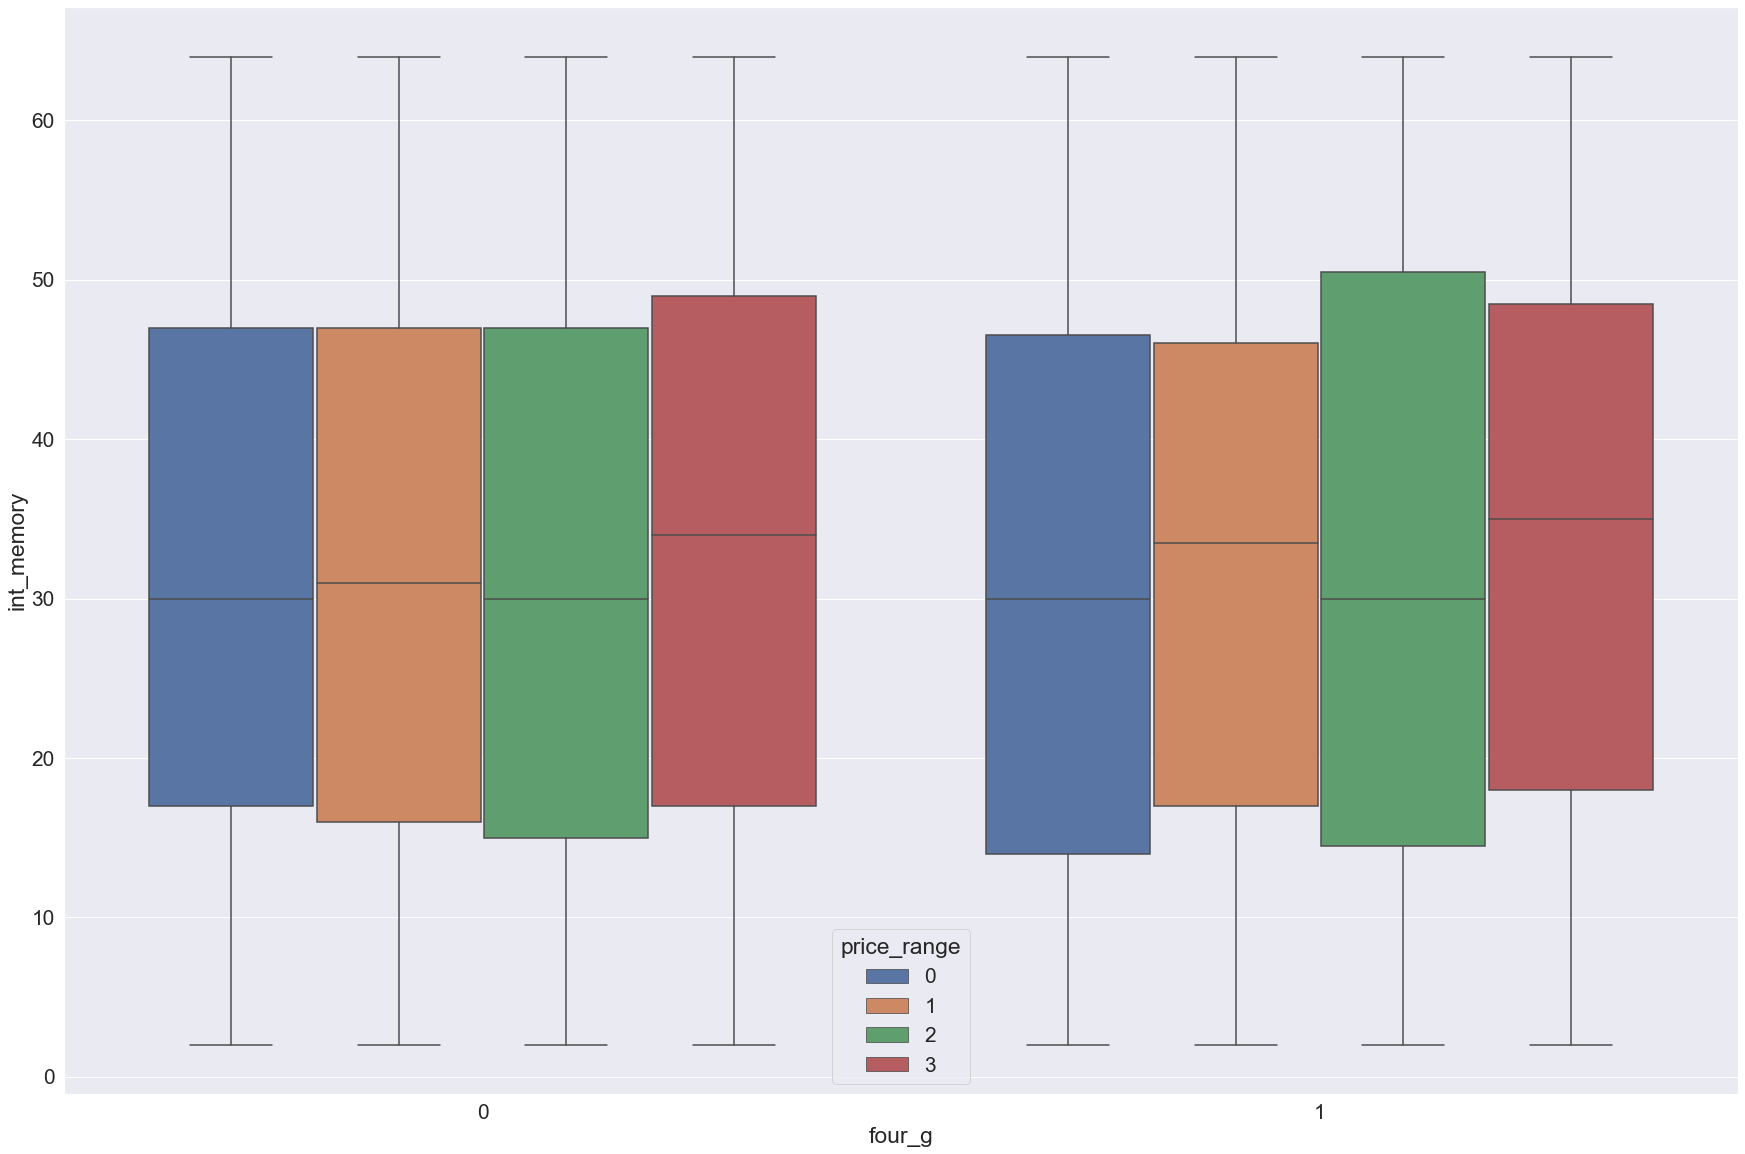

In [57]:
sns.boxplot(y = "int_memory" , x = "four_g" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='three_g', ylabel='int_memory'>

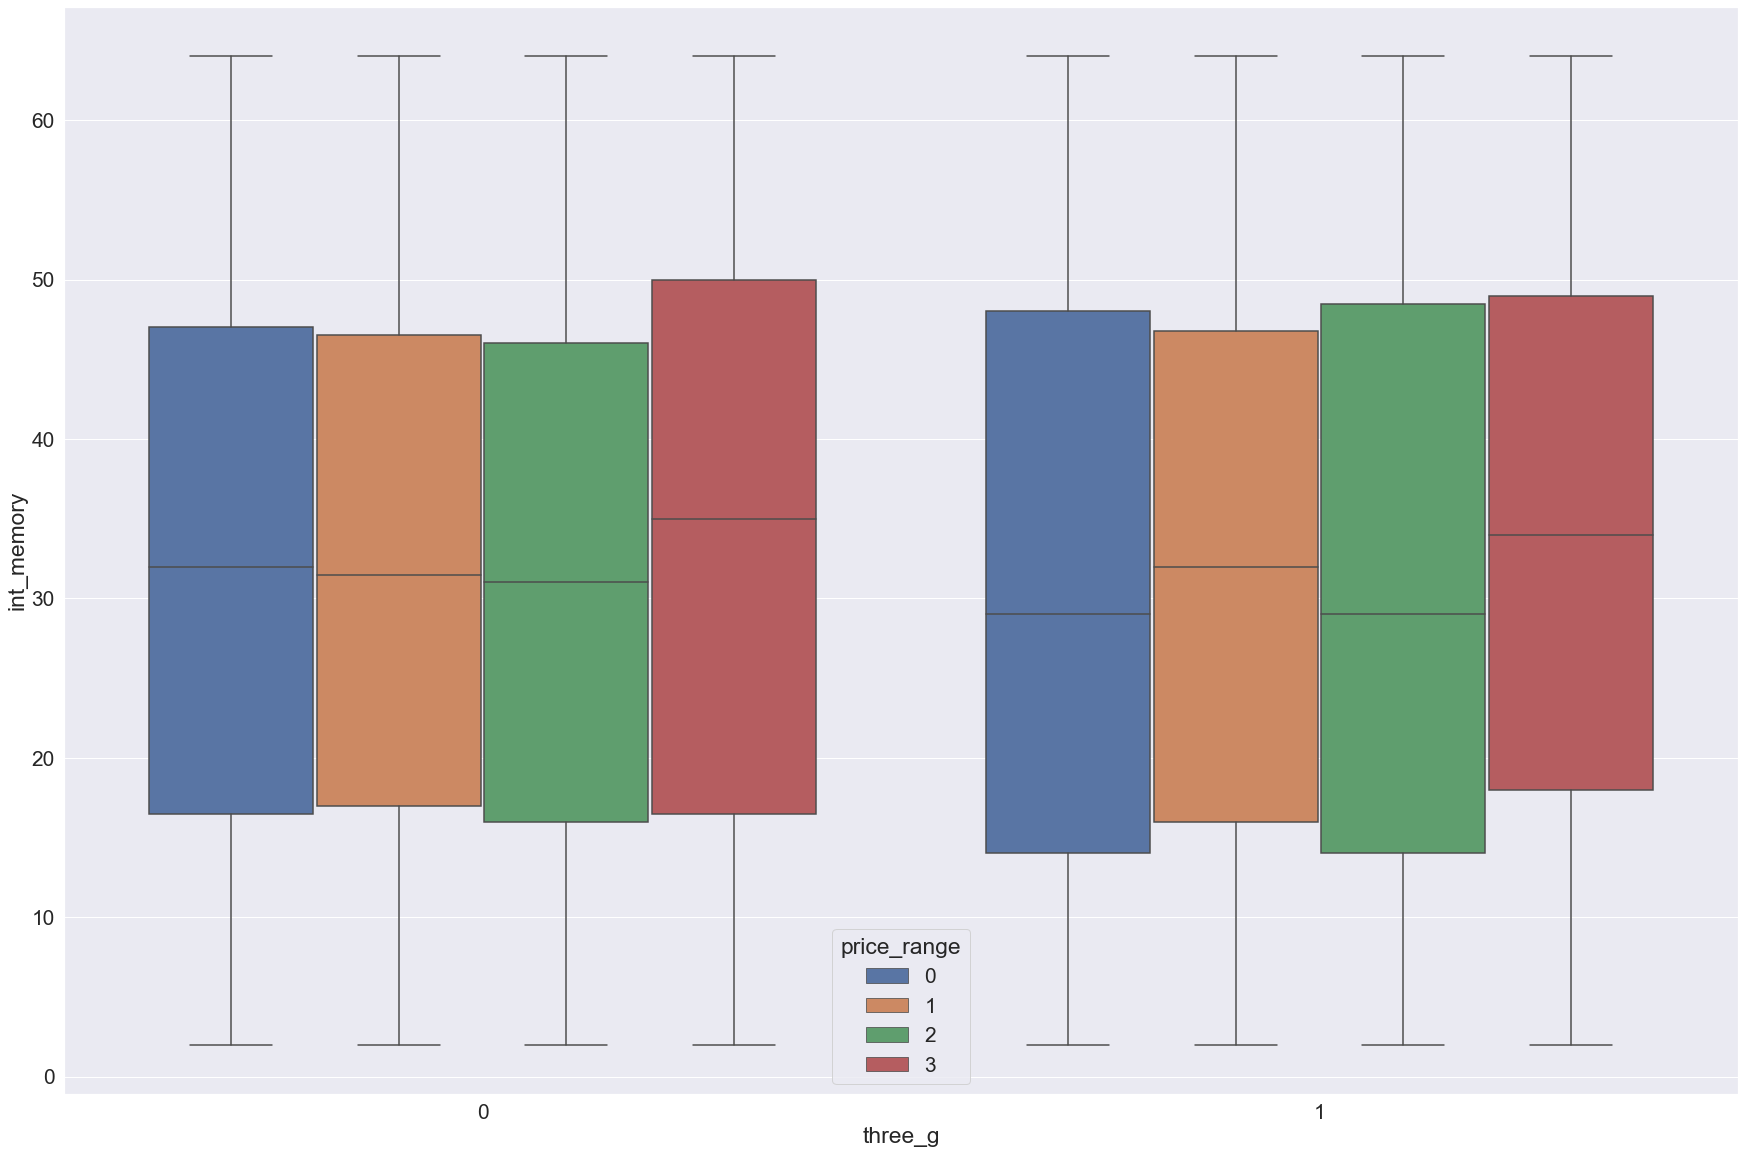

In [58]:
sns.boxplot(y = "int_memory" , x = "three_g" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='touch_screen', ylabel='int_memory'>

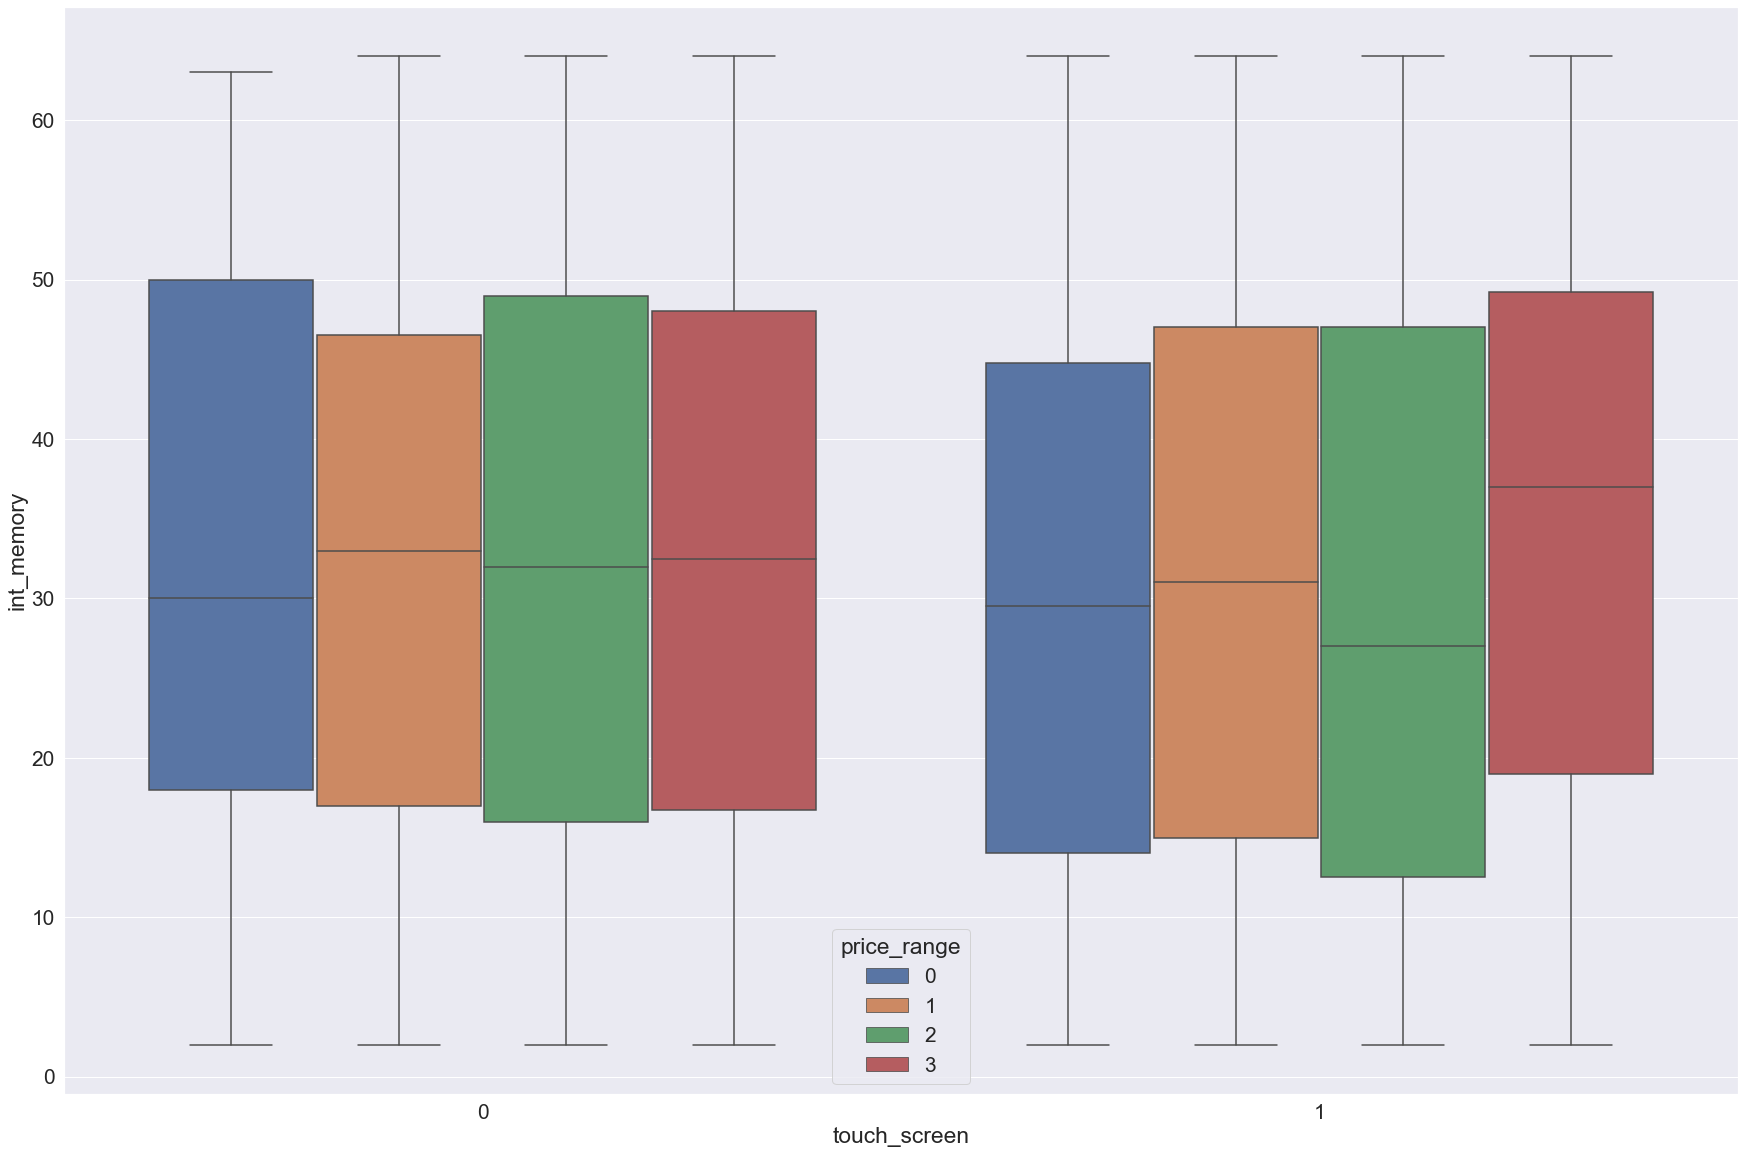

In [59]:
sns.boxplot(y = "int_memory" , x = "touch_screen" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='blue', ylabel='int_memory'>

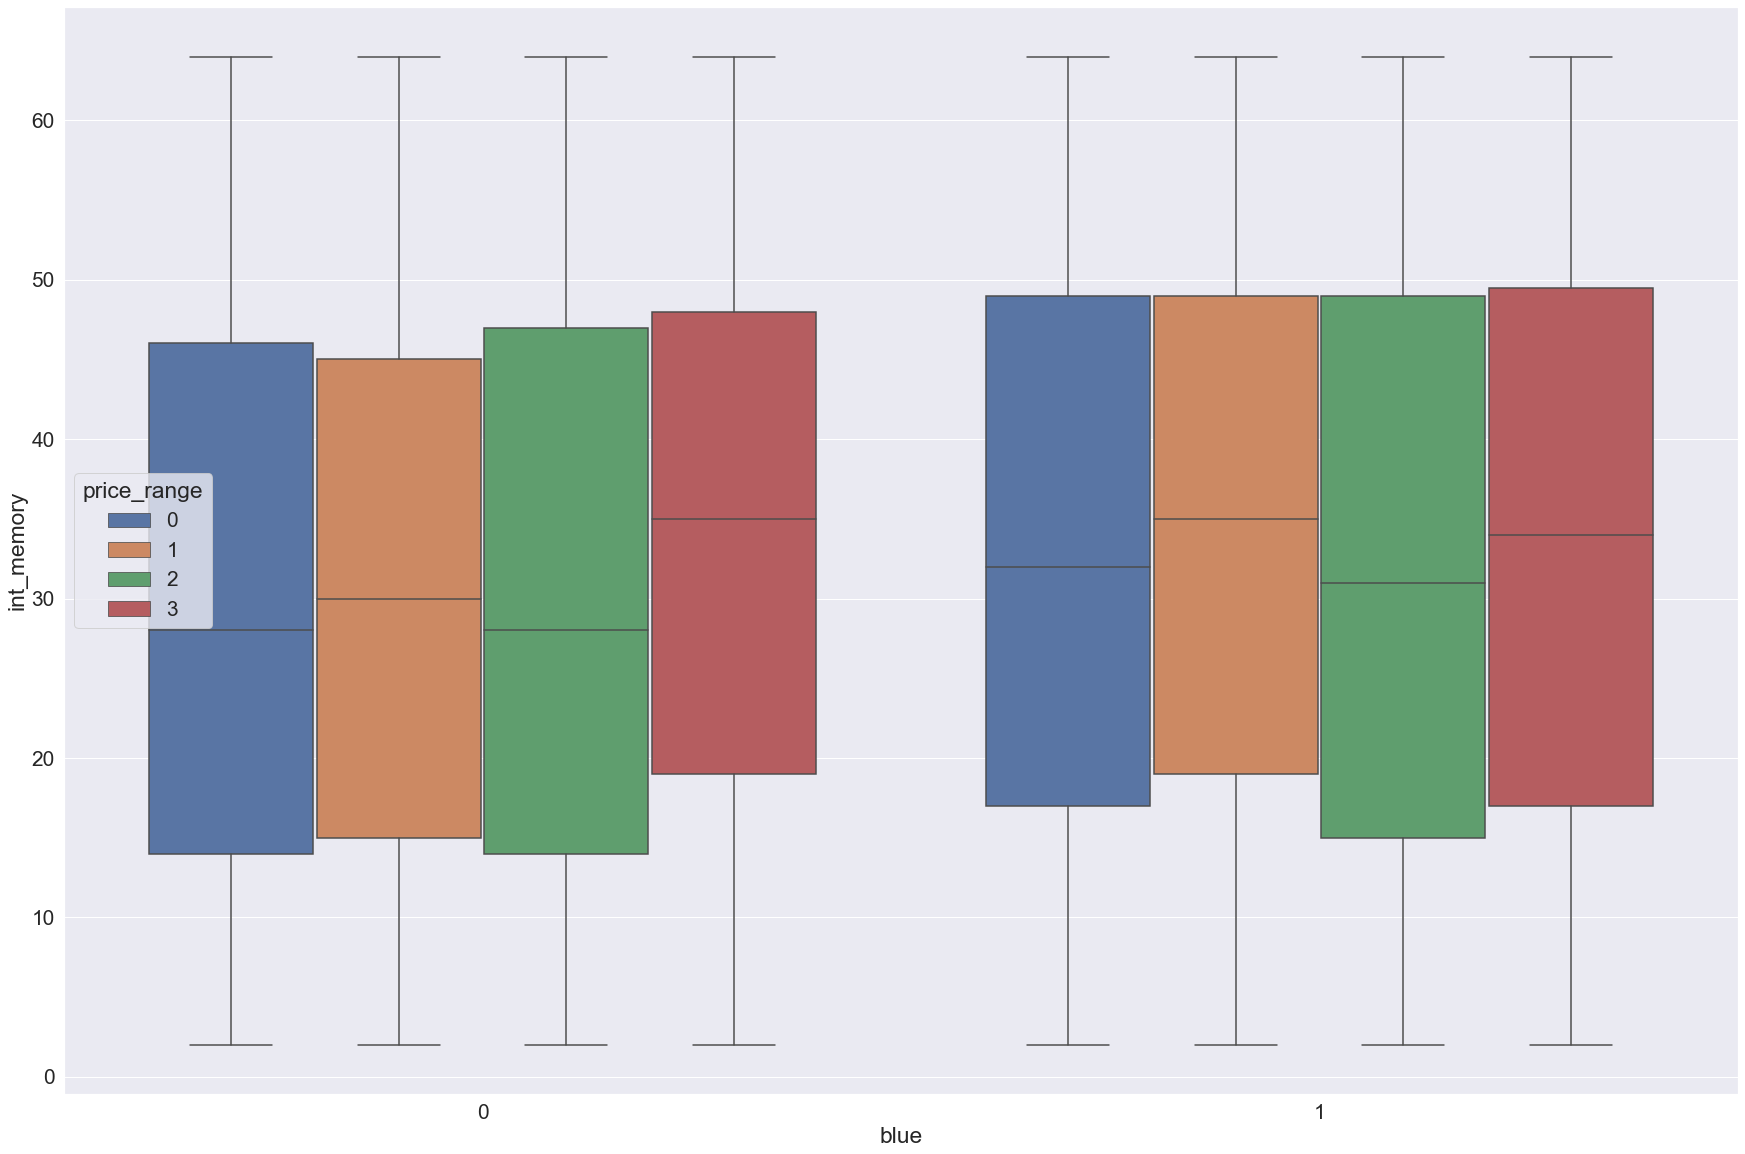

In [60]:
sns.boxplot(y = "int_memory" , x = "blue" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='clock_speed', ylabel='int_memory'>

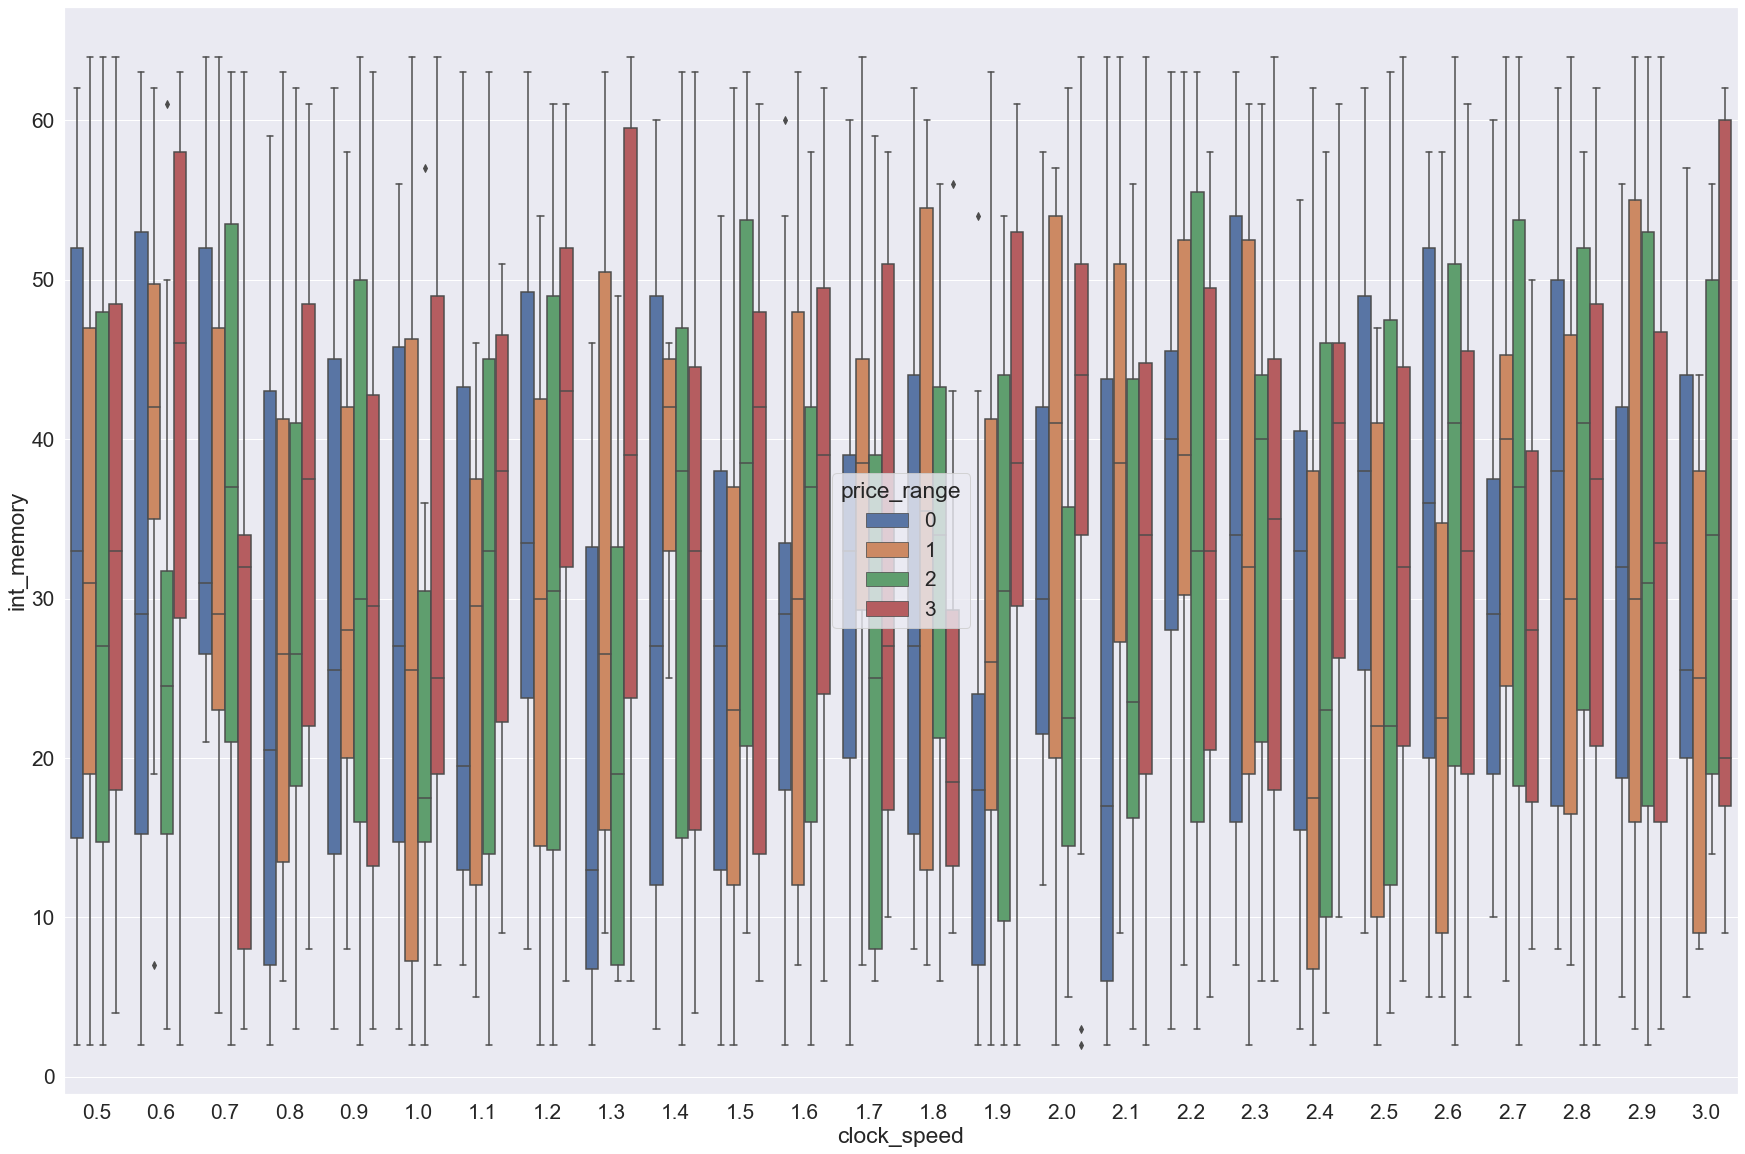

In [61]:
sns.boxplot(y = "int_memory" , x = "clock_speed" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='clock_speed', ylabel='int_memory'>

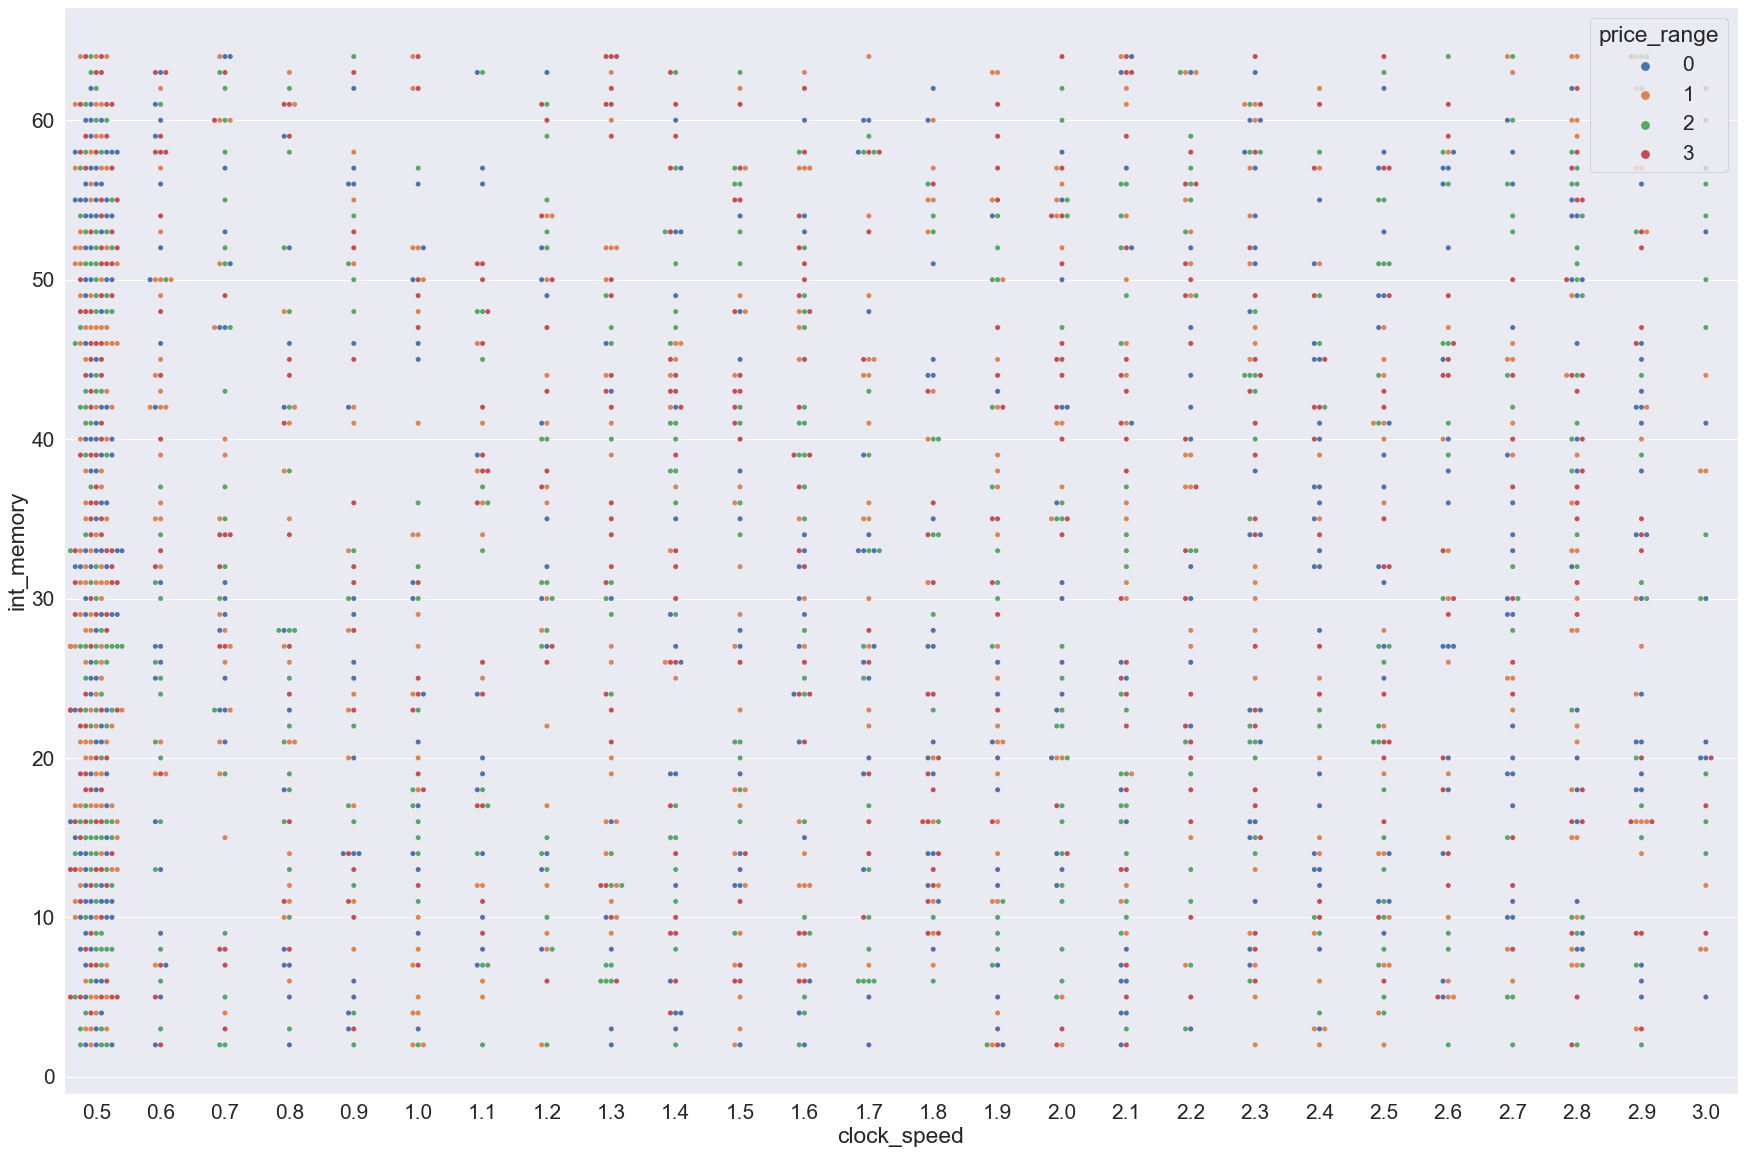

In [62]:
sns.swarmplot(y = "int_memory" , x = "clock_speed" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='blue', ylabel='int_memory'>

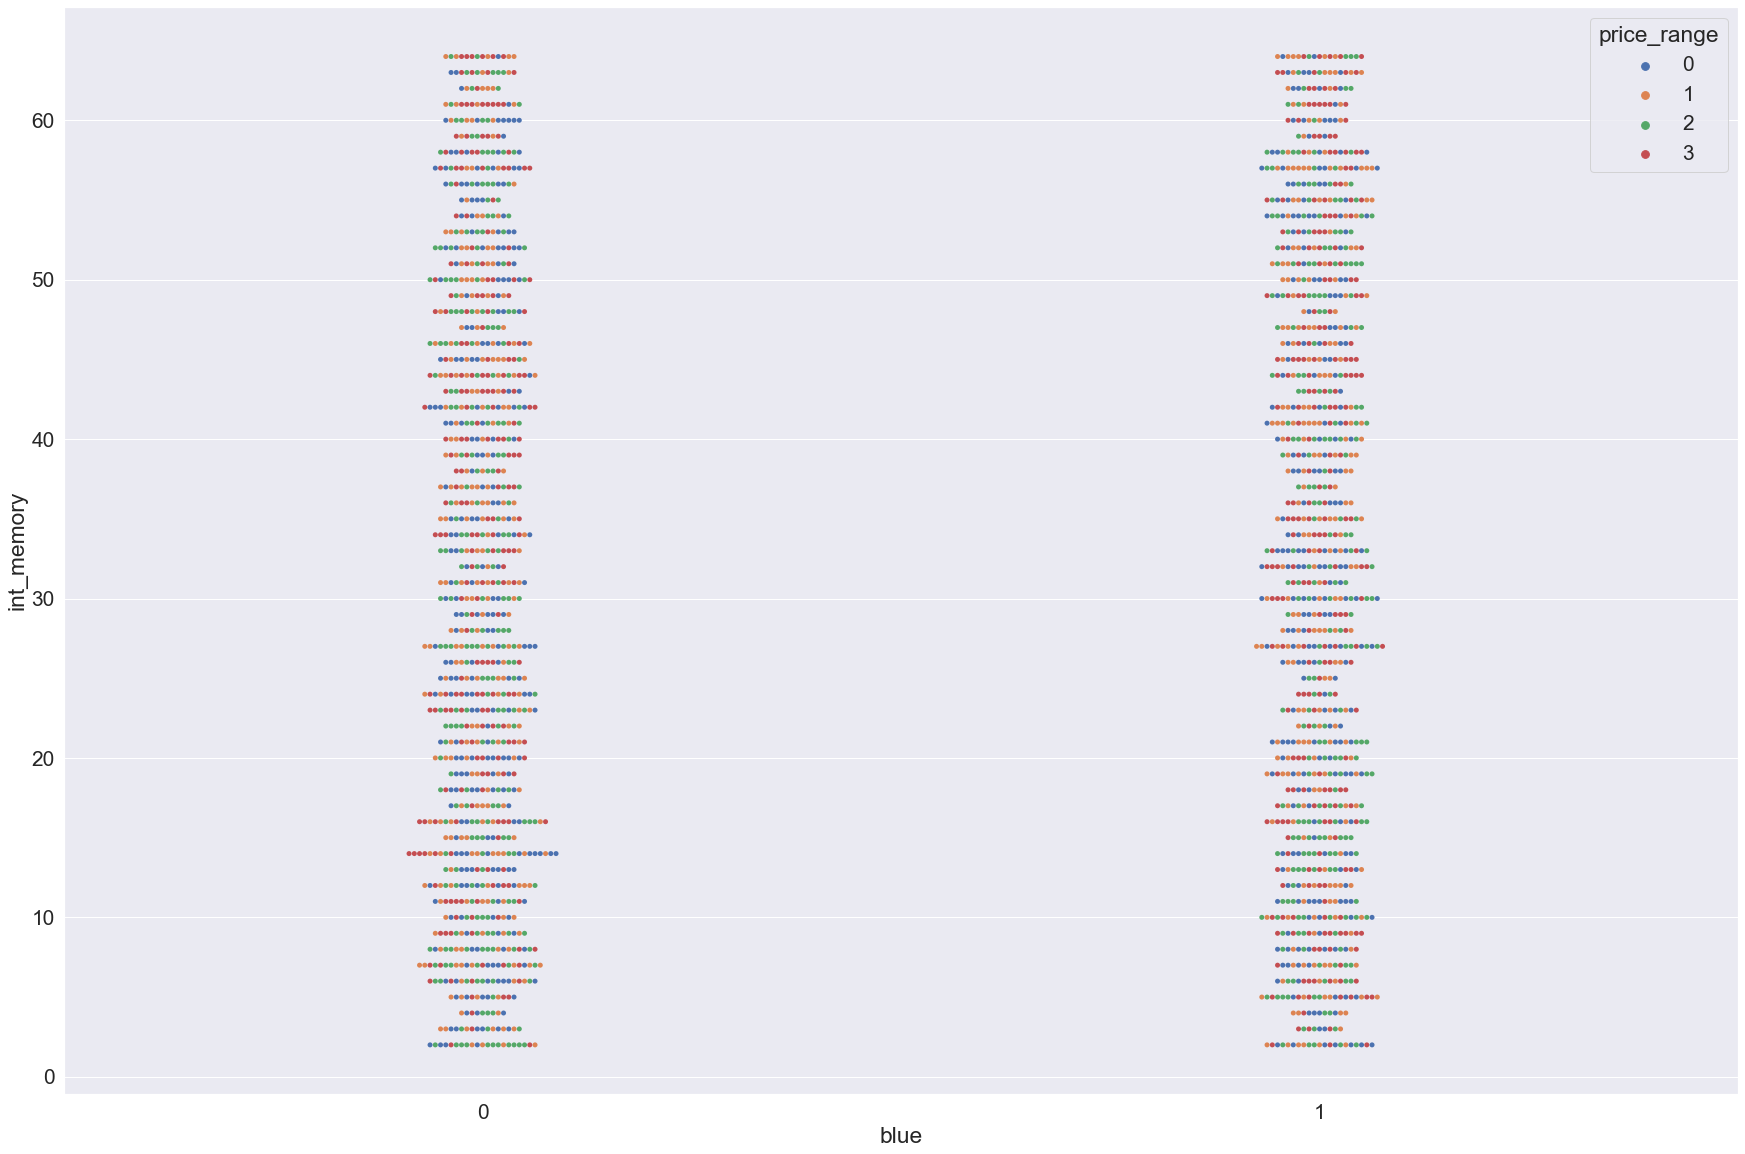

In [63]:
sns.swarmplot(y = "int_memory" , x = "blue" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='touch_screen', ylabel='int_memory'>

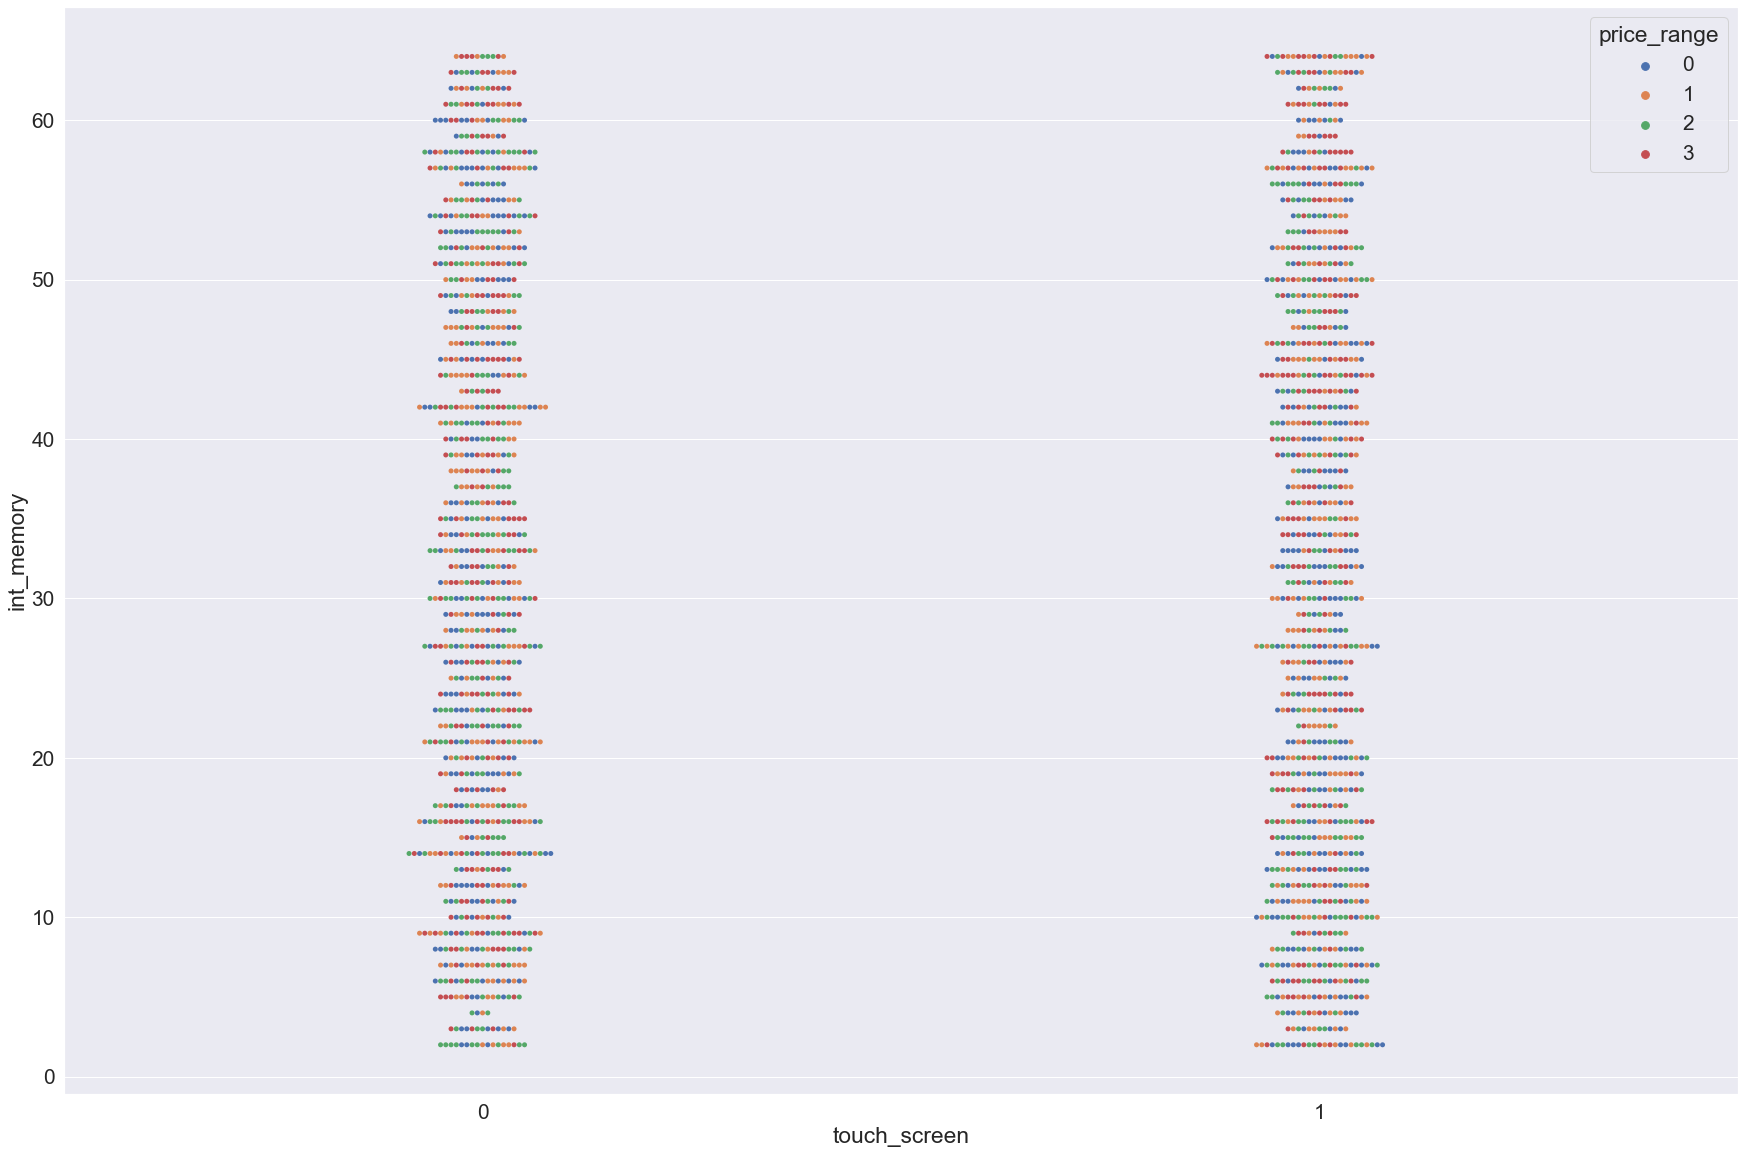

In [64]:
sns.swarmplot(y = "int_memory" , x = "touch_screen" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='three_g', ylabel='int_memory'>

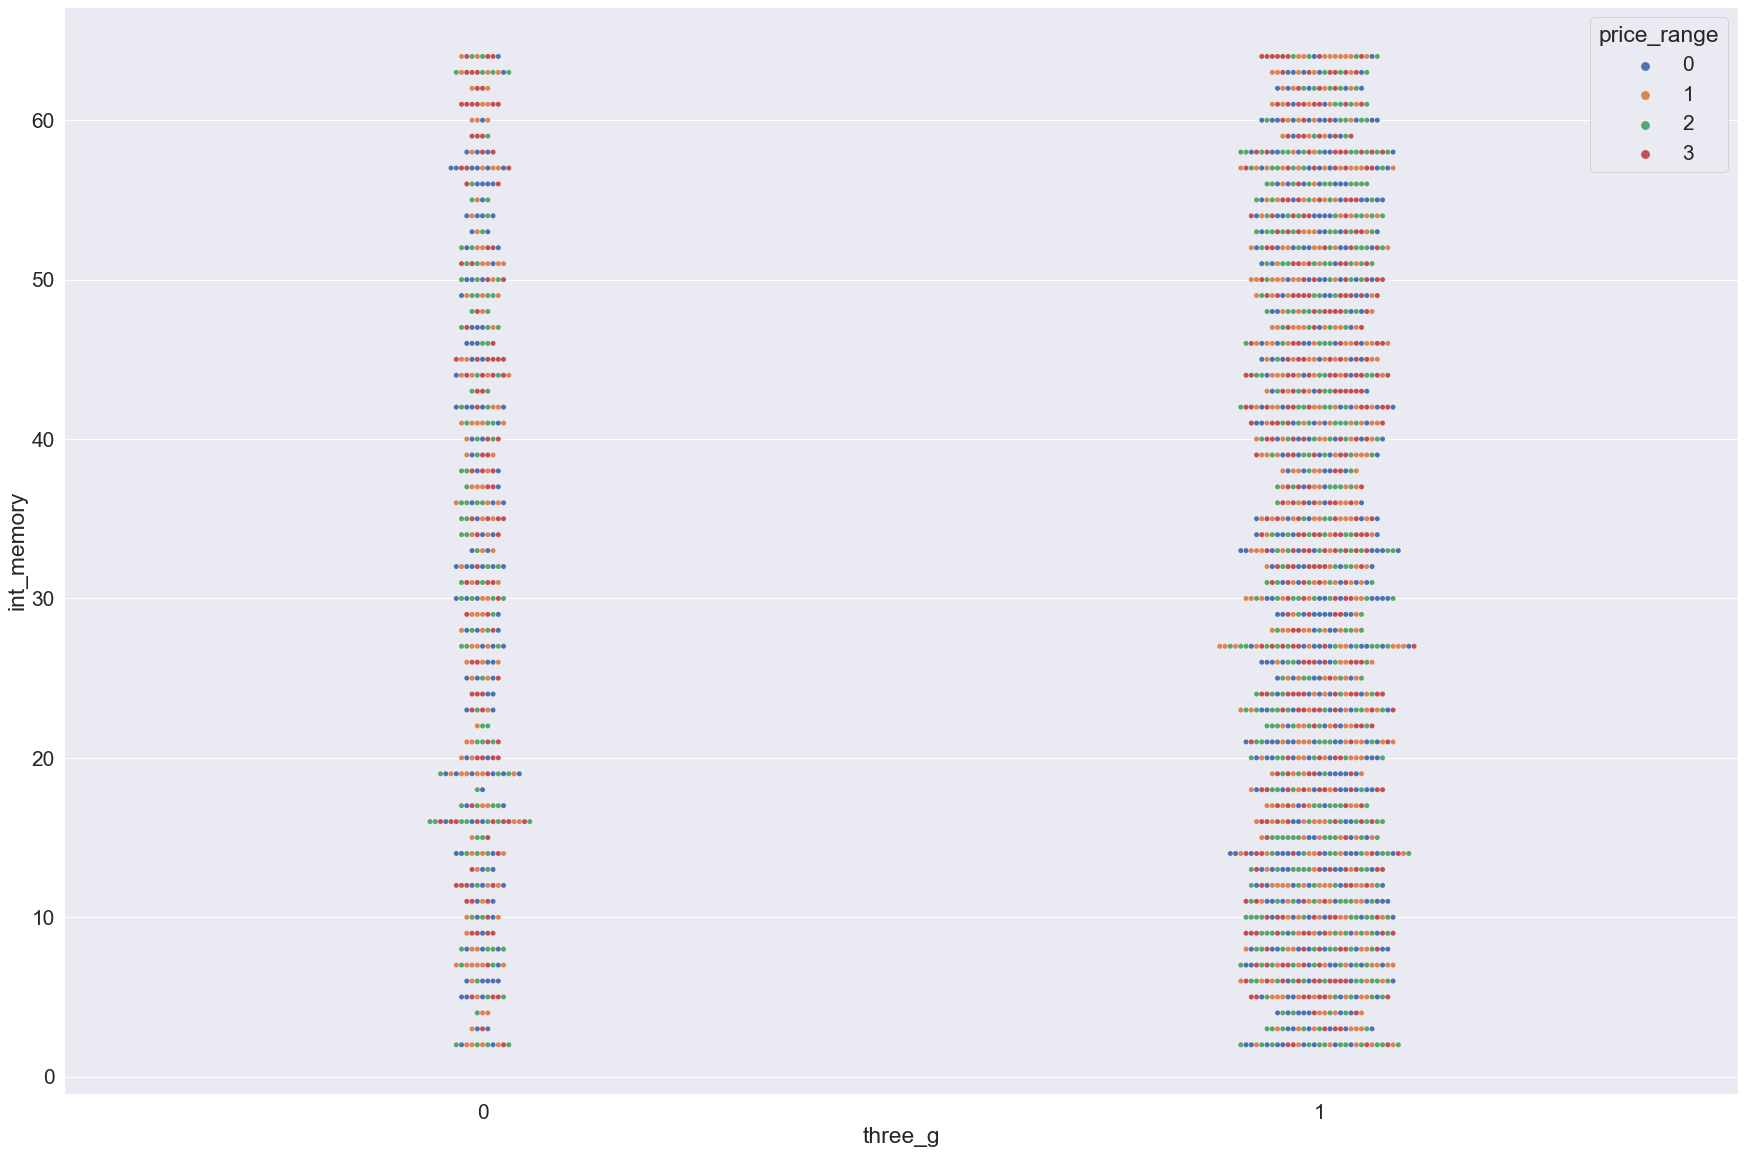

In [65]:
sns.swarmplot(y = "int_memory" , x = "three_g" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='four_g', ylabel='int_memory'>

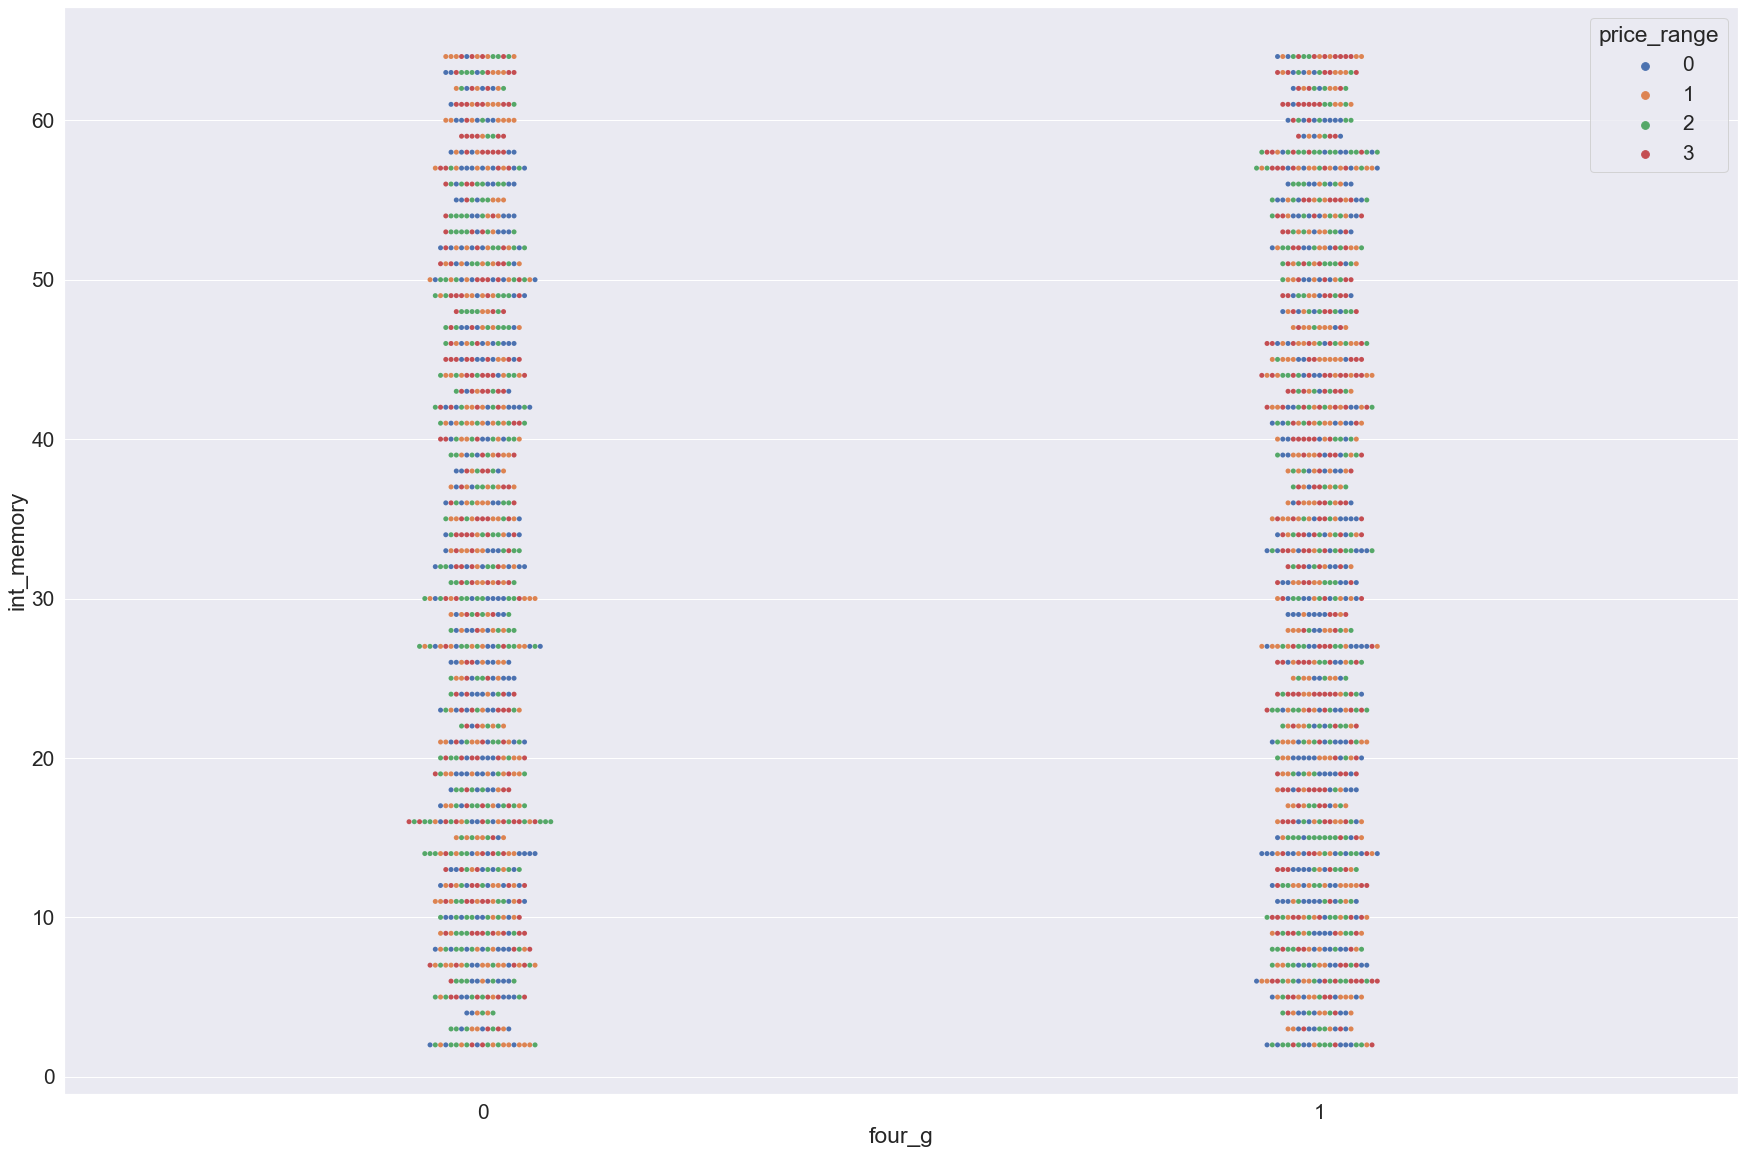

In [66]:
sns.swarmplot(y = "int_memory" , x = "four_g" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='n_cores', ylabel='int_memory'>

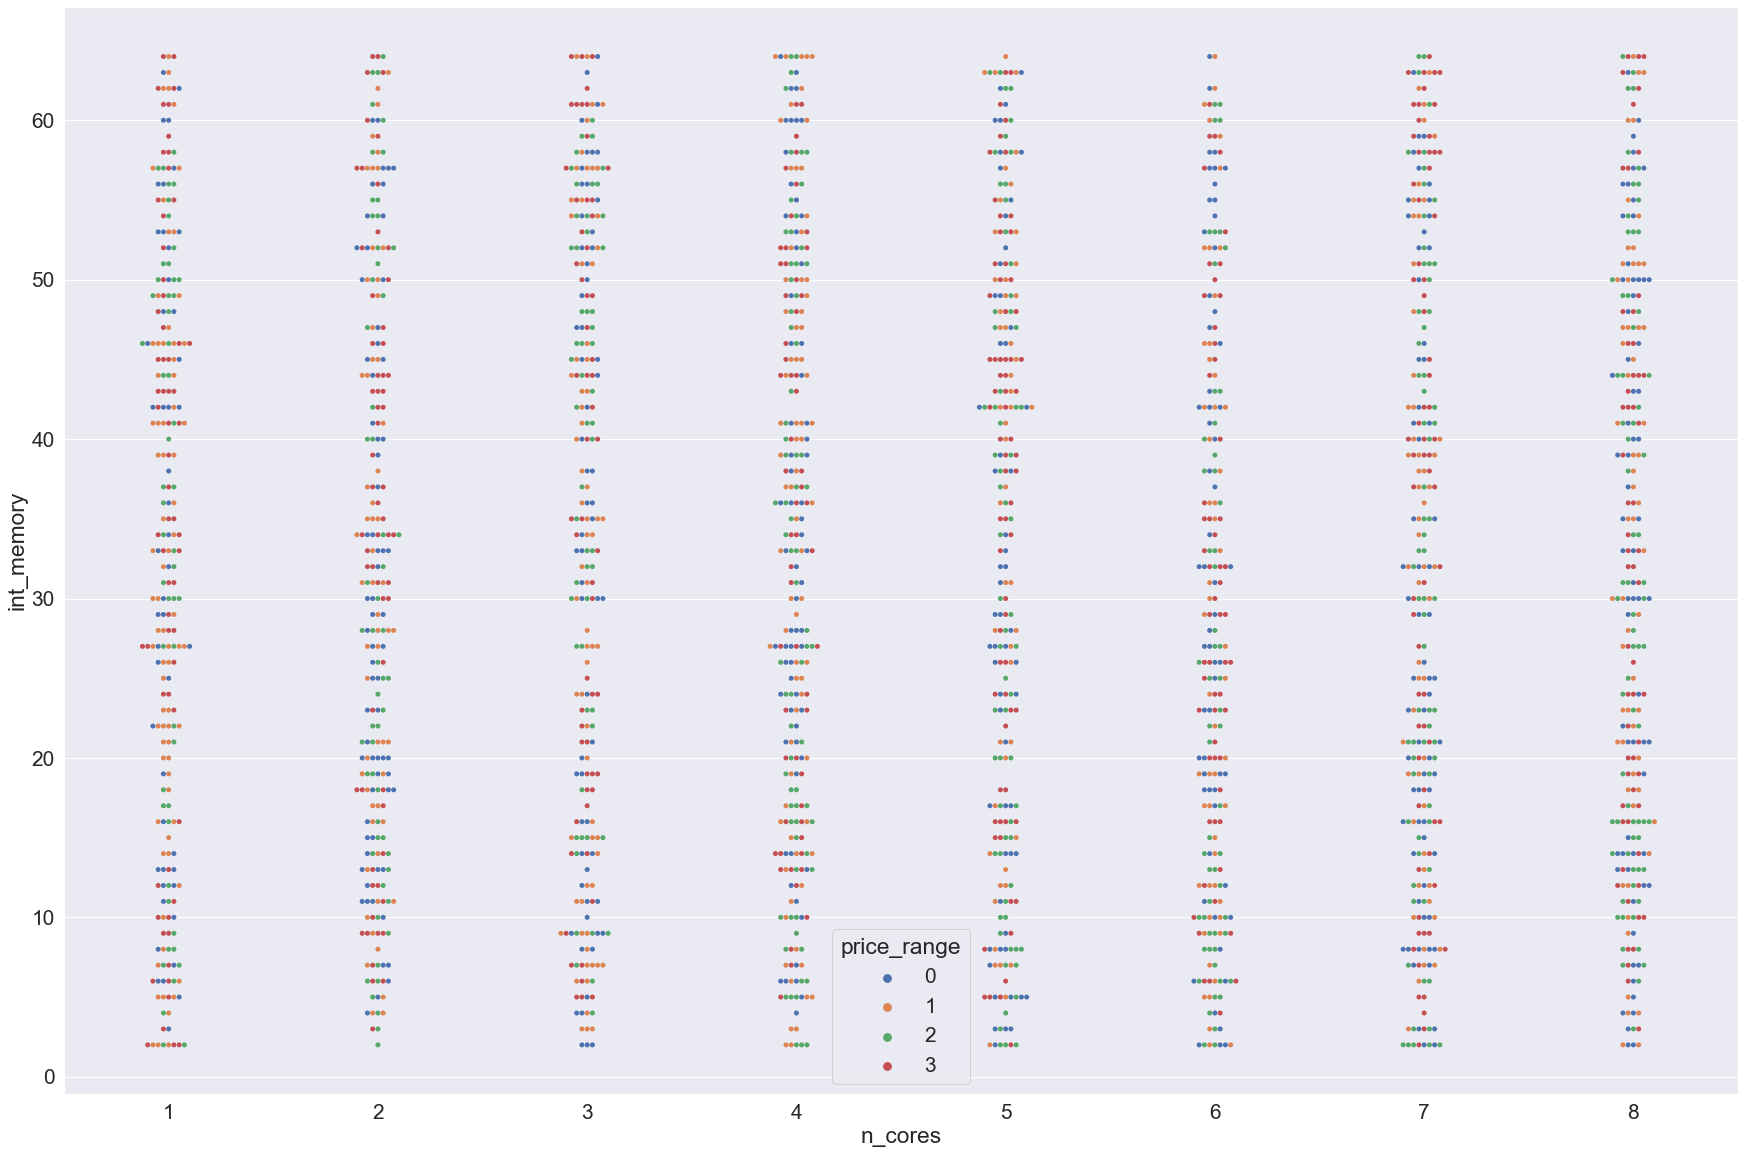

In [67]:
sns.swarmplot(y = "int_memory" , x = "n_cores" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='m_dep', ylabel='int_memory'>

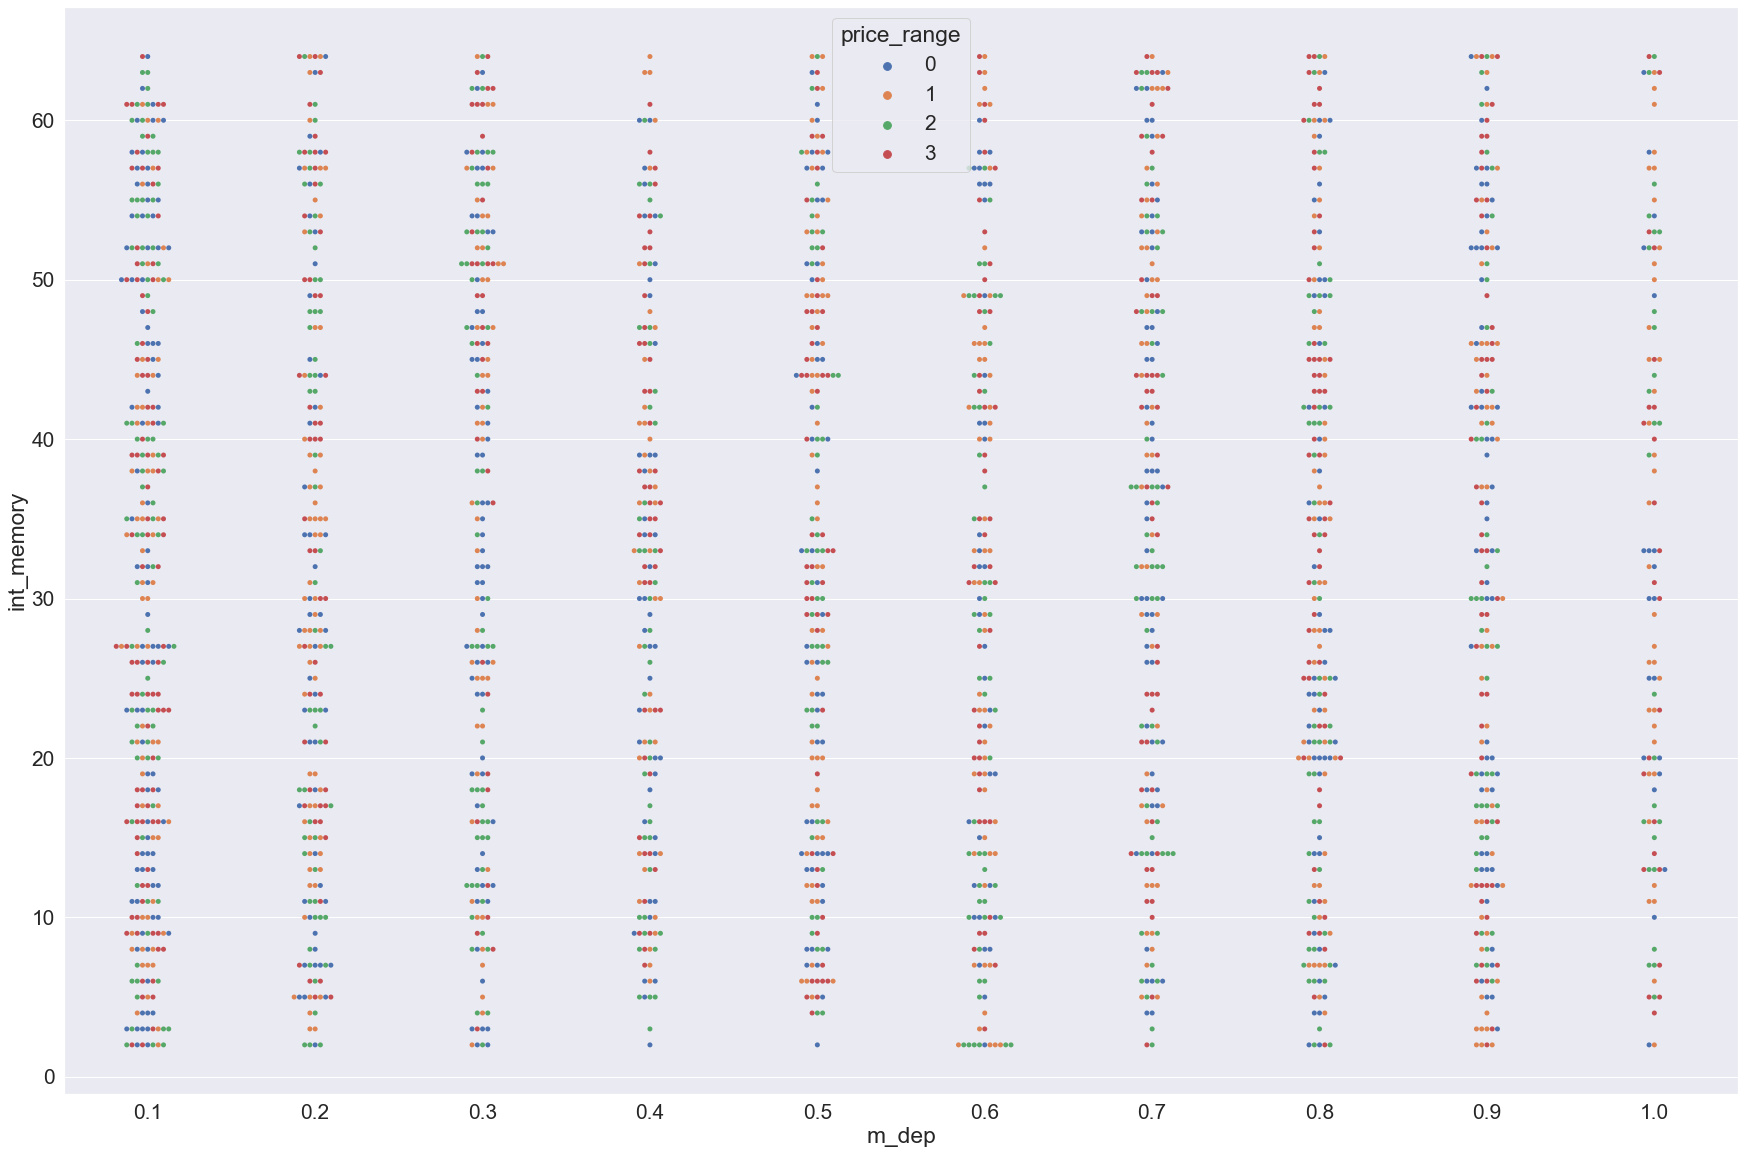

In [68]:
sns.swarmplot(y = "int_memory" , x = "m_dep" ,  hue = "price_range" , data = df)

<AxesSubplot:xlabel='four_g', ylabel='ram'>

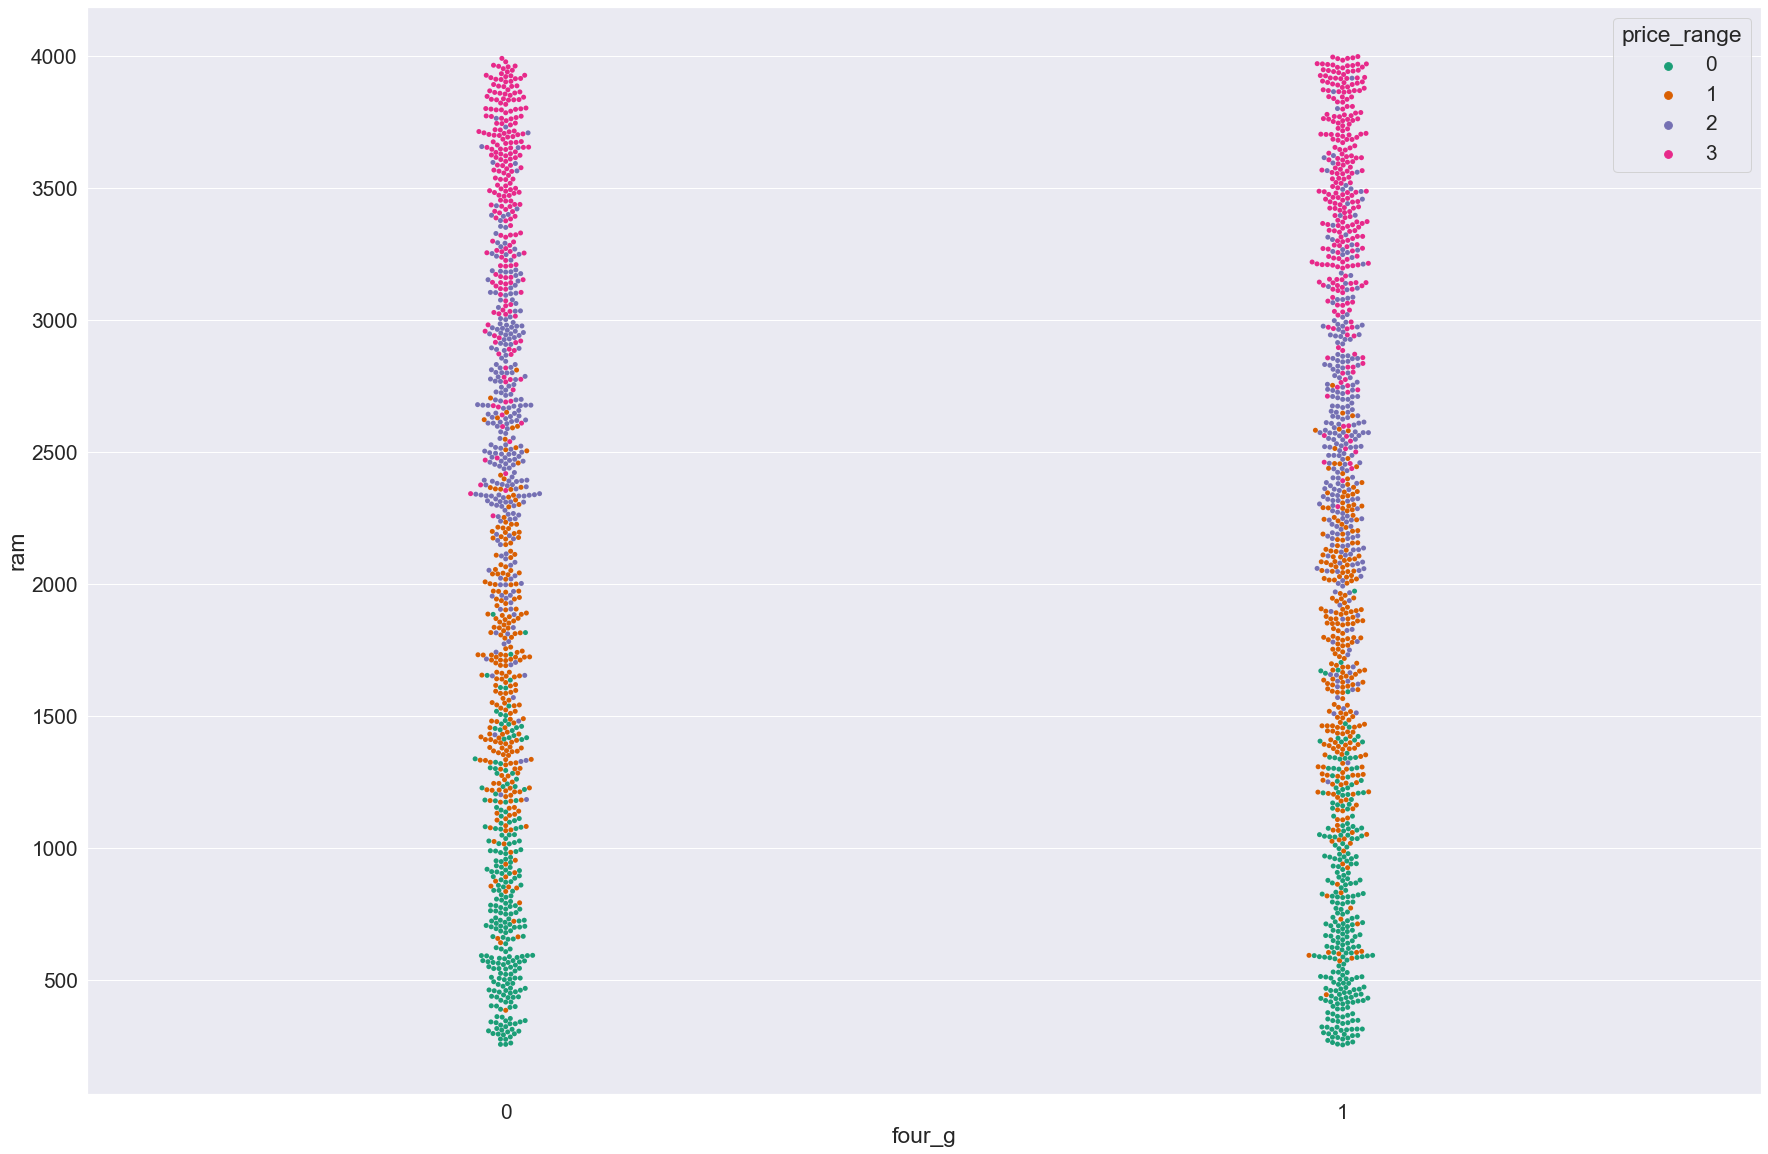

In [69]:
sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df)

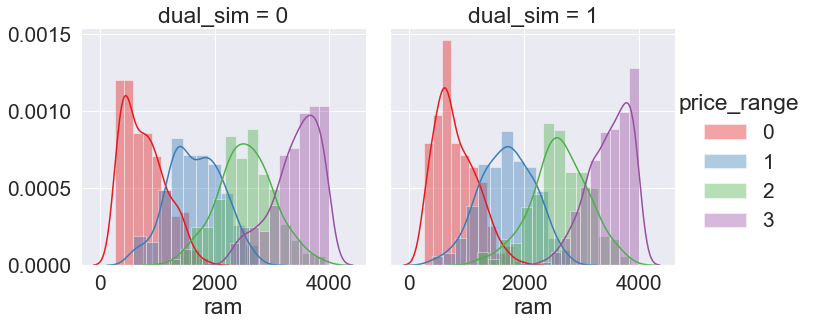

In [70]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())


In [71]:
df.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  

[2 rows x 21 columns]

In [72]:
df["blue"].value_counts()


0    1010
1     990
Name: blue, dtype: int64

<AxesSubplot:xlabel='blue', ylabel='count'>

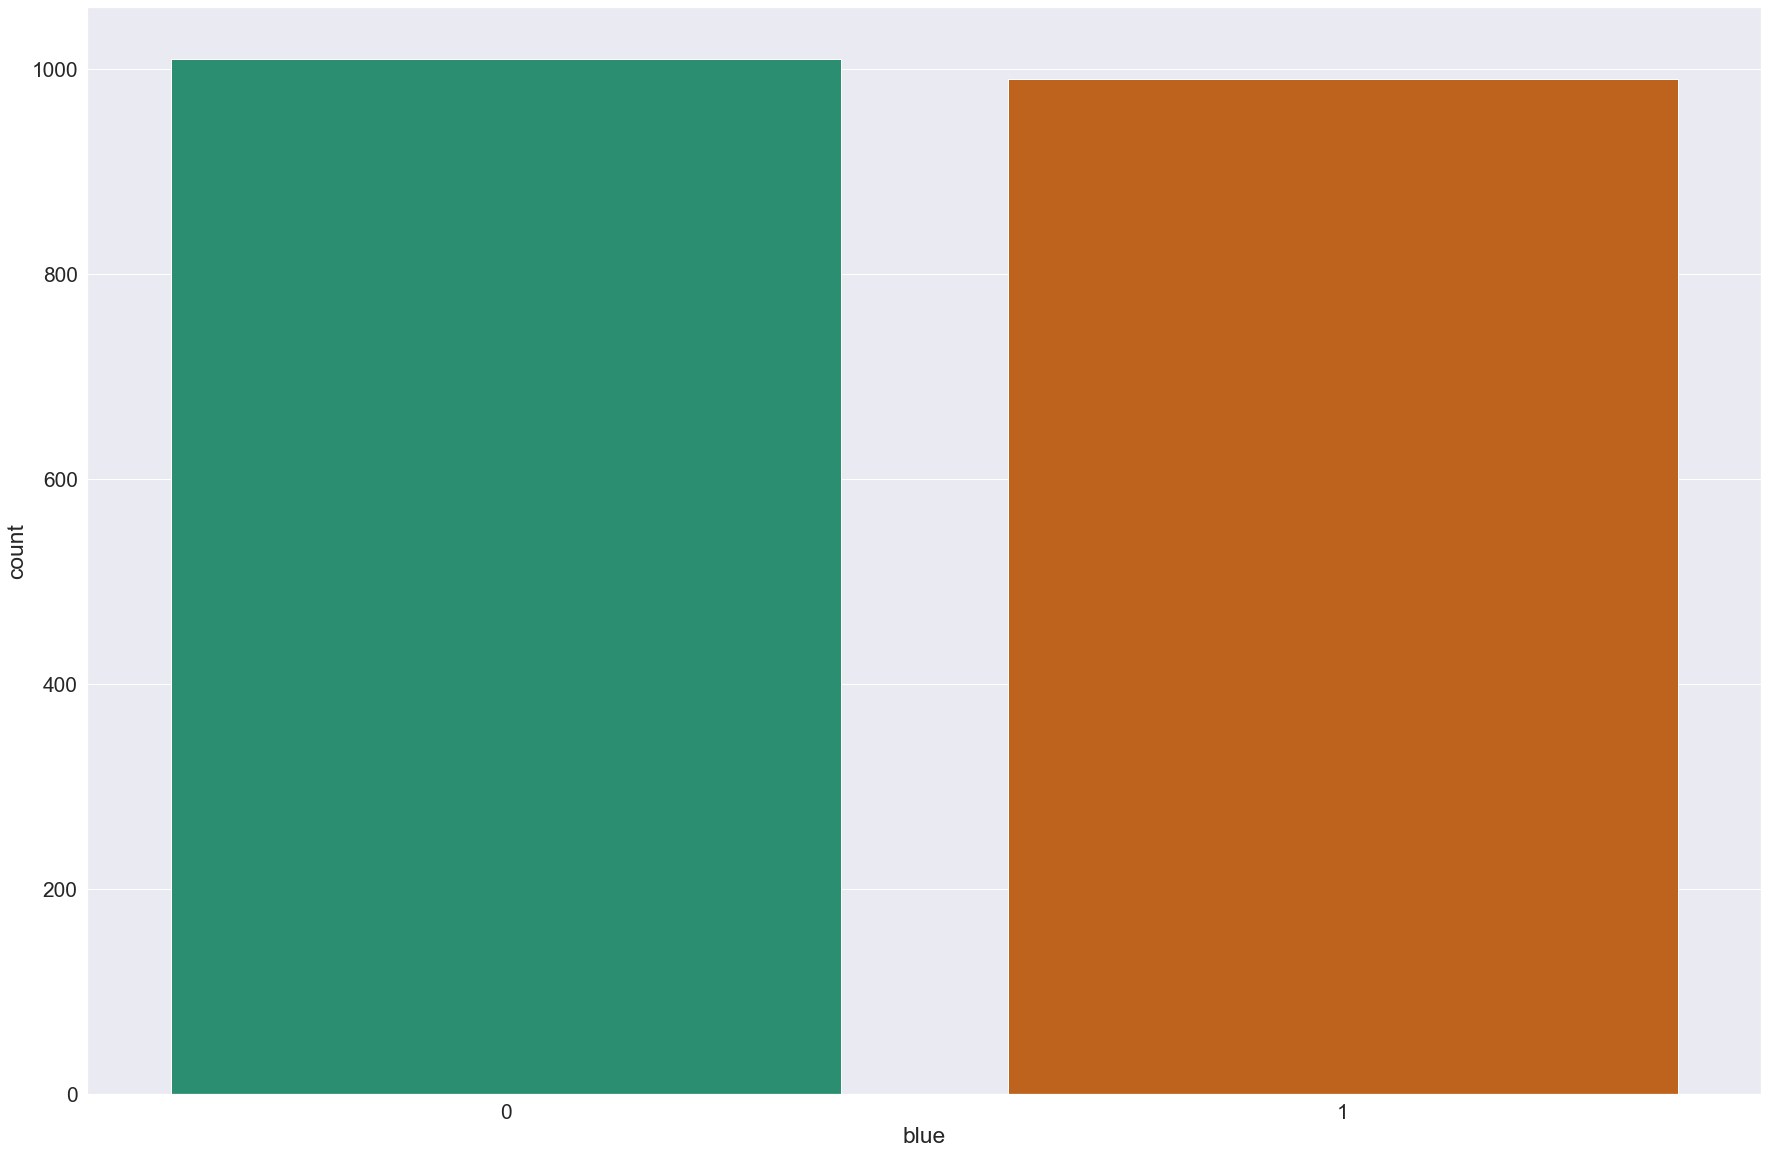

In [73]:
sns.countplot( "blue" , data = df , palette="Dark2")


In [74]:
df["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

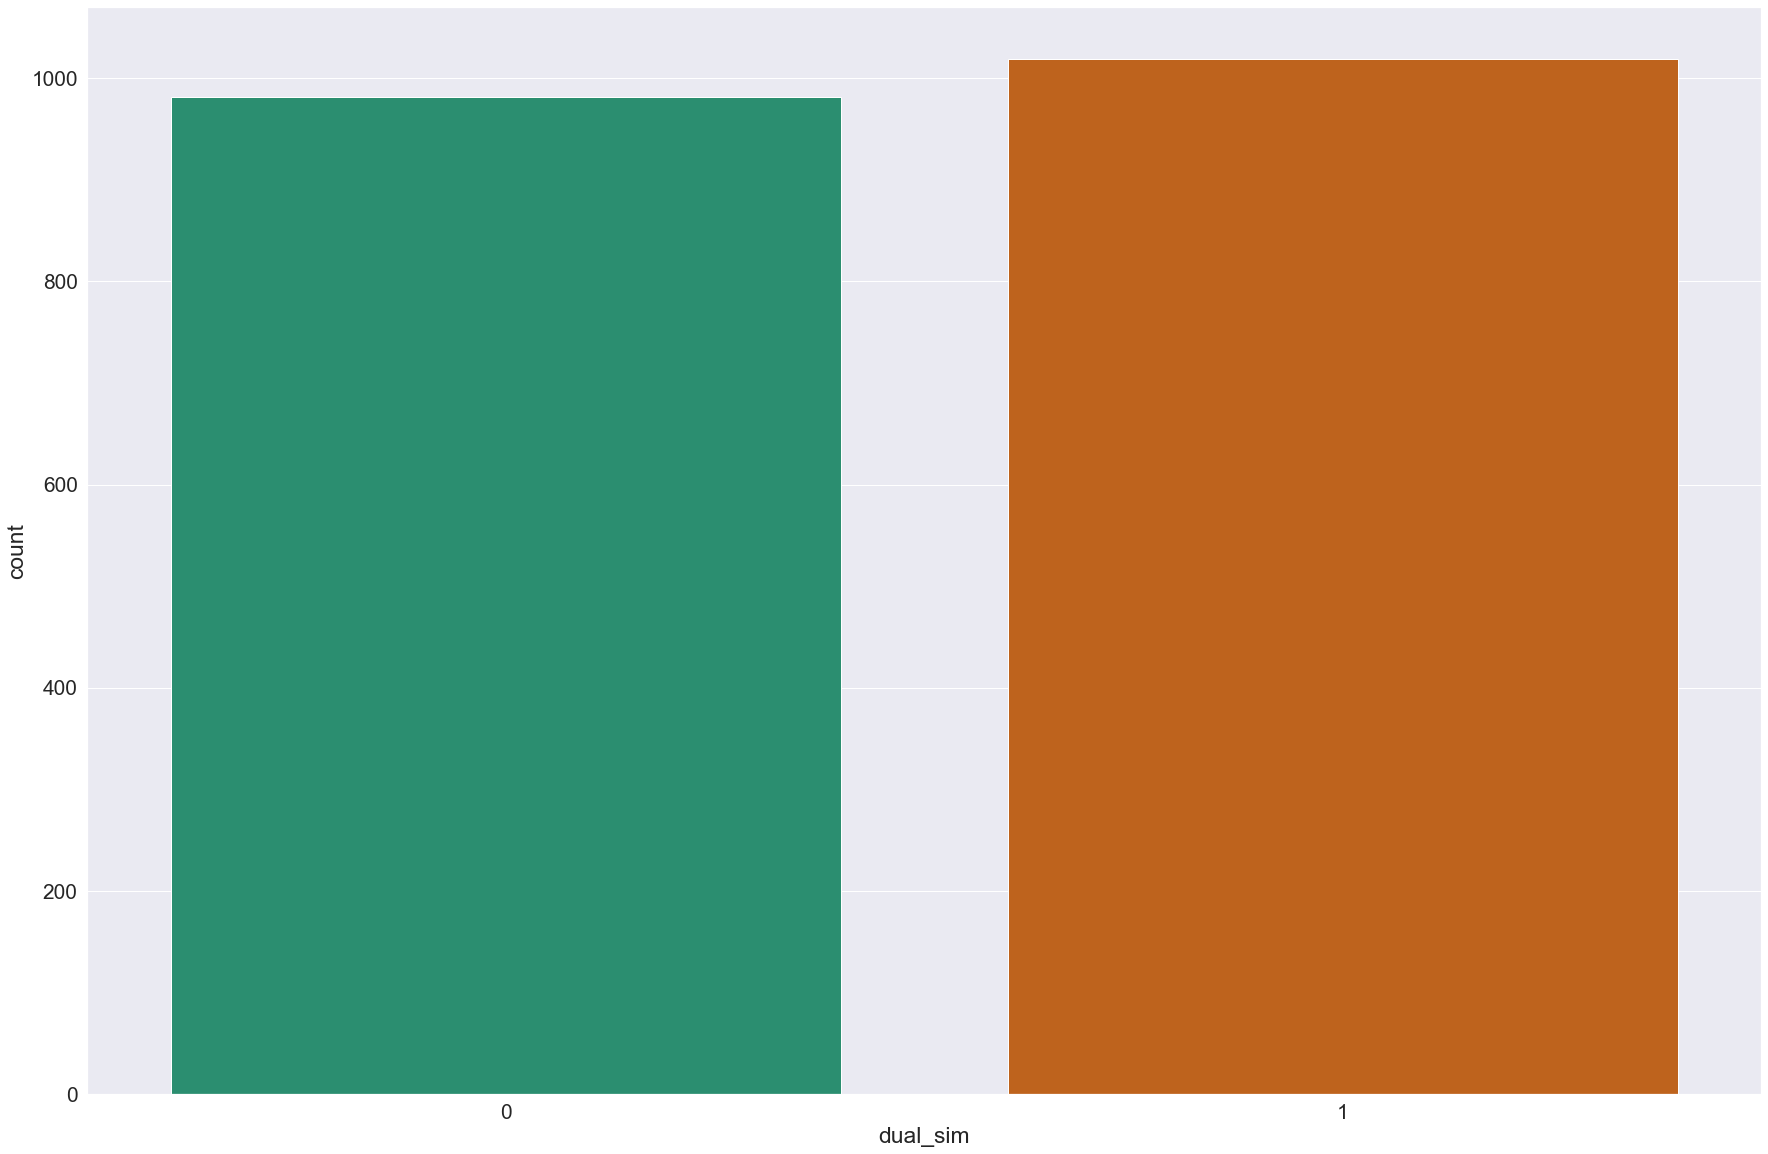

In [75]:
sns.countplot( "dual_sim" , data = df , palette="Dark2")


In [76]:
df["fc"].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

<AxesSubplot:xlabel='fc', ylabel='count'>

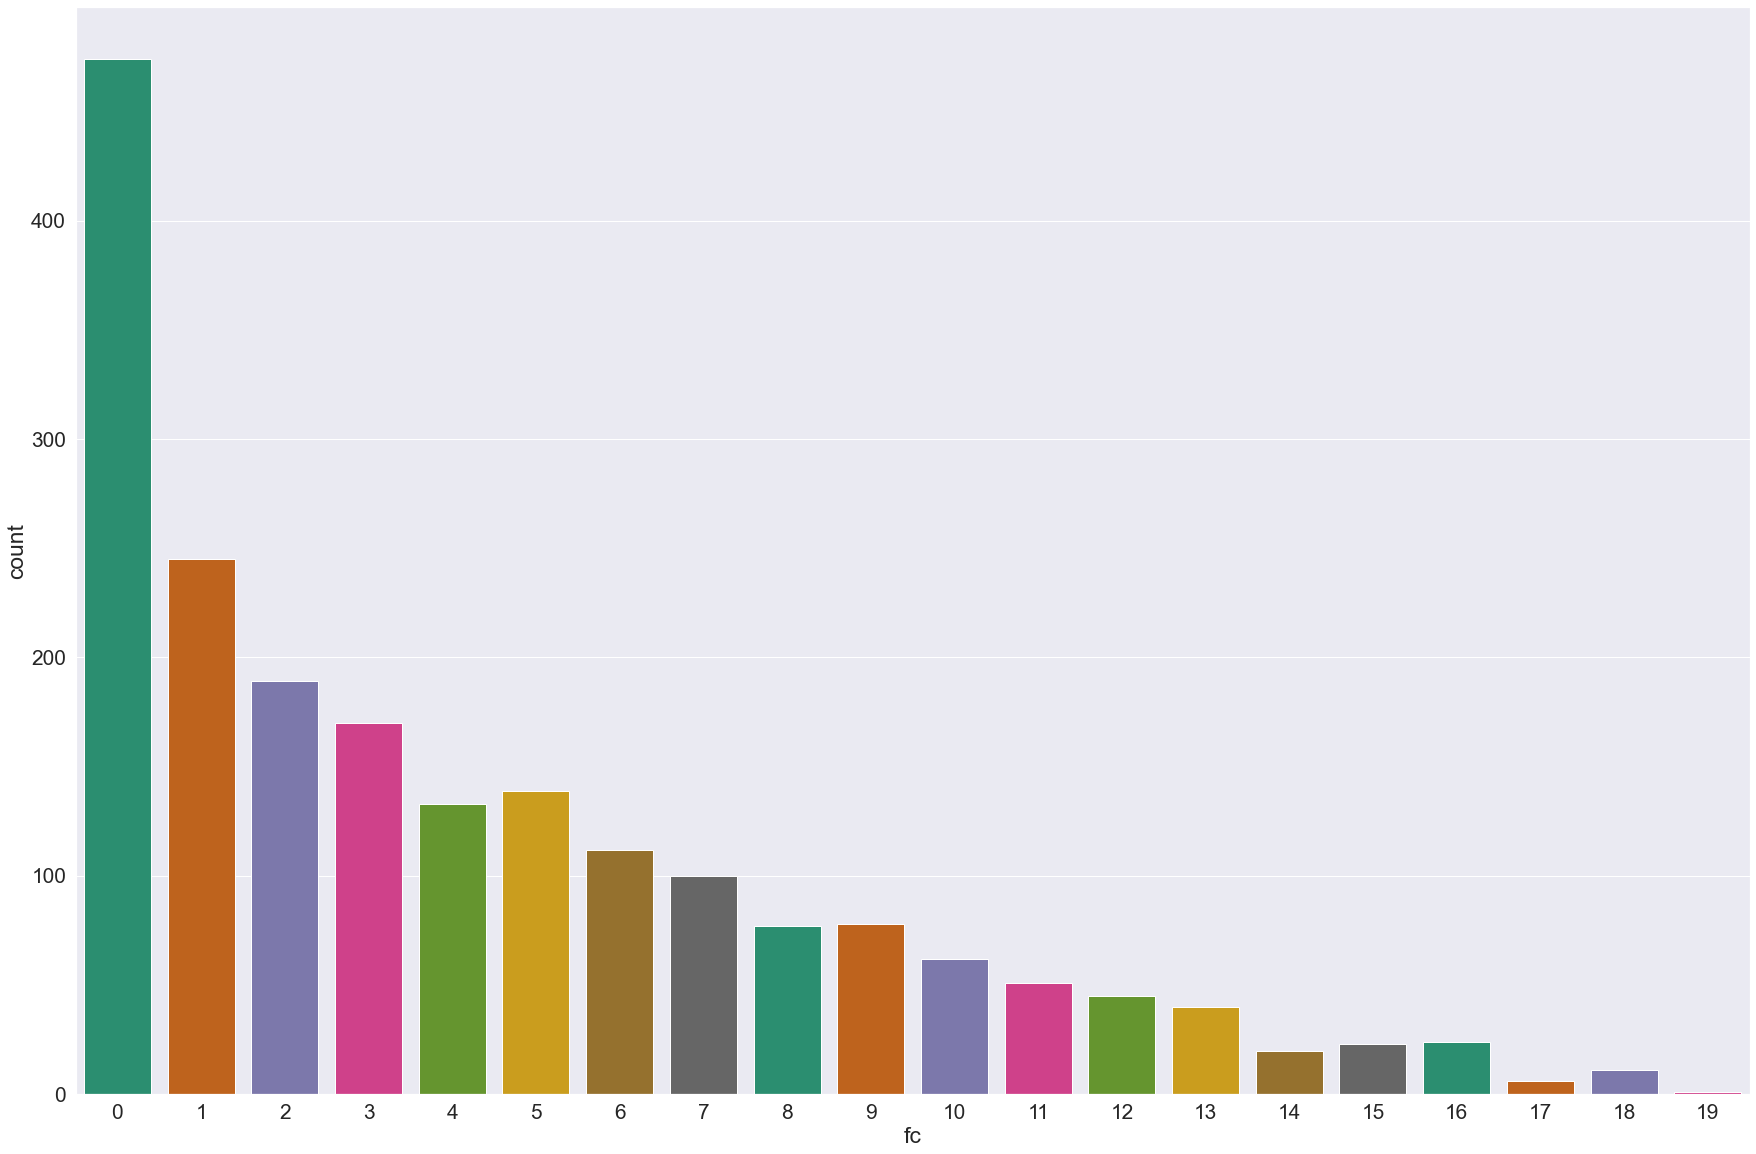

In [77]:
sns.countplot( "fc" , data = df , palette="Dark2")


In [78]:
df.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  

[2 rows x 21 columns]

<AxesSubplot:xlabel='four_g', ylabel='count'>

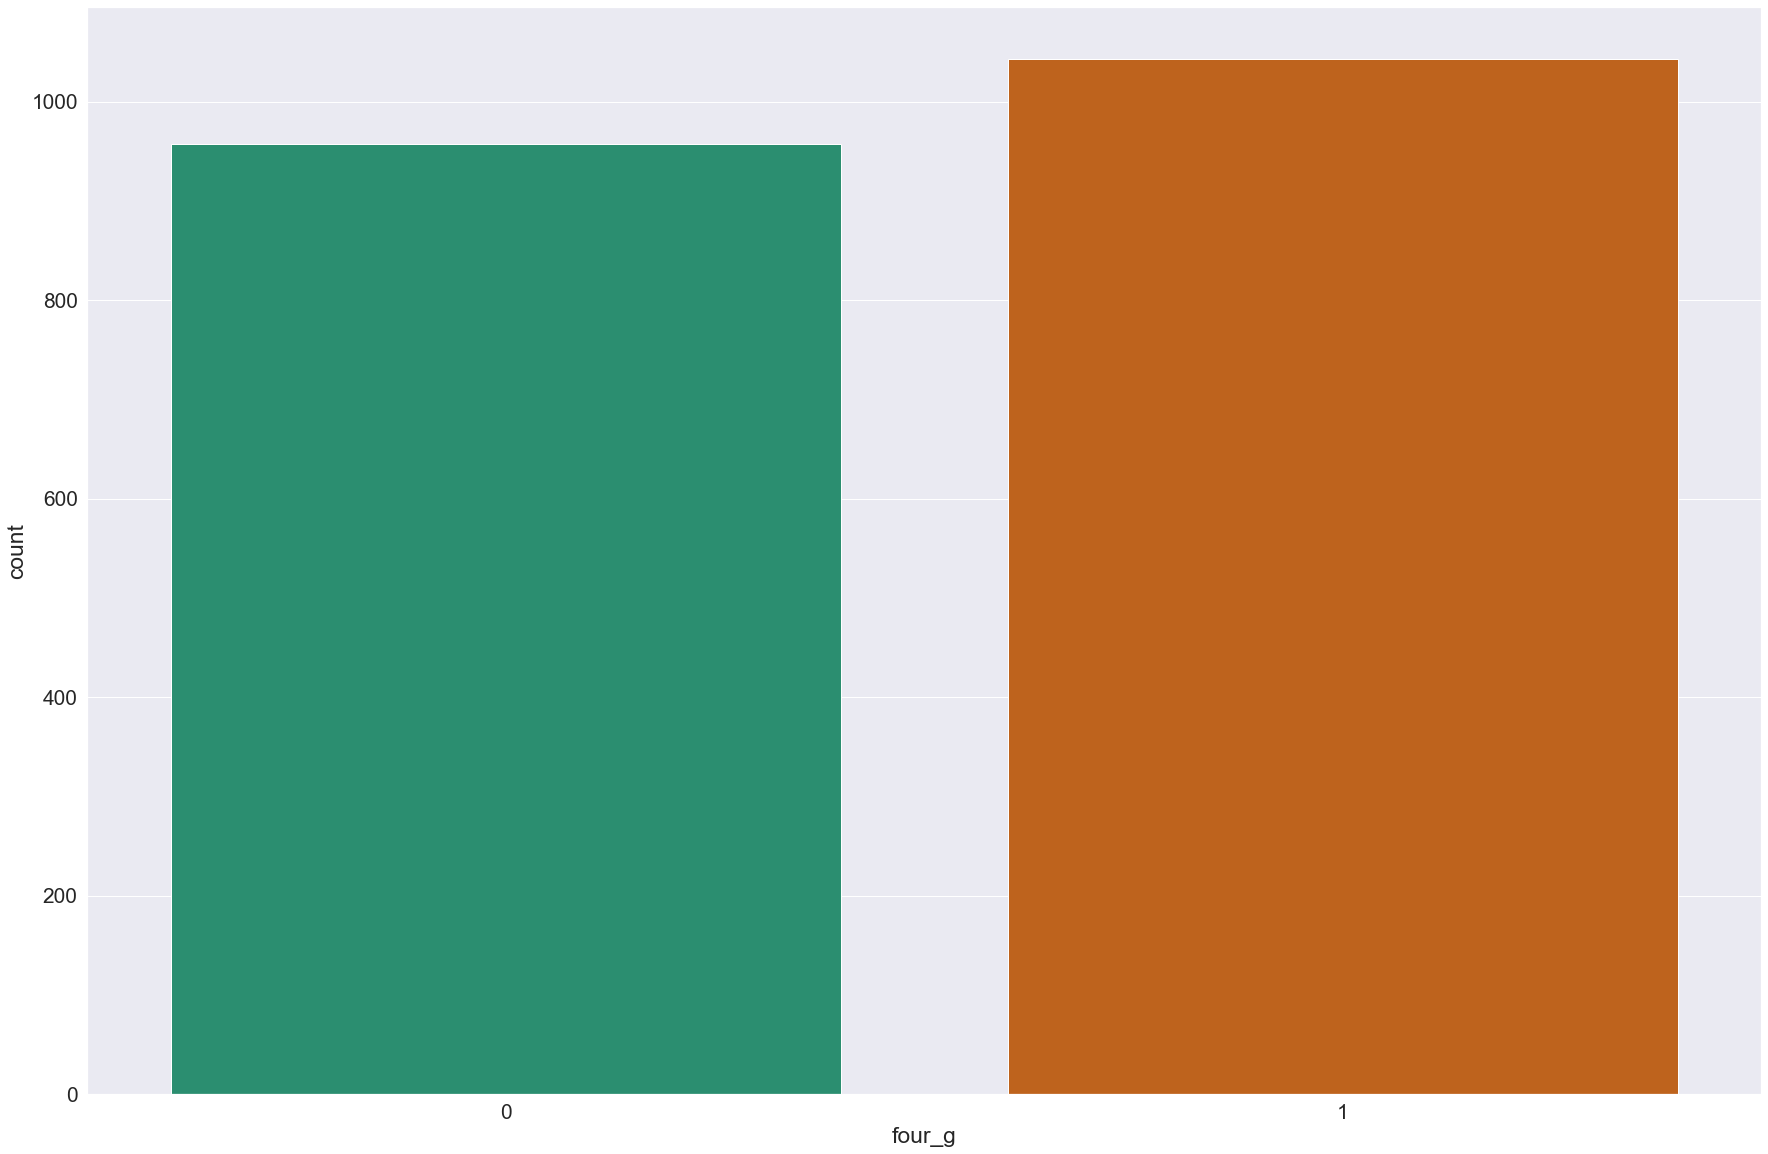

In [79]:
sns.countplot( "four_g" , data = df , palette="Dark2")


<AxesSubplot:xlabel='n_cores', ylabel='count'>

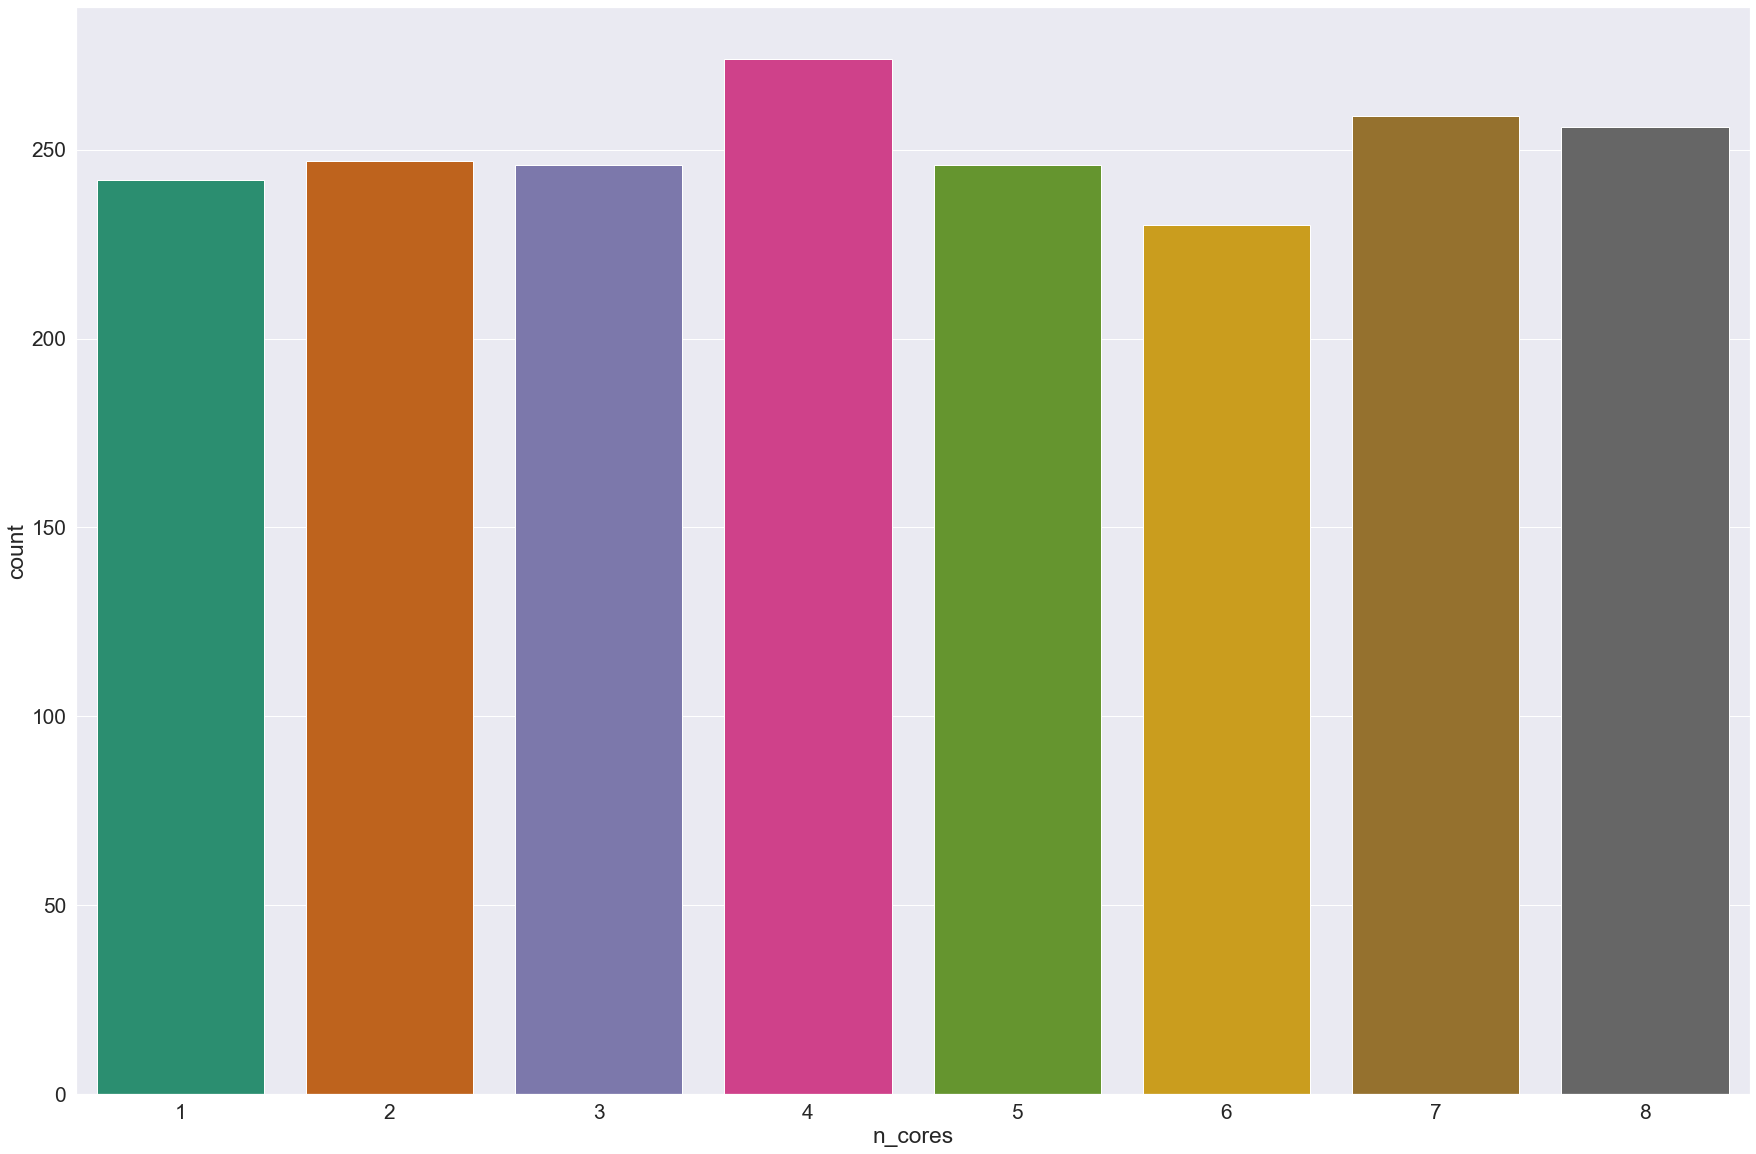

In [80]:
sns.countplot( "n_cores" , data = df , palette="Dark2")


<AxesSubplot:xlabel='three_g', ylabel='count'>

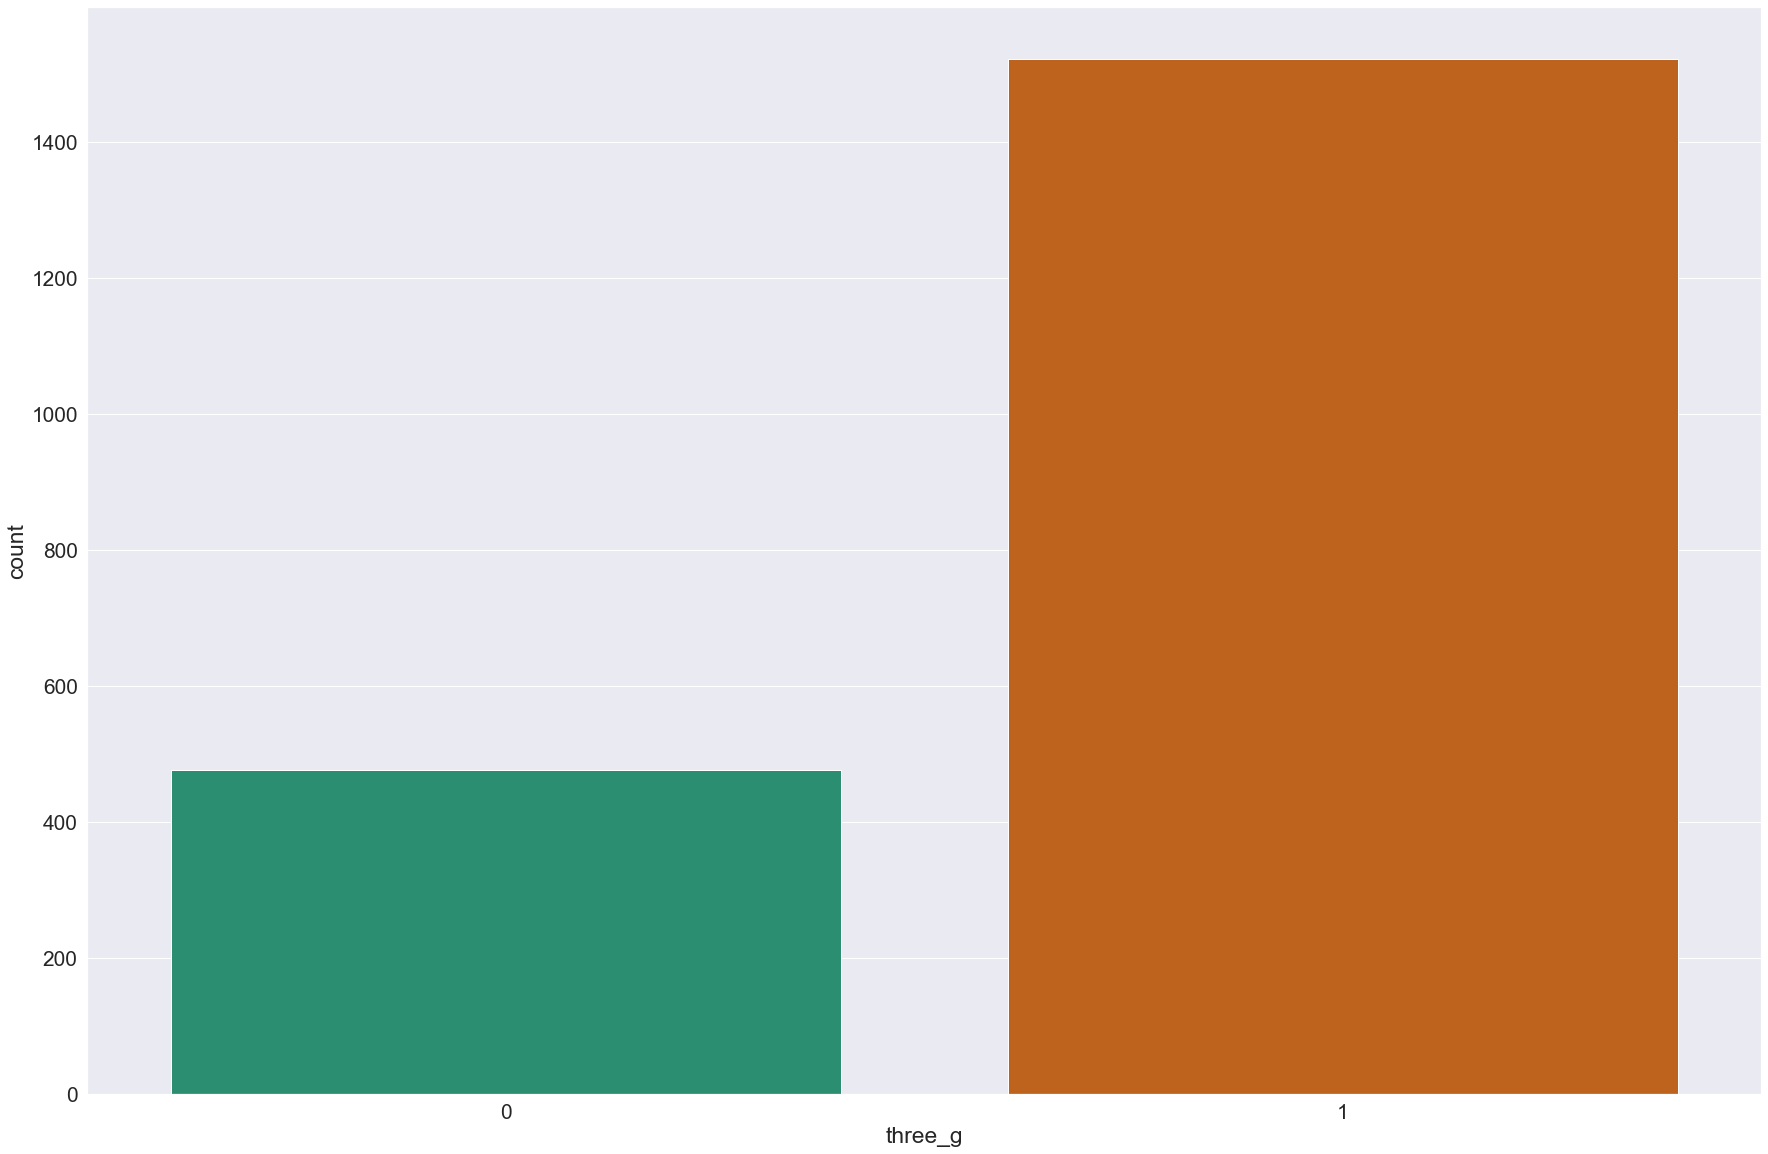

In [81]:
sns.countplot( "three_g" , data = df , palette="Dark2")


<AxesSubplot:xlabel='touch_screen', ylabel='count'>

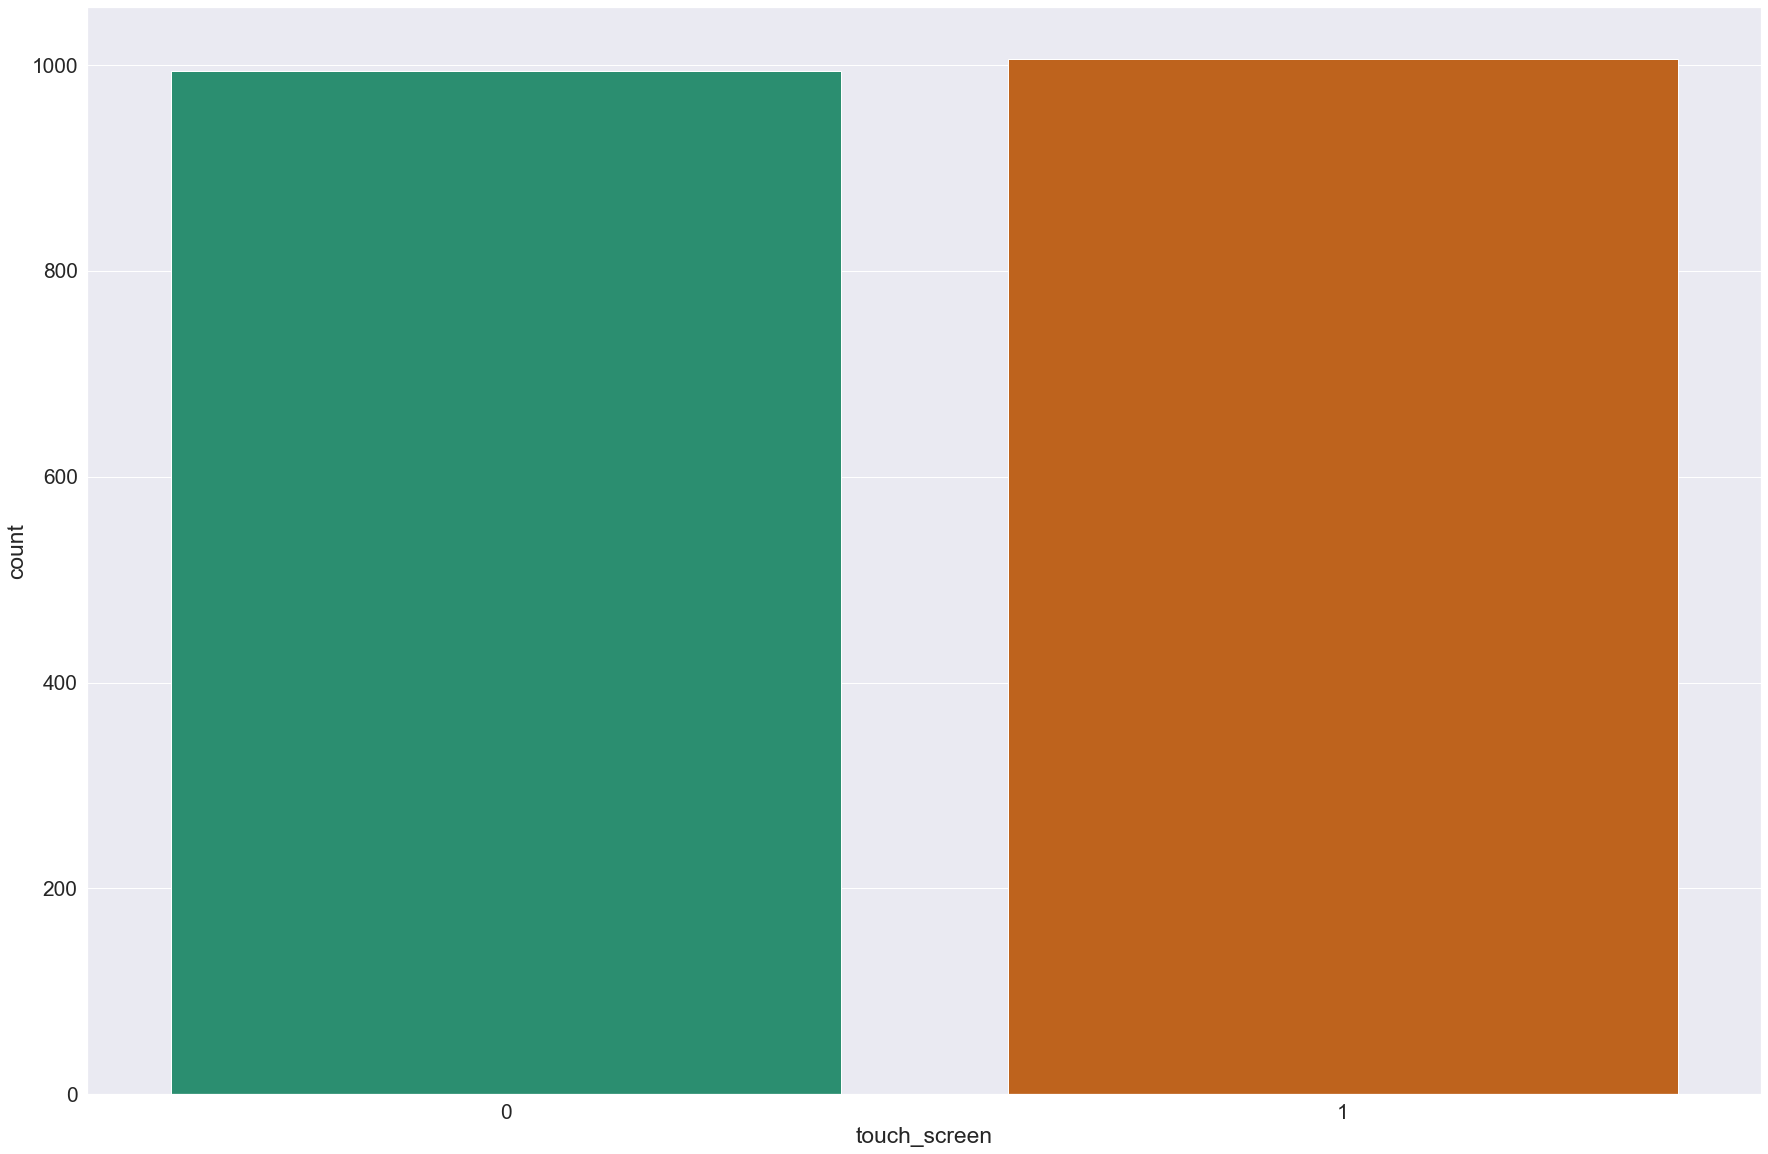

In [82]:
sns.countplot( "touch_screen" , data = df , palette="Dark2")


<AxesSubplot:xlabel='wifi', ylabel='count'>

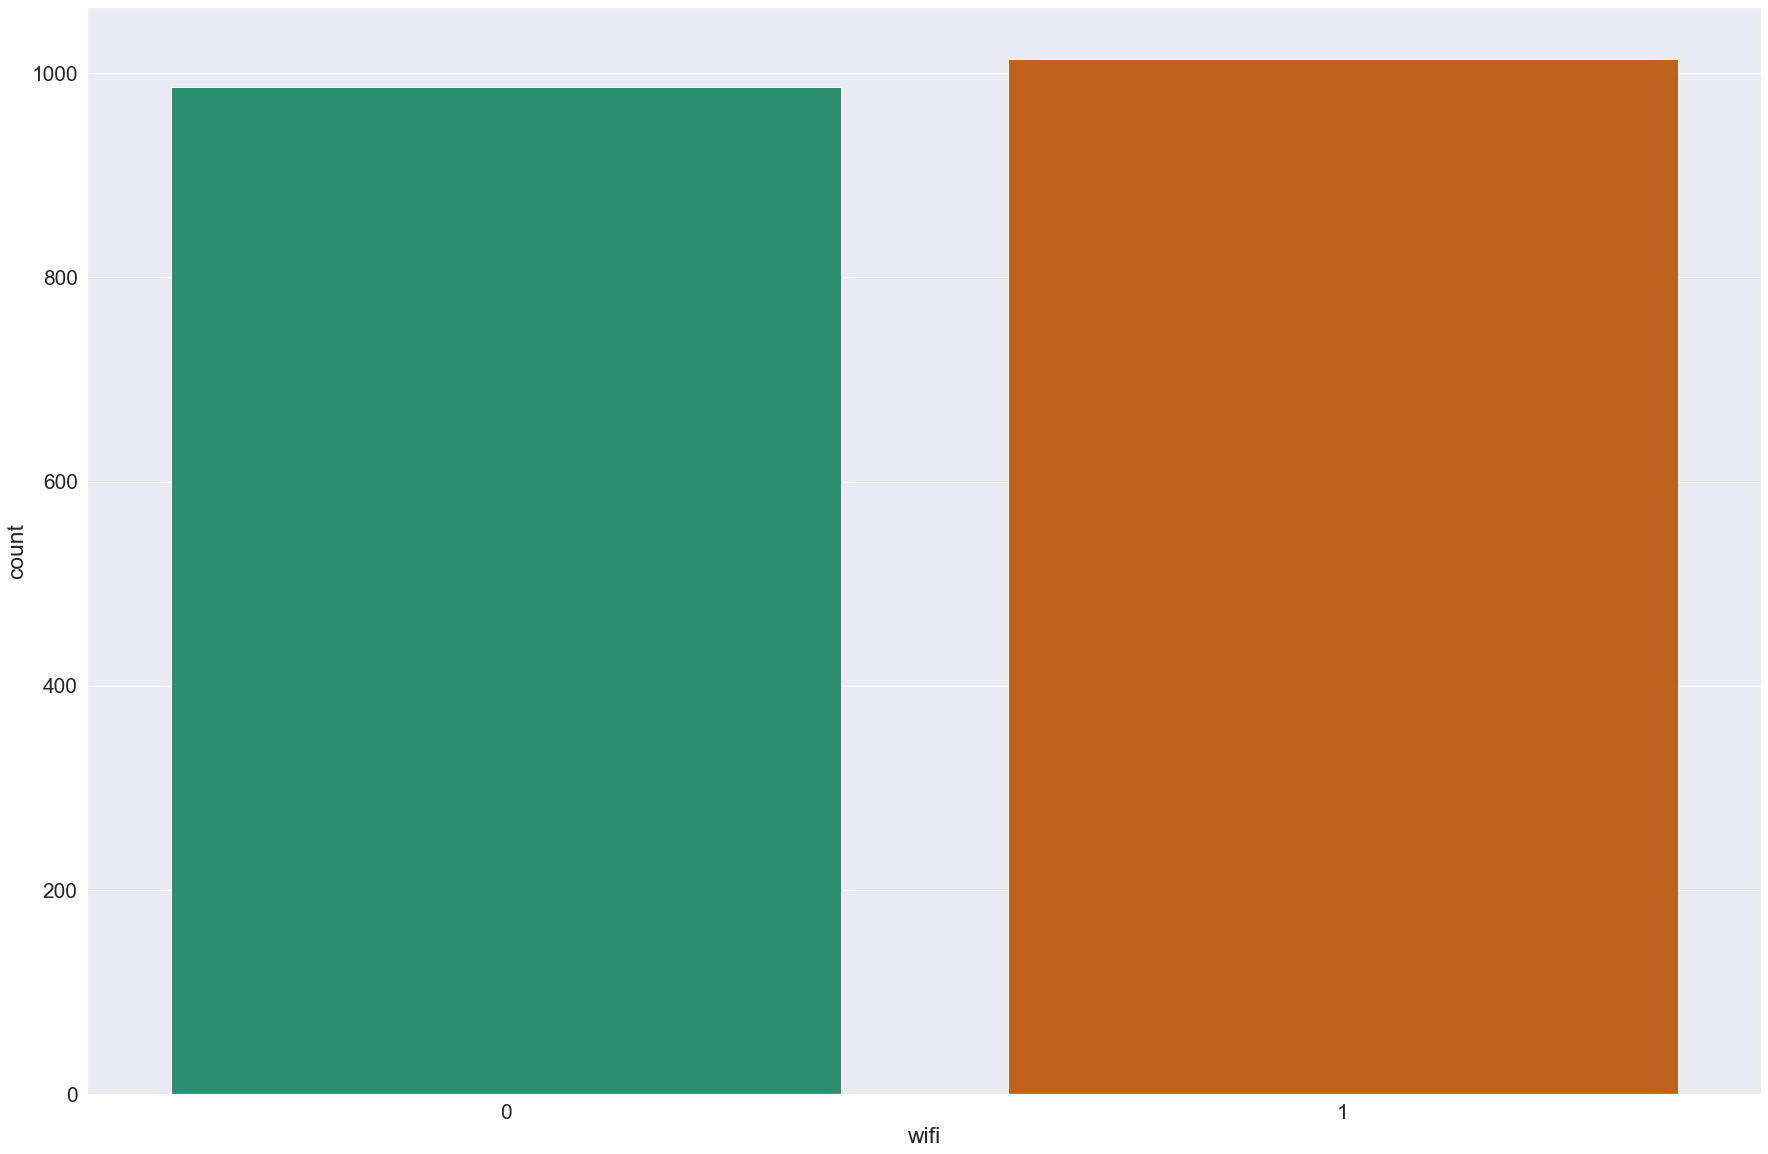

In [83]:
sns.countplot( "wifi" , data = df , palette="Dark2")


<AxesSubplot:xlabel='price_range', ylabel='count'>

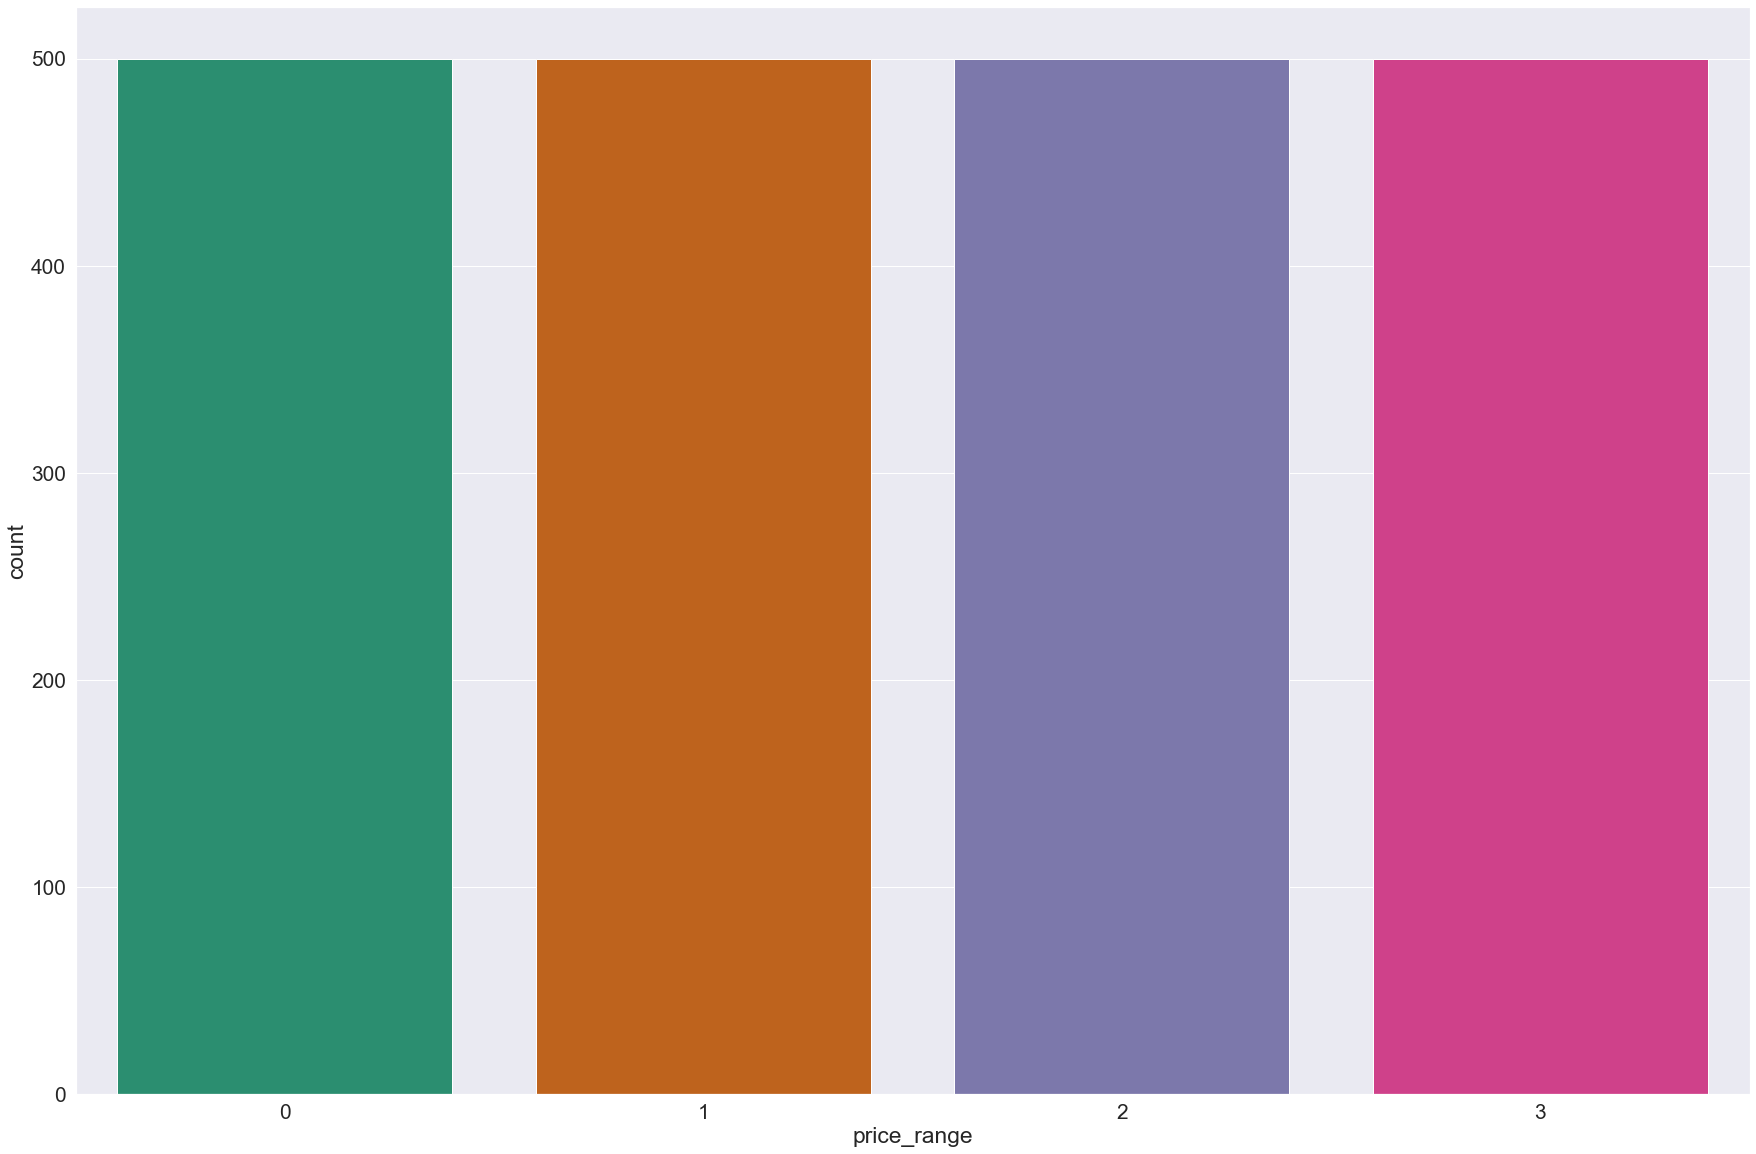

In [84]:
sns.countplot( "price_range" , data = df , palette="Dark2")


In [85]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [87]:
# get escribtion report of data ::
profile = pp.ProfileReport(df , title = "Mobil-Price-Report" , explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

OSError: [Errno 22] Invalid argument

In [88]:
# To save report as html file
profile.to_file("Oil_data_Report.html")


Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

OSError: [Errno 22] Invalid argument

<p id = "ETl">ETL-Process</p>

#  ETL :: (Extract Transform Load) ::
**********************

* Its one of the most important phase in the data scientist life cycle which ::
    * Feature_Engineering Process.
        * Extract New Usefull Features from old useless Feature which not enough to Trian Model.
    * Transform data.
        * Data in the real state not come cleaned it comes Dirty data includes.
            * non_Logic_data_values.
            * Noisy and Errors Values.
            * Missig_data_Values.
            * Duplicatiers and Reapet data.
            * Outliers data_Values.
            * Categorical_Text_data.

# 1 :: Feature_Engineering Technice ::

* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [89]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

* We acually apply that techniqe to generate years , months and days from Date feature.

# 2 :: Transform_data ::

* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

In [90]:
# identify non_logic data values , Noisy and Errors::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (battery_power)

The Col _ (battery_power) _Unique_values :: [ 842 1021  563 ... 1139 1467  858]

The Col _ (battery_power)_Value_counts :: 

1872    6
1589    6
618     6
1413    5
1715    5
       ..
1199    1
1202    1
1203    1
1204    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

-----------
-----------

The Col :: (blue)

The Col _ (blue) _Unique_values :: [0 1]

The Col _ (blue)_Value_counts :: 

0    1010
1     990
Name: blue, dtype: int64

-----------
-----------

The Col :: (clock_speed)

The Col _ (clock_speed) _Unique_values :: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

The Col _ (clock_speed)_Value_counts :: 

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
2.4     58
0.8     58
0.9     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0

* From the data above we can see that data not include non_logic data values.

In [91]:
# identify duplicates in data ::
df.duplicated().sum()
# Remove duplictes in data ::
df.drop_duplicates(inplace=True)

In [92]:
 # to identify missing data values ::
Num_Missing_data   = df.isnull().sum().sort_values(ascending = False)
Precentage_Missing = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
MISSIng =pd.concat([Num_Missing_data , Precentage_Missing] , axis=1 , keys=["Num_Missing" , "Presentage_Missing"])
MISSIng


Num_Missing  Presentage_Missing
battery_power            0                 0.0
px_height                0                 0.0
wifi                     0                 0.0
touch_screen             0                 0.0
three_g                  0                 0.0
talk_time                0                 0.0
sc_w                     0                 0.0
sc_h                     0                 0.0
ram                      0                 0.0
px_width                 0                 0.0
pc                       0                 0.0
blue                     0                 0.0
n_cores                  0                 0.0
mobile_wt                0                 0.0
m_dep                    0                 0.0
int_memory               0                 0.0
four_g                   0                 0.0
fc                       0                 0.0
dual_sim                 0                 0.0
clock_speed              0                 0.0
price_range              0                 0.0

<AxesSubplot:>

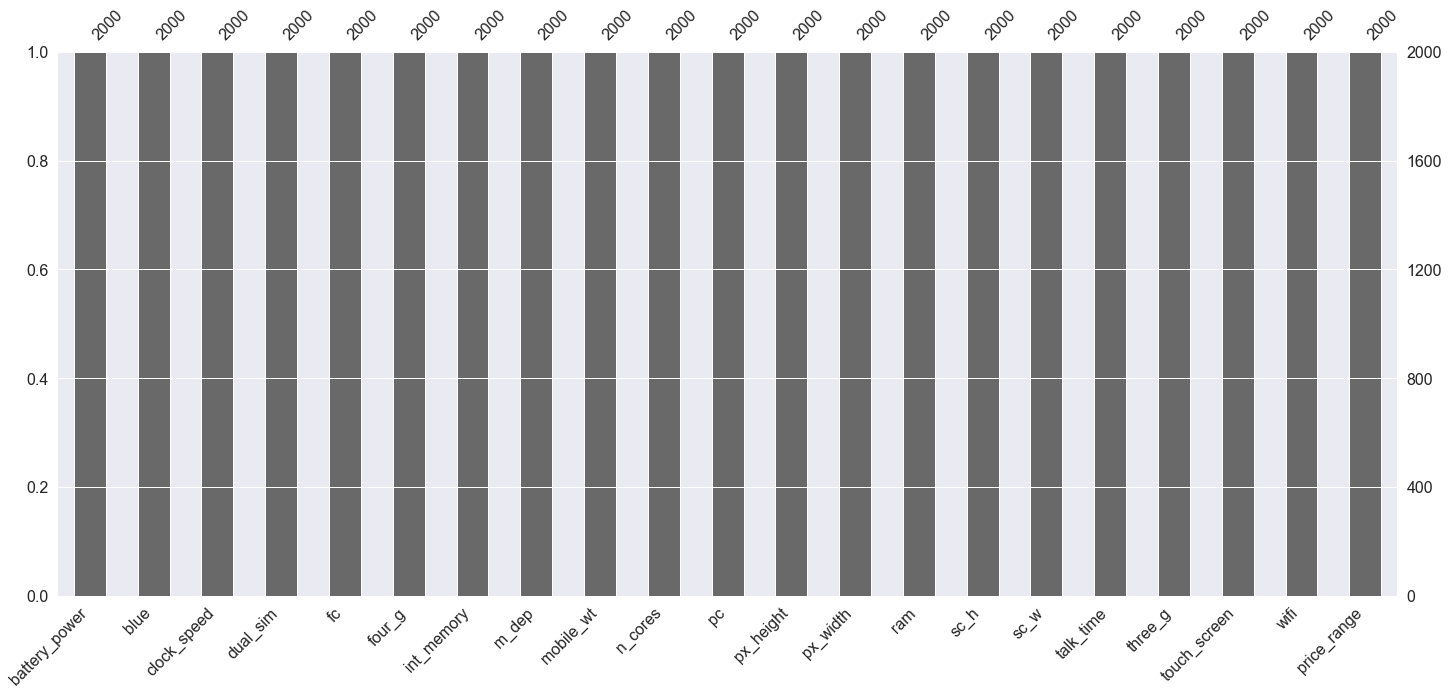

In [93]:
# Visualize missing data values ::
mno.bar(df)

* From the result above we can see that data not include Missing data values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

<AxesSubplot:ylabel='price_range'>

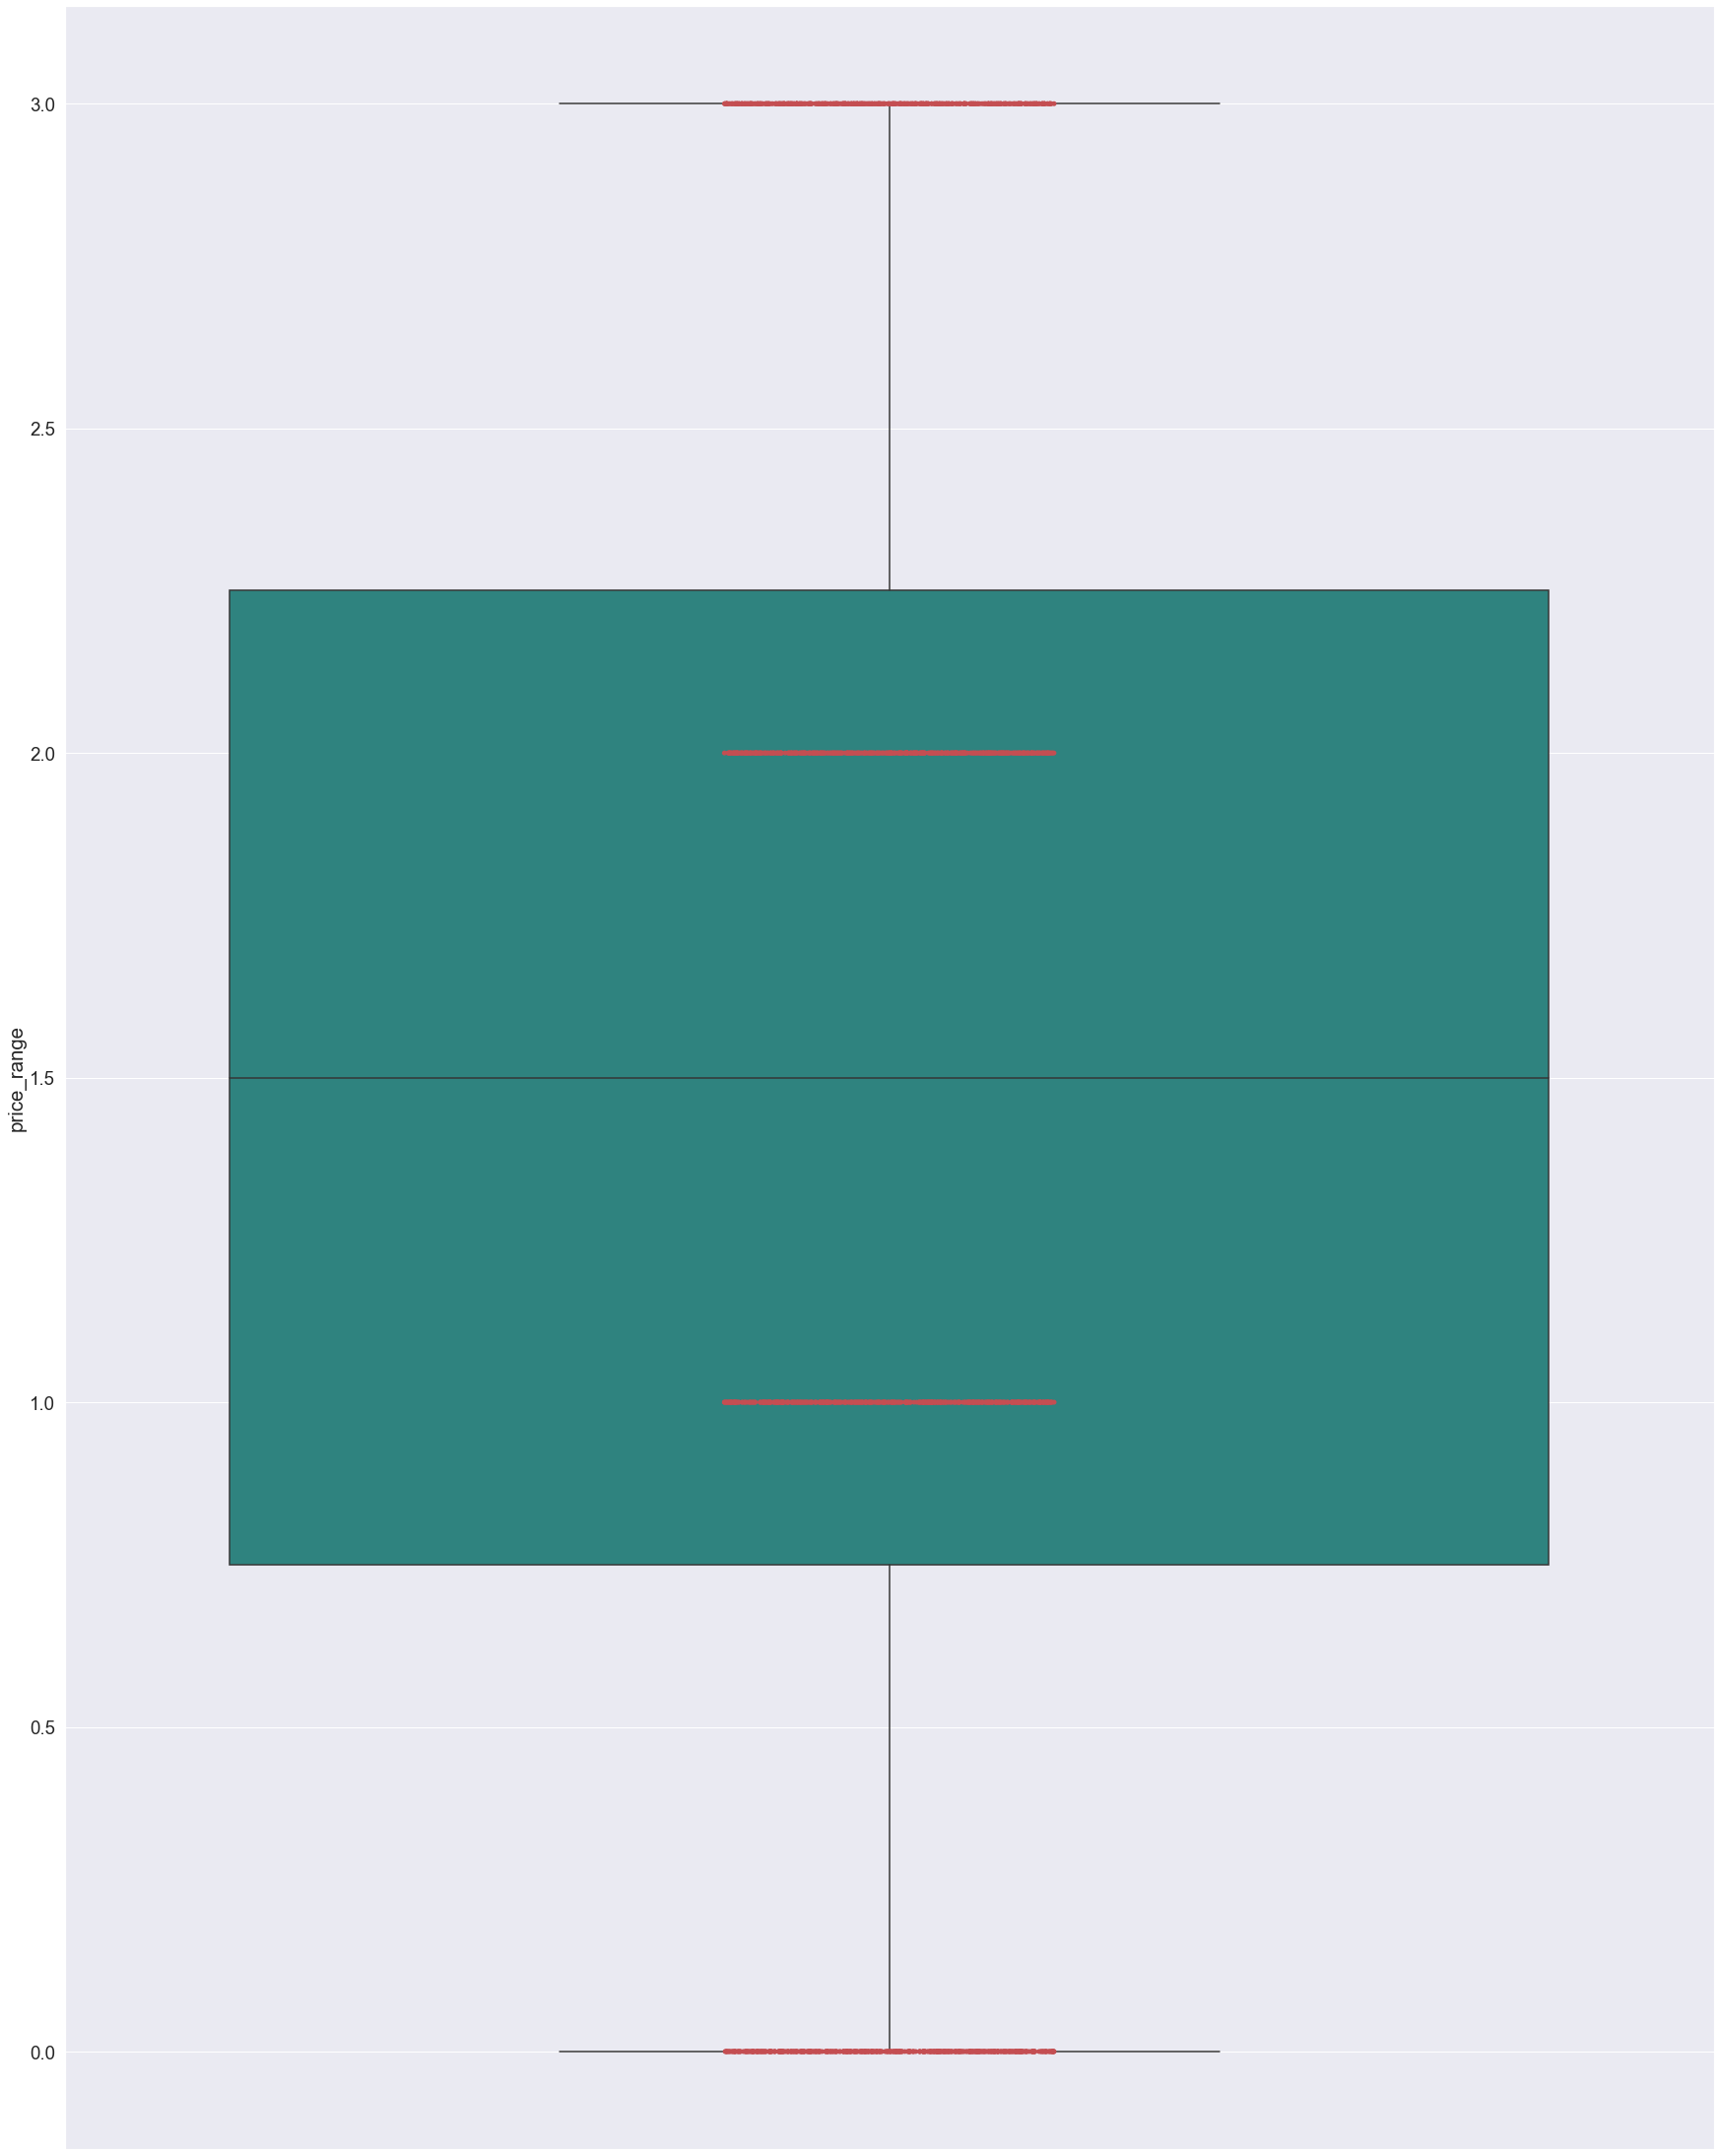

In [94]:
sns.set(rc = {"figure.figsize" : [30,40]} , font_scale = 1.7)
sns.boxplot  (y = "price_range" , data = df , palette="viridis")
sns.stripplot(y = "price_range" , data = df , color = "r")

* From the result above we can see tha data not include outliers data values

<AxesSubplot:>

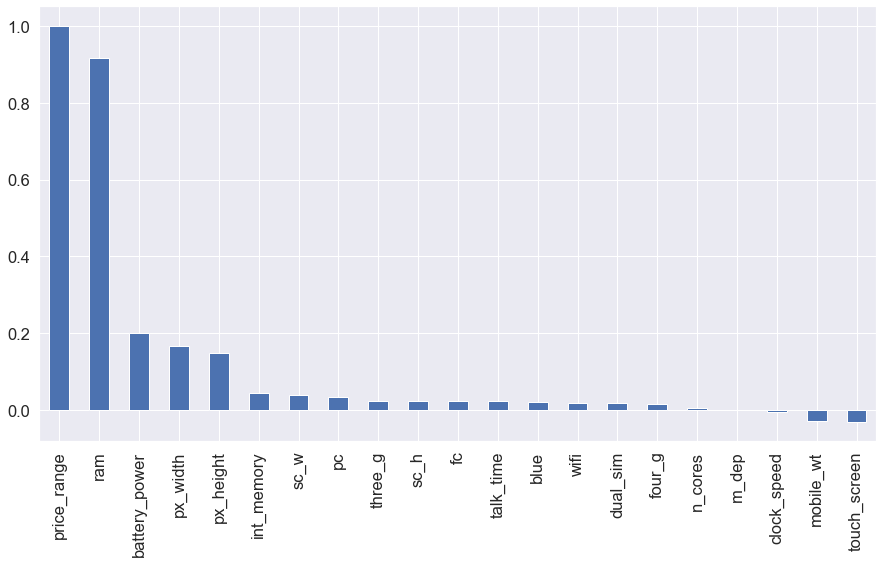

In [95]:
#Get Correlation of "Churn" with other variables:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['price_range'].sort_values(ascending = False).plot(kind='bar'  )

<p id = "Prepration">Data-Prepration</p>

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [97]:
#  Split data into input data and output data
x = df.drop("price_range" , axis=1)
y = df["price_range"]

In [98]:
# import requred techniqes ::
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

In [99]:
# split data into training and testinfg data
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=20 , shuffle=True)

In [100]:
# Scaling data in thae normal distribution
scaller  = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

<p id = "Model">Bulid_ML_Model</p>

In [105]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [106]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [107]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.97875
The Testing_Score :: 0.955
The Accuracy_Scor :: 0.955
The Con_Matrix ::
 [[ 86   2   0   0]
 [  3  93   2   0]
 [  0   5 104   5]
 [  0   0   1  99]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.8325
The Accuracy_Scor :: 0.8325
The Con_Matrix ::
 [[77 11  0  0]
 [13 76  9  0]
 [ 0 12 89 13]
 [ 0  0  9 91]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.8675
The Accuracy_Scor :: 0.8675
The Con_Matrix ::
 [[85  3  0  0]
 [ 5 86  7  0]
 [ 0 20 84 10]
 [ 0  0  8 92]]
The Model :: XGB_Classifer
----------
[02:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 1.0
The Testing_Score

* From the result above we can see that XGB Model is the most efficient moderl to predict the oilprice baecouse it with high performance and accuracy

In [108]:
# Select model with high performance and accuracy 

Logistic_Model = LogisticRegression( )
Logistic_Model.fit(x_train , y_train)
y_pred = Logistic_Model.predict(x_test)
print(Logistic_Model.score(x_train , y_train))
print(Logistic_Model.score(x_test , y_test))
print("-" * 80)

0.97875
0.955
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

In [109]:
Logistic_Model.score(x_train , y_train)

0.97875

In [110]:
Logistic_Model.score(x_test , y_test)

0.955

In [111]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

0.955

In [112]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[ 86,   2,   0,   0],
       [  3,  93,   2,   0],
       [  0,   5, 104,   5],
       [  0,   0,   1,  99]], dtype=int64)

<AxesSubplot:>

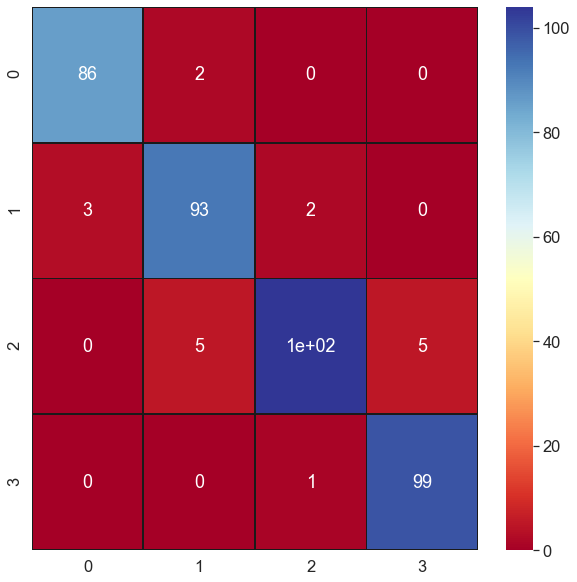

In [113]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

In [114]:
import joblib
scaler = joblib.dump(scaller , "scaler.h5")
Mode   = joblib.dump(Logistic_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Prediction Mobil price 

In [115]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [116]:
len(x.columns)

20

In [117]:
df.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  

[2 rows x 21 columns]

In [118]:
custom_data = np.array([1021 , 1 , 2.2 , 0 , 1 , 1 , 
                        7 , 0.7 , 136 , 2 , 9 , 374 ,
                        905  , 2631 , 17 , 7 , 19 , 0
                        , 1 , 1  ])
custom_data.shape

(20,)

In [119]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-0.49519914,  1.03175391,  0.82512519, -1.00752834, -0.75405563,
         0.95836592, -1.38272946,  0.68807312, -0.13719232, -1.10257244,
        -0.14142443, -0.58823647, -0.78498979,  0.47632654,  1.1145783 ,
         0.27989977,  1.46821033, -1.8011196 ,  0.98019606,  1.00501256]])

In [120]:
prediction = Logistic_Model.predict(custom_data)
prediction

array([2], dtype=int64)